<center> <font size="6">MACHINE LEARNING GROUP PROJECT 2021 </font></center><br>
<center> <font size="5">Masters in Data Science and Advanced Analytics at NOVA IMS, Lisbon</font></center><br><br>
<font size="5">Group Information:</font><br>
<p style = "padding-left: 5em">Elsa Camuamba<br></p>
<p style = "padding-left: 5em">Peter Hamori<br></p>
<p style = "padding-left: 5em">Nicola Andreatta<br></p>
<p style = "padding-left: 5em">Ali Sabbir<br></p>
<p style = "padding-left: 5em">Foazul Islam<br></p>

# Project Description
Welcome to TechScape. In the beginning of 2020, five Portuguese entrepreneurs built a startup to sell goods related to digital detox. Using an online store, TechScape sells products and services which will allow their customers to stay focused on the most important things and improve the balance with technology use in their lives, such as meditation kits, books, stress balls, ”dumb” phones, retreats, among others.

With the emergence of Covid-19 in March 2020, the company had some financial difficulties, and they were out of function in April 2020. But in May 2020, they restarted their activities, knowing that a digital detox is becoming even more critical in this period of time, where people need to unplug themselves and improve their
quality of life.

Focused in increasing their sales, TechScape hired a team of data scientists to **analyze the online behavior of their customers and to predict which customers have a high probability of buying their products depending on their online actions**.

##### Project goal
To build a predictive model that answers the question "Which customers are more likely to buy our products?”

##### Metadata

`Access ID`: Unique identification of the user access to the website <br>
`Date`: Website visit date <br>
`AccountMng_Pages`: Number of pages visited by the user about account
management <br>
`AccountMng_Duration`: Total amount of time (seconds) spent by the user on
account management related pages <br>
`FAQ_Pages`: Number of pages visited by the user about frequently
asked questions, shipping information and company
related pages <br>
`FAQ_Duration`: Total amount of time (seconds) spent by the user on
FAQ pages <br>
`Product_Pages`: Number of pages visited by the user about products and
services offered by the company <br>
`Product_Duration`: Total amount in time (seconds) spent by the user on
products and services related pages <br>
`GoogleAnalytics_BounceRate`: Average bounce rate value of the pages visited by the user,
provided by google analytics <br>
`GoogleAnalytics_ExitRate`: Average exit rate value of the pages visited by the user,
provided by google analytics <br>
`GoogleAnalytics_PageValue`: Average page value of the pages visited by the user,
provided by google analytics <br>
`OS`: Operating System of the user <br>
`Browser`: Browser used to access the webpage <br>
`Country`: The country of the user <br>
`Type_of_Traffic`: Traffic Source by which the user has accessed the website
(e.g., email, banner, direct) <br>
`Type_of_Visitor`: User type as ”New access”, ”Returner” or ”Other” <br>
`Buy`: Class label indicating if the user finalized their actions
in the website with a transaction
(Only available in train dataset) <br>

# Data Preprocessing

## Imports and Data Loading

In [294]:
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil # ceiling 
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split # Data partition
from sklearn.preprocessing import MinMaxScaler # Feature scaling

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples # Assessing k in K-means
from sklearn.cluster import KMeans # Clustering 

import scipy.stats as stats # Feature selection - filter methods
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression # Feature selection - Wrapper methods
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV # Feature selection - Embedded methods
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV

#pip install xgboost
from xgboost import XGBClassifier 
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

##### Load data

In [295]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Initial Exploration of the Training Set

In [296]:
train.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333  21-Mar-20                 0                  0.0          0   
1  103117814  20-May-20                 0                  0.0          0   
2  103201891   4-Dec-20                 0                  0.0          0   
3  103226087  22-Dec-20                 0                  0.0          0   
4  103234445  24-Nov-20                 0                  0.0          2   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3           64.0000                      0.0000   
1           0.0             23          684.5000                      0.0217   
2           0.0              8           95.0000                      0.0250   
3           0.0              9          608.7500                      0.0000   
4         386.0             36         1609.9397                      0.0000   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0667                     0.0000   MacOSX        2   
1                    0.0449                     0.0000  Windows        2   
2                    0.0583                     0.0000  Windows        4   
3                    0.0250                    42.4225  Windows        2   
4                    0.0093                    12.5033  Windows        2   

          Country  Type_of_Traffic Type_of_Visitor  Buy  
0        Portugal                1        Returner    0  
1          France                6        Returner    0  
2           Italy                1        Returner    0  
3  United Kingdom                2        Returner    1  
4           Spain                3        Returner    1

In [297]:
# Get the dimensions of 'train'
train.shape

(9999, 17)

In [298]:
# Check the data types and check if there are missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [299]:
# Check for duplicated observations
train.duplicated().sum()

0

In [300]:
# Check the distribution of the target variable
train['Buy'].value_counts(normalize = True)

0    0.844784
1    0.155216
Name: Buy, dtype: float64

**Insight**: we see that the target variable has disproportionaly more 0s than 1s. Only about 15% of the target variable in train is classified as 1, i.e. customers who are more likely to buy represent only 15% of the train dataset. 
   - in other words, the training set is **imbalanced**.

### Correct wrong variable types

According to the description, 'Browser' and 'Type_of_Traffic' contain categorical information. We transform them to strings and we map the levels

In [301]:
# Check of all the existing values in the variable in 'Browser'
train['Browser'].value_counts()

2     6484
1     1990
4      597
5      362
6      138
10     130
8      113
3       81
13      52
7       41
12       8
11       3
Name: Browser, dtype: int64

In [302]:
# Check of all the existing values in the variable in 'Type_of_Traffic'
train['Type_of_Traffic'].value_counts()

2     3150
1     2008
3     1676
4      870
13     595
10     355
6      354
8      284
5      210
11     205
15     156
12      44
9       34
7       31
14      27
Name: Type_of_Traffic, dtype: int64

In [303]:
# map of the variable 'Browser' from integer value i to string 'Browser-i'
TypeBrowser = { i: 'Browser' + str(i) for i in range(train['Browser'].max()+1) }
TypeBrowser
train.replace({'Browser': TypeBrowser}, inplace = True)

In [304]:
# map of the variable 'Type_of_Traffic' from integer value i to string 'Traffic-i'
TrafficCategory = {
    i: 'Traffic' + str(i) for i in range(train['Type_of_Traffic'].max()+1)
}
train.replace({'Type_of_Traffic': TrafficCategory}, inplace = True)

In [305]:
#convert Date from object to Datetime
train['Date']=pd.to_datetime(train['Date'])

In [306]:
# check that conversion was successful 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   9999 non-null   int64         
 1   Date                        9999 non-null   datetime64[ns]
 2   AccountMng_Pages            9999 non-null   int64         
 3   AccountMng_Duration         9999 non-null   float64       
 4   FAQ_Pages                   9999 non-null   int64         
 5   FAQ_Duration                9999 non-null   float64       
 6   Product_Pages               9999 non-null   int64         
 7   Product_Duration            9999 non-null   float64       
 8   GoogleAnalytics_BounceRate  9999 non-null   float64       
 9   GoogleAnalytics_ExitRate    9999 non-null   float64       
 10  GoogleAnalytics_PageValue   9999 non-null   float64       
 11  OS                          9999 non-null   object      

### Assess the existance of nan values and empty strings

In [307]:
# Get the total number of nan values per feature
train.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [308]:
# replace "" by nans - in case there are empty strings
train.replace("", np.nan, inplace=True)

In [309]:
# Get the total number of nan values
train.isna().sum().sum()

0

### Descriptive Statistics
- this information will be useful when looking for outliers

In [310]:
# Get the basic descriptive statistics on for the numeric variables
train.drop('Access_ID', axis=1).describe().T # drop AccessID not inplace!,   .T for cleaner visualization

count         mean          std  min       25%  \
AccountMng_Pages            9999.0     2.324232     3.340676  0.0    0.0000   
AccountMng_Duration         9999.0    81.205854   179.715545  0.0    0.0000   
FAQ_Pages                   9999.0     0.508051     1.279390  0.0    0.0000   
FAQ_Duration                9999.0    34.559101   139.796989  0.0    0.0000   
Product_Pages               9999.0    31.685869    44.550277  0.0    7.0000   
Product_Duration            9999.0  1199.769430  1958.276304  0.0  183.5625   
GoogleAnalytics_BounceRate  9999.0     0.022305     0.048776  0.0    0.0000   
GoogleAnalytics_ExitRate    9999.0     0.043181     0.048845  0.0    0.0143   
GoogleAnalytics_PageValue   9999.0     5.963120    18.753626  0.0    0.0000   
Buy                         9999.0     0.155216     0.362128  0.0    0.0000   

                                 50%         75%         max  
AccountMng_Pages              1.0000     4.00000     27.0000  
AccountMng_Duration           7.5000    92.20835   3398.7500  
FAQ_Pages                     0.0000     0.00000     24.0000  
FAQ_Duration                  0.0000     0.00000   2549.3750  
Product_Pages                18.0000    38.00000    705.0000  
Product_Duration            599.0000  1470.27080  63973.5222  
GoogleAnalytics_BounceRate    0.0032     0.01680      0.2000  
GoogleAnalytics_ExitRate      0.0251     0.05000      0.2000  
GoogleAnalytics_PageValue     0.0000     0.00000    361.7637  
Buy                           0.0000     0.00000      1.0000

In [311]:
# descriptive statistics for the categorical variables
train.describe(include =['O']).T

count unique       top  freq
OS               9999      8   Windows  5361
Browser          9999     12  Browser2  6484
Country          9999      9  Portugal  3870
Type_of_Traffic  9999     15  Traffic2  3150
Type_of_Visitor  9999      3  Returner  8534

In [312]:
skew = train.skew()
print(skew)

Access_ID                    -0.003299
AccountMng_Pages              1.979876
AccountMng_Duration           5.605178
FAQ_Pages                     4.107354
FAQ_Duration                  7.627079
Product_Pages                 4.448048
Product_Duration              7.810047
GoogleAnalytics_BounceRate    2.940060
GoogleAnalytics_ExitRate      2.146977
GoogleAnalytics_PageValue     6.430620
Buy                           1.904594
dtype: float64


## Preliminary Data Visualization
- Split the features into metric features and categorical features (or non-metric features).
- Plot the histograms and boxplots for the metric features and barplot for the categorical features.

### Define Metric and Categorical Features' Names

In [313]:
categorical_features = ['OS', 'Browser','Country','Type_of_Traffic','Type_of_Visitor']
metric_features = train.columns.drop(categorical_features).to_list()
# Access ID and Date are not part of these two groups
metric_features.remove('Access_ID')
metric_features.remove('Date')

### Histograms of Metric Features

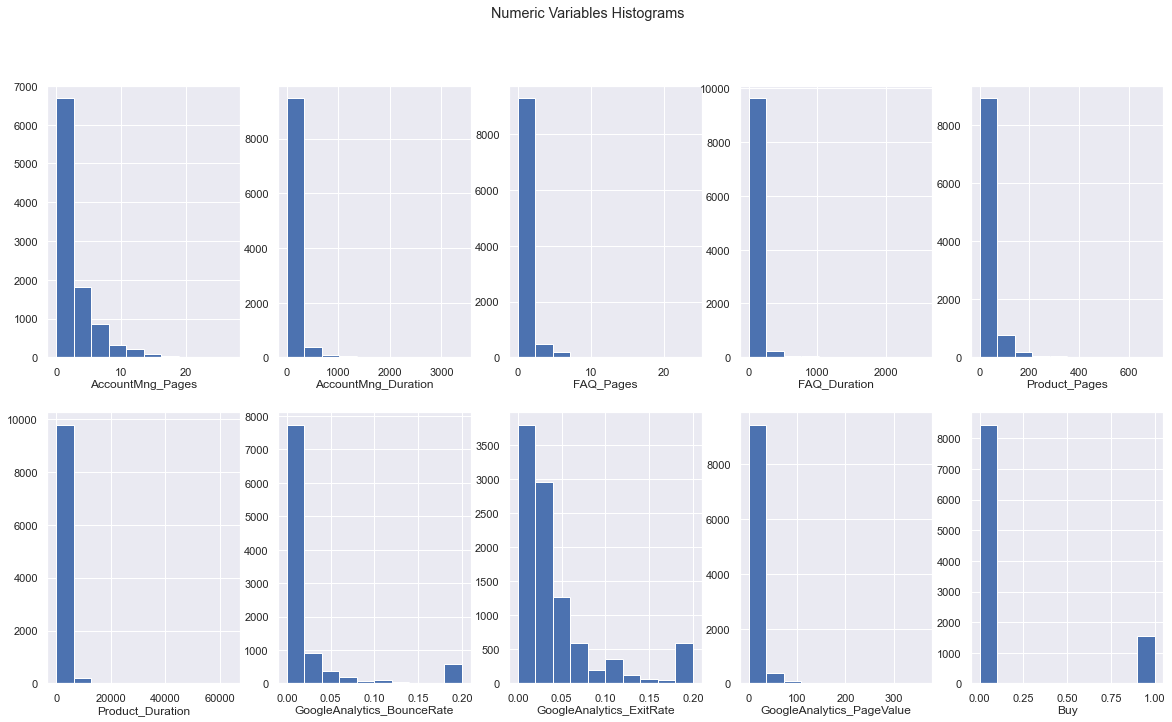

In [314]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"

plt.suptitle(title)

plt.show();

#### Outlier Detection
- Create a filter to identify better the distribution of these metric features

In [315]:
filterHistogram = (
    (train['AccountMng_Duration'] <= 1000)
    &
    (train['FAQ_Pages'] <= 8)
    &
    (train['FAQ_Duration'] <= 1000)
    &
    (train['Product_Pages'] <= 300)
    &
    (train['Product_Duration'] <= 11000)
    & 
    (train['GoogleAnalytics_PageValue'] <= 100)
)

train1 = train[filterHistogram]

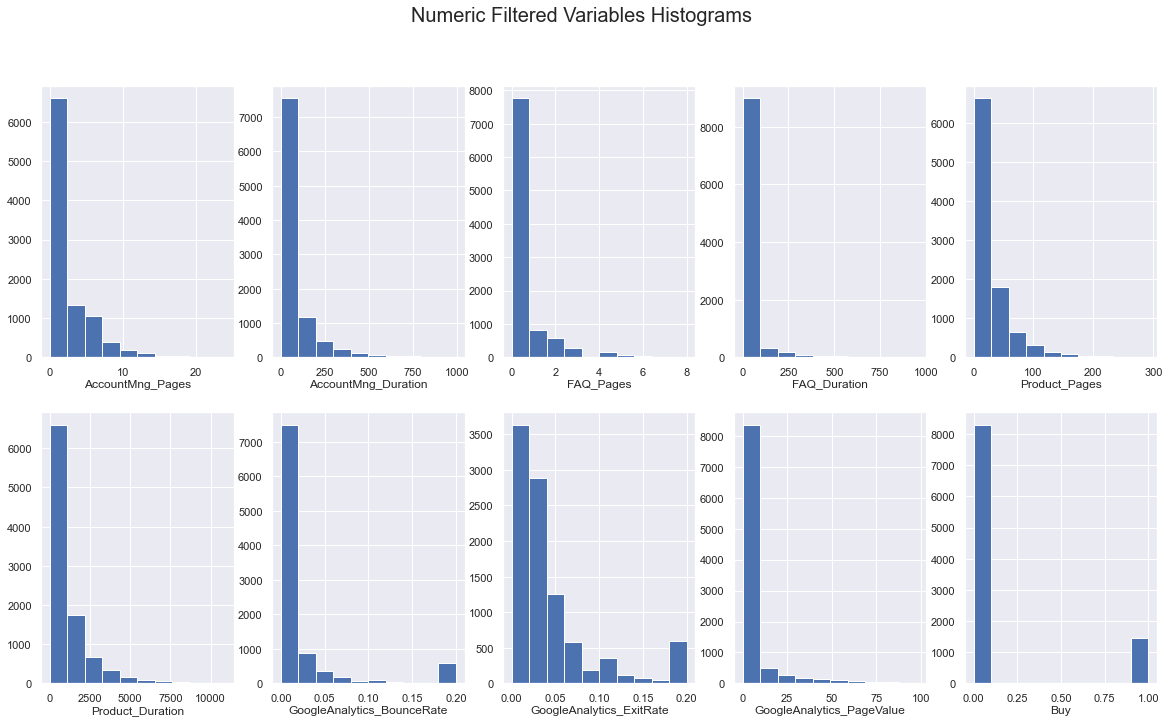

In [316]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train1[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Filtered Variables Histograms"

plt.suptitle(title,fontsize=20)

plt.show();

In [317]:
print('The proportion of records excluded is',round(1-(len(train1)/len(train)),3))

The proportion of records excluded is 0.026


**Insight**: The oultiers may bias or not our model prections. Therefore we will save a filtered version of the dataframe such that we can train both on the entire df and the filtered version. In the test set we will assess both to see which one is the better.
N.B. The test set should not be filtered since that would mean removing some records for which we actually have to make a prediction


In [318]:
train_filtered=train[filterHistogram] #train without outliers

### Boxplot of Metric Features

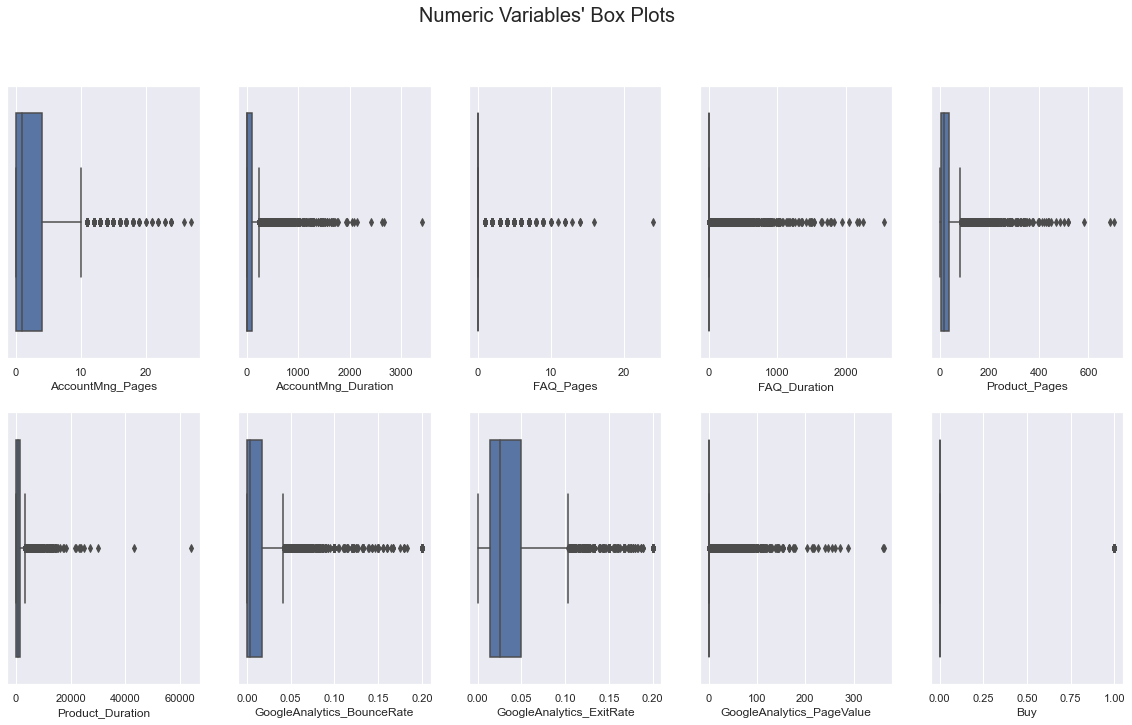

In [319]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=20)

plt.show();

### Barplots of Categorical Features

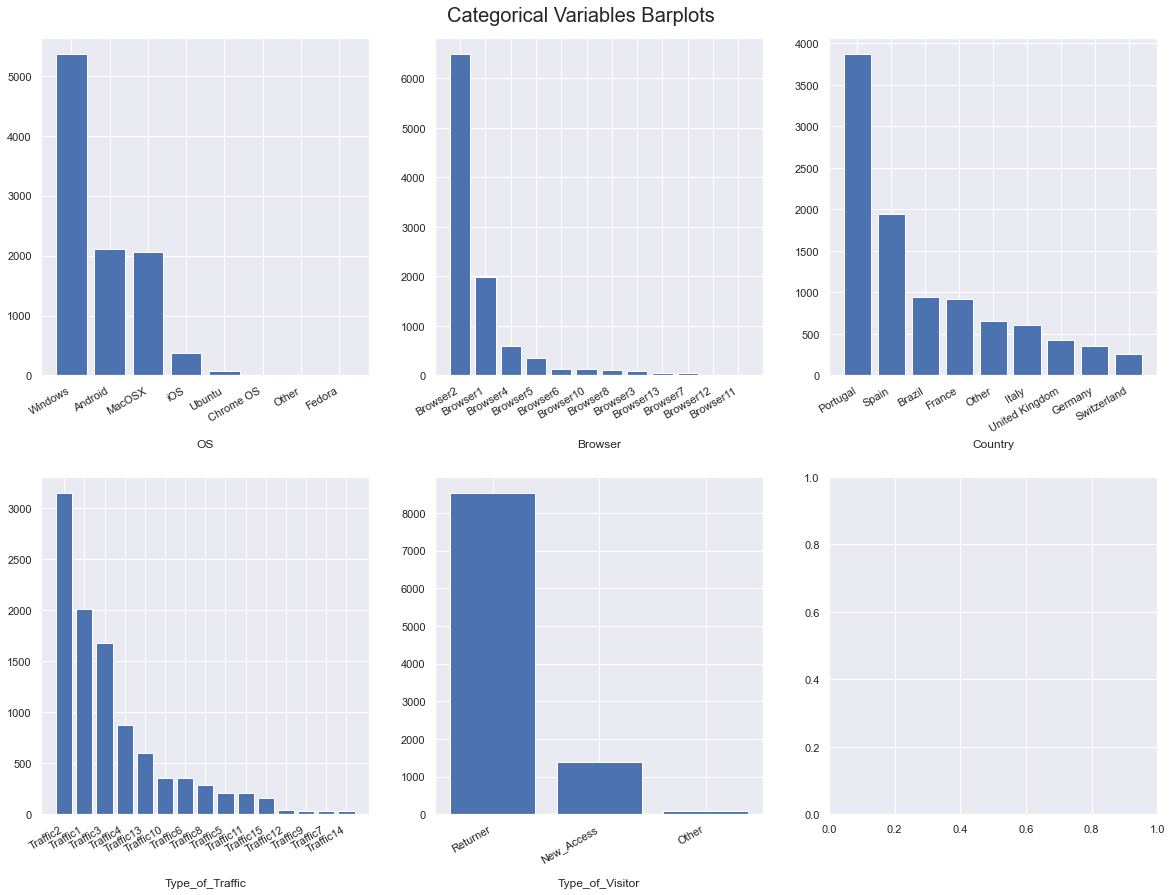

In [320]:
# All Non-numeric Variables' Barplots in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(categorical_features) / 2), figsize=(20, 11))


# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), categorical_features): # Notice the zip() function and flatten() method
    ax.bar(train[feat].value_counts().index,train[feat].value_counts().values)
    ax.set_title(feat, y=-0.23)
    #labels rotation
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    
# Layout
# Add a centered title to the figure:
title = "Categorical Variables Barplots"
plt.suptitle(title, y=1.03, fontsize=20)
# Space in betweeen rows
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3,)

plt.show();

**Question**: How should we treat the records belonging to some class of a categorical feature with a very small amount of instances?

In [321]:
train['Type_of_Visitor'].value_counts()

Returner      8534
New_Access    1391
Other           74
Name: Type_of_Visitor, dtype: int64

*Note!*
- Who are the Returners? Are they all access_IDs referred to New_access?
- Can we use the information of others or should we consider them as outliers?

## Feature Engineering
- Building new features from the existing ones

#### Features: Total Pages Visited and Total Duration

- There are three pairs of features that concern the number of pages visited by a user about a specific category and the corresponding total time spent on them.
    - We build a feature containing the overall total number of pages visited and the corresponding total time spent on them.

In [322]:
train['Total_Pages_Visited'] = train['AccountMng_Pages'] + train['FAQ_Pages'] + train['Product_Pages']

In [323]:
#check how many records have 0 total pages visited. Can we consider them errors?
train[train['Total_Pages_Visited']==0]

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
1366  197874215 2020-05-31                 0                  0.0          0   
4133  392303587 2020-06-23                 0                  0.0          0   
4368  407933189 2020-11-19                 0                  0.0          0   
6684  571942325 2020-11-05                 0                  0.0          0   
6933  587350847 2020-05-04                 0                  0.0          0   
7834  648323097 2020-11-02                 0                  0.0          0   

      FAQ_Duration  Product_Pages  Product_Duration  \
1366           0.0              0               0.0   
4133           0.0              0               0.0   
4368           0.0              0               0.0   
6684           0.0              0               0.0   
6933           0.0              0               0.0   
7834           0.0              0               0.0   

      GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
1366                        0.20                    0.2000   
4133                        0.18                    0.1818   
4368                        0.20                    0.2000   
6684                        0.20                    0.2000   
6933                        0.20                    0.2000   
7834                        0.20                    0.2000   

      GoogleAnalytics_PageValue       OS   Browser         Country  \
1366                        0.0   MacOSX  Browser2           Spain   
4133                        0.0  Windows  Browser2           Italy   
4368                        0.0  Android  Browser1  United Kingdom   
6684                        0.0  Android  Browser1         Germany   
6933                        0.0  Windows  Browser2         Germany   
7834                        0.0  Android  Browser1  United Kingdom   

     Type_of_Traffic Type_of_Visitor  Buy  Total_Pages_Visited  
1366       Traffic12        Returner    0                    0  
4133        Traffic6        Returner    0                    0  
4368        Traffic2        Returner    0                    0  
6684        Traffic8        Returner    0                    0  
6933        Traffic3        Returner    0                    0  
7834        Traffic3        Returner    0                    0

In [324]:
train['Total_Duration'] = train['AccountMng_Duration'] + train['FAQ_Duration'] + train['Product_Duration']

In [325]:
#check how many records have 0 Total Duration. How is it possible if the number of pages visited is >=1 ??
query_duration_0=train[train['Total_Duration']==0]
query_duration_0

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
16    103674236 2020-12-22                 0                  0.0          0   
19    103778619 2020-09-01                 0                  0.0          0   
26    104571401 2020-12-21                 0                  0.0          0   
37    105317095 2020-05-02                 0                  0.0          0   
44    105635569 2020-05-20                 0                  0.0          0   
...         ...        ...               ...                  ...        ...   
9970  797357021 2020-02-09                 0                  0.0          0   
9980  797646846 2020-05-06                 0                  0.0          0   
9982  797733043 2020-03-19                 0                  0.0          0   
9984  797780261 2020-11-30                 0                  0.0          0   
9988  797931837 2020-05-17                 0                  0.0          0   

      FAQ_Duration  Product_Pages  Product_Duration  \
16             0.0              1               0.0   
19             0.0              1               0.0   
26             0.0              1               0.0   
37             0.0              1               0.0   
44             0.0              1               0.0   
...            ...            ...               ...   
9970           0.0              1               0.0   
9980           0.0              1               0.0   
9982           0.0              1               0.0   
9984           0.0              3               0.0   
9988           0.0              3               0.0   

      GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
16                           0.2                       0.2   
19                           0.2                       0.2   
26                           0.2                       0.2   
37                           0.2                       0.2   
44                           0.2                       0.2   
...                          ...                       ...   
9970                         0.2                       0.2   
9980                         0.2                       0.2   
9982                         0.2                       0.2   
9984                         0.2                       0.2   
9988                         0.2                       0.2   

      GoogleAnalytics_PageValue       OS   Browser      Country  \
16                          0.0  Windows  Browser2  Switzerland   
19                          0.0  Android  Browser1       France   
26                          0.0  Windows  Browser2       Brazil   
37                          0.0  Android  Browser1       Brazil   
44                          0.0  Windows  Browser5     Portugal   
...                         ...      ...       ...          ...   
9970                        0.0  Windows  Browser2       Brazil   
9980                        0.0  Android  Browser1        Spain   
9982                        0.0  Windows  Browser2        Italy   
9984                        0.0   MacOSX  Browser2     Portugal   
9988                        0.0   MacOSX  Browser2        Other   

     Type_of_Traffic Type_of_Visitor  Buy  Total_Pages_Visited  Total_Duration  
16          Traffic1        Returner    0                    1             0.0  
19          Traffic2        Returner    0                    1             0.0  
26         Traffic13        Returner    0                    1             0.0  
37          Traffic1        Returner    0                    1             0.0  
44          Traffic3        Returner    0                    1             0.0  
...              ...             ...  ...                  ...             ...  
9970        Traffic1        Returner    0                    1             0.0  
9980        Traffic3        Returner    0                    1             0.0  
9982        Traffic1        Returner    0                    1             0.0  
9984       Traffic10    

In [326]:
query_duration_0['Buy'].value_counts()

0    596
1      2
Name: Buy, dtype: int64

**Insight**: When the total duration is 0 there are in many cases an amount of pages visited >=1 (This should be an error!). Moreover, as we can see, over 598 records we know that two were custumers that bought: how is this possible?

**Note**: Here below we try to create some features as ratio between the total duration in one category and the total number of pages. The later effect was not good, so maybe we can just mention that we tried this :)

In [327]:
#train['Avg_Duration_per_Mng'] = train['AccountMng_Duration']/train['AccountMng_Pages']

In [328]:
#train['Avg_Duration_per_FAQ'] = train['FAQ_Duration']/train['FAQ_Pages']

In [329]:
#train['Avg_Duration_per_Product'] = train['Product_Duration']/train['Product_Pages']

In [330]:
#train['Avg_Duration_per_TOT'] = train['Total_Duration']/train['Total_Pages_Visited']

In [331]:
#Some of them now have Nan again since we may divide 0 by some other number. We simply fill the Nan with zeros

In [332]:
#train['Avg_Duration_per_Mng'].fillna(0, inplace=True)
#train['Avg_Duration_per_Mng'].isna().sum()

In [333]:
#train['Avg_Duration_per_FAQ'].fillna(0, inplace=True)
#train['Avg_Duration_per_FAQ'].isna().sum()

In [334]:
#train['Avg_Duration_per_TOT'].fillna(0, inplace=True)
#train['Avg_Duration_per_TOT'].isna().sum()

#### Features: Month, Day and Weekday

- Adding a more meaningful temporal dimension to our analysis can help to contextualize and measure TechSpace's web visitors' actions. Consequently, we extract the `Month`, `Day` and `Weekend` from the `Date` feature. The latter a binary variable where 1 indicates weekend and 0 a weekday.   

In [335]:
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Weekend'] = np.where(train['Date'].dt.dayofweek >= 5,1,0)

**Note**: to better understand the online behavior of TechSpace's customers, a series of time-indexed exploratory analyses are conducted and plotted below. We note that while data for April isn't available, this omission is ignored in the plots. Further, both the average and median values are plotted side by side to help gauge possible bias due to the sensitivity of the mean to potential outliers in the data.

##### Time Spent Across Visited Pages Over Time

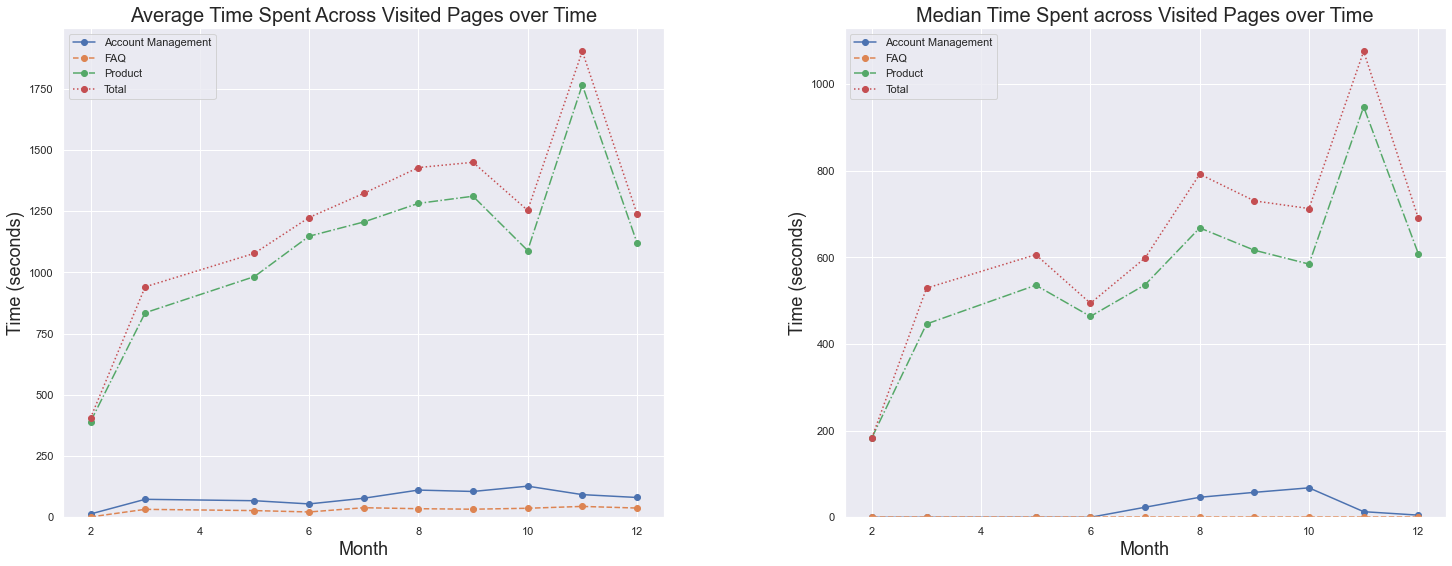

In [336]:
# compute respective mean time
mean_acct_duration = train.groupby('Month')['AccountMng_Duration'].mean()
mean_faq_duration = train.groupby('Month')['FAQ_Duration'].mean()
mean_product_duration = train.groupby('Month')['Product_Duration'].mean()
mean_total_duration = train.groupby('Month')['Total_Duration'].mean()

# compute respective median time
median_acct_duration = train.groupby('Month')['AccountMng_Duration'].median()
median_faq_duration = train.groupby('Month')['FAQ_Duration'].median()
median_product_duration = train.groupby('Month')['Product_Duration'].median()
median_total_duration = train.groupby('Month')['Total_Duration'].median()

# plot data with mean time
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(mean_acct_duration, label = 'Account Management', linestyle='-', marker='o')
plt.plot(mean_faq_duration, label = 'FAQ', linestyle='--', marker='o')
plt.plot(mean_product_duration, label = 'Product', linestyle='-.', marker='o')
plt.plot(mean_total_duration, label = 'Total', linestyle=':', marker='o')
plt.title('Average Time Spent Across Visited Pages over Time', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=18)
plt.legend()
plt.ylim(0)

# plot data with median time
plt.subplot(1, 2, 2)
plt.plot(median_acct_duration, label = 'Account Management', linestyle='-', marker='o')
plt.plot(median_faq_duration, label = 'FAQ', linestyle='--', marker='o')
plt.plot(median_product_duration, label = 'Product', linestyle='-.', marker='o')
plt.plot(median_total_duration, label = 'Total',  linestyle=':', marker='o')
plt.title('Median Time Spent across Visited Pages over Time', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=18)
plt.legend()
plt.subplots_adjust(left = 0.3, right = 1.5, wspace=0.30, hspace=0.50)
plt.ylim(0)
plt.show()

**Insight**: from the above plots we see that the average amount of time users spent viewing Product related pages is far superior in comparison with time spent on Account Management and FAQ pages, respectively. And while an overall increasing trend with regard to total time spent is visible, a considerable spike occurs in November.

##### User Behavior Google Analytics Metrics (Bounce Rate, Exit Rate, Page Value)

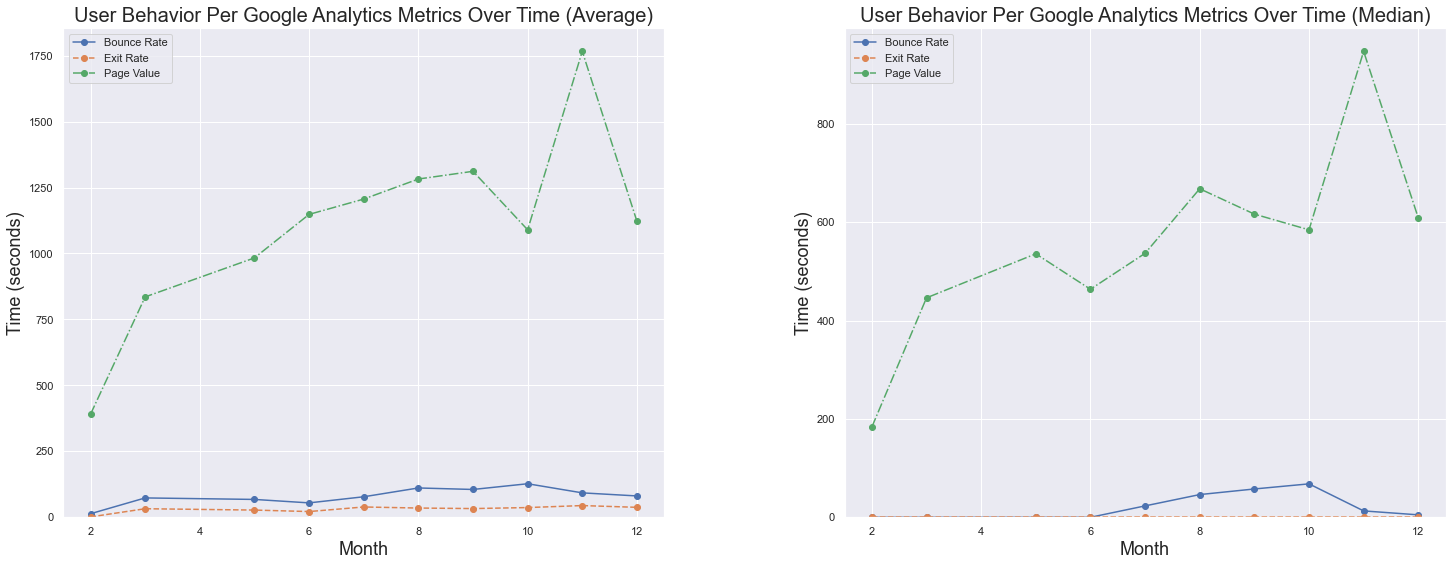

In [337]:
# compute respective mean time
mean_bounce_rate = train.groupby('Month')['GoogleAnalytics_BounceRate'].mean()
mean_exit_rate = train.groupby('Month')['GoogleAnalytics_ExitRate'].mean()
mean_page_value = train.groupby('Month')['GoogleAnalytics_PageValue'].mean()

# compute respective median time
median_bounce_rate = train.groupby('Month')['GoogleAnalytics_BounceRate'].median()
median_exit_rate = train.groupby('Month')['GoogleAnalytics_ExitRate'].median()
median_page_value = train.groupby('Month')['GoogleAnalytics_PageValue'].median()


# plot data with mean time
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(mean_acct_duration, label = 'Bounce Rate', linestyle='-', marker='o')
plt.plot(mean_faq_duration, label = 'Exit Rate', linestyle='--', marker='o')
plt.plot(mean_product_duration, label = 'Page Value', linestyle='-.', marker='o')
plt.title('User Behavior Per Google Analytics Metrics Over Time (Average)', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=18)
plt.ylim(0)
plt.legend()

# plot data with median time
plt.subplot(1, 2, 2)
plt.plot(median_acct_duration, label = 'Bounce Rate', linestyle='-', marker='o')
plt.plot(median_faq_duration, label = 'Exit Rate', linestyle='--', marker='o')
plt.plot(median_product_duration, label = 'Page Value', linestyle='-.', marker='o')
plt.title('User Behavior Per Google Analytics Metrics Over Time (Median)', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=18)
plt.legend()
plt.subplots_adjust(left = 0.3, right = 1.5, wspace=0.30, hspace=0.50)
plt.ylim(0)
plt.show()

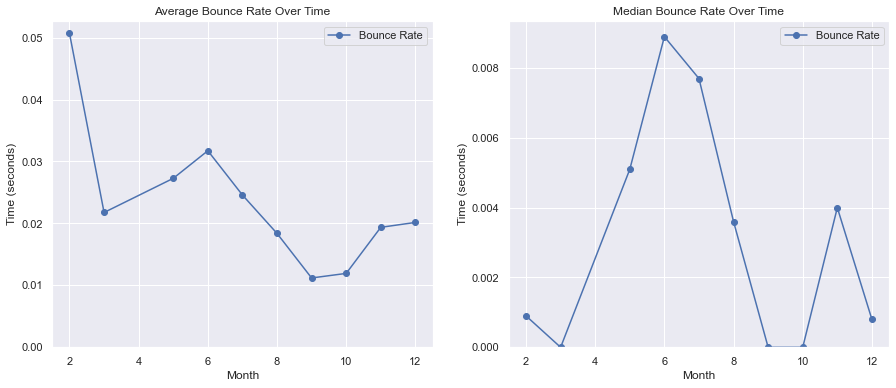

In [338]:
# compute respective mean and median values
mean_bounce_rate = train.groupby('Month')['GoogleAnalytics_BounceRate'].mean()
median_bounce_rate = train.groupby('Month')['GoogleAnalytics_BounceRate'].median()

# set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot data with mean time
plt.subplot(1, 2, 1)
plt.plot(mean_bounce_rate, label = 'Bounce Rate', linestyle='-', marker='o', c = 'b')
plt.title('Average Bounce Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()
plt.ylim(0)

# plot data with median time
plt.subplot(1, 2, 2)
plt.plot(median_bounce_rate, label = 'Bounce Rate', linestyle='-', marker='o', c = 'b')
plt.title('Median Bounce Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()
plt.ylim(0)
plt.show()

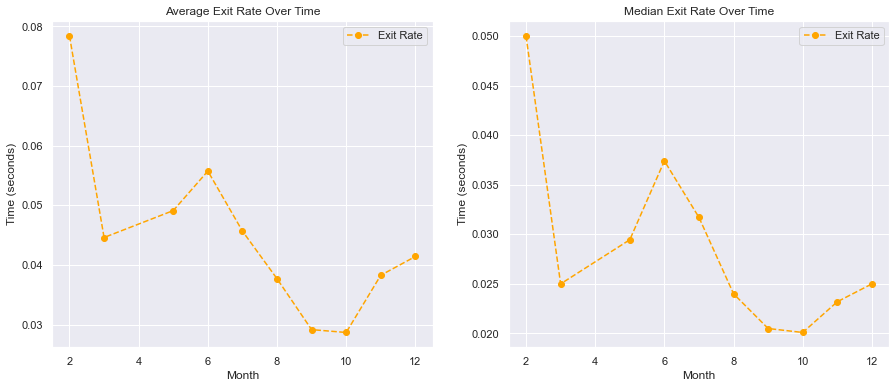

In [339]:
# compute respective mean and median values
mean_exit_rate = train.groupby('Month')['GoogleAnalytics_ExitRate'].mean()
median_exit_rate = train.groupby('Month')['GoogleAnalytics_ExitRate'].median()

# set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot data with mean time
plt.subplot(1, 2, 1)
plt.plot(mean_exit_rate, label = 'Exit Rate', linestyle='--', marker='o', c ='orange')
plt.title('Average Exit Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()

# plot data with median time
plt.subplot(1, 2, 2)
plt.plot(median_exit_rate, label = 'Exit Rate', linestyle='--', marker='o', c ='orange')
plt.title('Median Exit Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

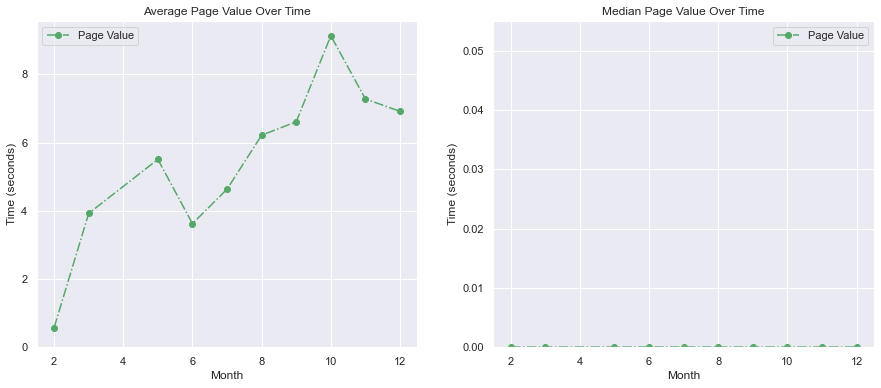

In [340]:
# compute respective mean and median values
mean_page_value = train.groupby('Month')['GoogleAnalytics_PageValue'].mean()
median_page_value = train.groupby('Month')['GoogleAnalytics_PageValue'].median()

# set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot data with mean time
plt.subplot(1, 2, 1)
plt.plot(mean_page_value, label = 'Page Value', linestyle='-.', marker='o', c = 'g')
plt.title('Average Page Value Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()
plt.ylim(0)

# plot data with median time
plt.subplot(1, 2, 2)
plt.plot(median_page_value, label = 'Page Value', linestyle='-.', marker='o', c = 'g')
plt.title('Median Page Value Over Time')
plt.xlabel('Month')
plt.ylabel('Time (seconds)')
plt.legend()
plt.ylim(0)
plt.show()

**Insight**: in line with the increasing trend in average time spent observed, the analysis on user behavior over the past year shows an overall upward trend in page value and a downward trend in bounce rate and exit rate across the same time period.

***Interaction effect among variables*** :*Interaction effect among variables*

In [341]:
train['PageValue_Month']=train['GoogleAnalytics_PageValue']/train['Month']
#train['PageValue_AccountMng_Pages']=train['GoogleAnalytics_PageValue']/train['AccountMng_Pages']

##### Total number of website visits per Month

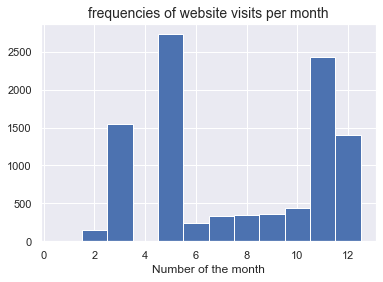

In [342]:
plt.hist(train['Month'], range=[0.5,12.5], bins=12)
plt.title("frequencies of website visits per month", fontsize=14)
plt.xlabel('Number of the month')
plt.show();

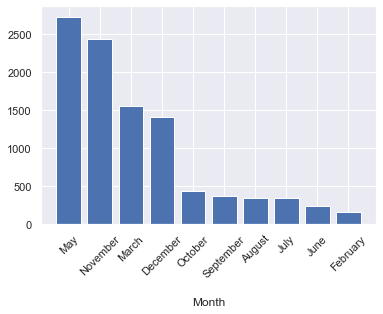

In [343]:
#with the previous dtype of the month (as categorical)
plt.bar(train['Date'].dt.month_name().value_counts().index, train['Date'].dt.month_name().value_counts().values) 
plt.title('Month', y=-0.40)
# Rotate x-labels
plt.xticks(rotation=45)
plt.show();

**Insight**: there were more website visits in May, November, March and December respectively. And the lowest traffic occured in February.

##### Buyers by Type_of_Visitor by Month

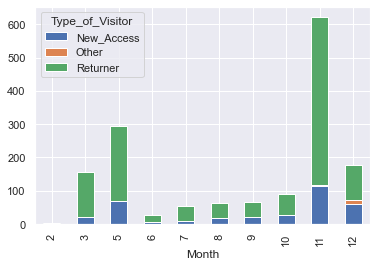

In [344]:
df_counts = train[train['Buy']==1].groupby(['Month', 'Type_of_Visitor']).size().unstack().plot.bar(stacked=True)

**Insight**: Returners also make up the majority of purchases made across all the months in which TechSpace has been in operation, with the highest number of purchases registered in November and May for both Returners and New_Access. 

##### Total number of website visitors per weekday

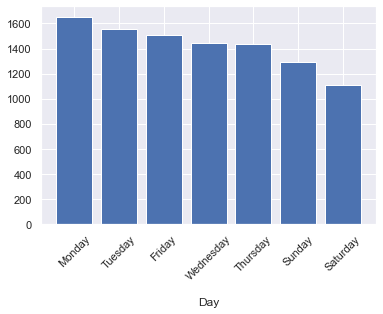

In [345]:
#with the previous dtype of the month (as categorical)
plt.bar(train['Date'].dt.day_name().value_counts().index, train['Date'].dt.day_name().value_counts().values) 
plt.title('Day', y=-0.40)
# Rotate x-labels
plt.xticks(rotation=45)
plt.show();

**Insight**: While 'Day' doesn't seem like an interesting feature on its own (judging from its discriminatory power on the target variable), it can be useful to perform some analysis or create new variables (TBD).

#####  Weekday vs Weekend User Purchase Behaviour

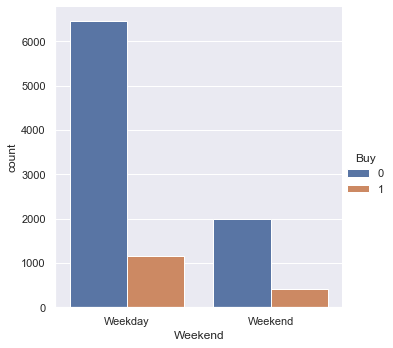

In [346]:
ax = sns.catplot(x = 'Weekend',hue='Buy', data= train, kind="count")
labels = ['Weekday', 'Weekend']
ax.set_xticklabels(labels)
plt.show()

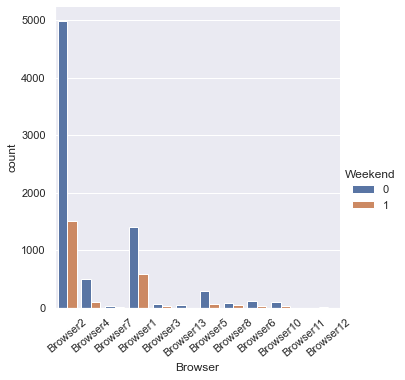

In [347]:
ax = sns.catplot(x ='Browser',hue='Weekend', data= train, kind="count")
ax.set_xticklabels(rotation=40)
plt.show()

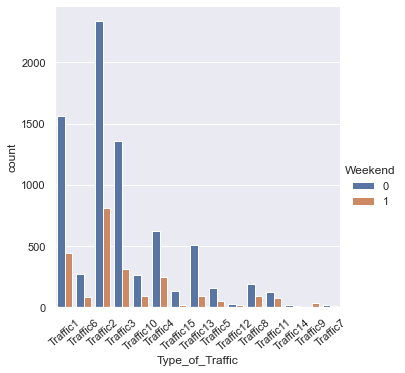

In [348]:
ax = sns.catplot(x ='Type_of_Traffic',hue='Weekend', data= train, kind="count")
ax.set_xticklabels(rotation=40)
plt.show()

### Feature Engineering part 2: cluster features

#### Features: clusters based on the metric features 
Since our algorithm of interest relies on euclidean distance, we scale the data prior to clustering. Here we opt for MinMax Scalar as it preserves the information in the original data and since most of the metric features in the data  are skewed.

In [349]:
# select metric features for clustering
metric_features = ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
                  'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
                  'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']


In [350]:
# scale the train dataset
scaler_clusters = MinMaxScaler((-1,1))

# create dataframe with scaled metric features
train_clusters_scaled =pd.DataFrame(scaler_clusters.fit_transform(train[metric_features]),columns=train[metric_features].columns).set_index(train[metric_features].index)

In [351]:
# Verify the results
train_clusters_scaled.describe().T

count      mean       std  min       25%  \
AccountMng_Pages            9999.0 -0.827835  0.247457 -1.0 -1.000000   
AccountMng_Duration         9999.0 -0.952214  0.105754 -1.0 -1.000000   
FAQ_Pages                   9999.0 -0.957662  0.106616 -1.0 -1.000000   
FAQ_Duration                9999.0 -0.972888  0.109672 -1.0 -1.000000   
Product_Pages               9999.0 -0.910111  0.126384 -1.0 -0.980142   
Product_Duration            9999.0 -0.962492  0.061221 -1.0 -0.994261   
GoogleAnalytics_BounceRate  9999.0 -0.776945  0.487760 -1.0 -1.000000   
GoogleAnalytics_ExitRate    9999.0 -0.568185  0.488453 -1.0 -0.857000   
GoogleAnalytics_PageValue   9999.0 -0.967033  0.103679 -1.0 -1.000000   

                                 50%       75%  max  
AccountMng_Pages           -0.925926 -0.703704  1.0  
AccountMng_Duration        -0.995587 -0.945740  1.0  
FAQ_Pages                  -1.000000 -1.000000  1.0  
FAQ_Duration               -1.000000 -1.000000  1.0  
Product_Pages              -0.948936 -0.892199  1.0  
Product_Duration           -0.981274 -0.954035  1.0  
GoogleAnalytics_BounceRate -0.968000 -0.832000  1.0  
GoogleAnalytics_ExitRate   -0.749000 -0.500000  1.0  
GoogleAnalytics_PageValue  -1.000000 -1.000000  1.0

##### Applying KMeans clustering

In [352]:
# define number of clusters by initializing range of k values 
range_clusters = range(1, 10)

# finding optimal k
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=0)
    kmclust.fit(train_clusters_scaled)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

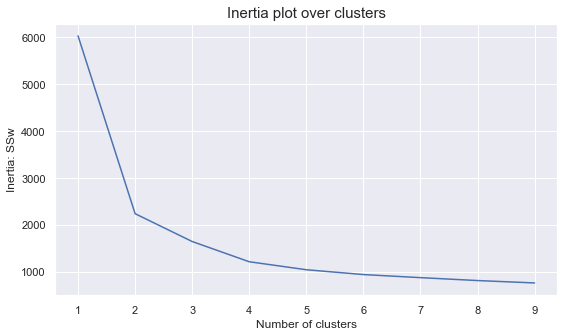

In [353]:
# The inertia plot to find optimal number of clusters
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(ticks = range(9), labels = range_clusters)
plt.show()

**Insight**: Based on the (elbow shaped) inertia plot above, the number of clusters to consider appears to be 2. As an alternative, we also look into the **Silhouette Coefficient** to determine whether a more defined optimal number of clusters can be found.

For n_clusters = 2, the average silhouette_score is : 0.7508995009741454
For n_clusters = 3, the average silhouette_score is : 0.4242103544500925
For n_clusters = 4, the average silhouette_score is : 0.4123812665941051
For n_clusters = 5, the average silhouette_score is : 0.3563664849393056
For n_clusters = 6, the average silhouette_score is : 0.32857108958422465
For n_clusters = 7, the average silhouette_score is : 0.33238897096389947
For n_clusters = 8, the average silhouette_score is : 0.2870044524245606
For n_clusters = 9, the average silhouette_score is : 0.29533111453434824


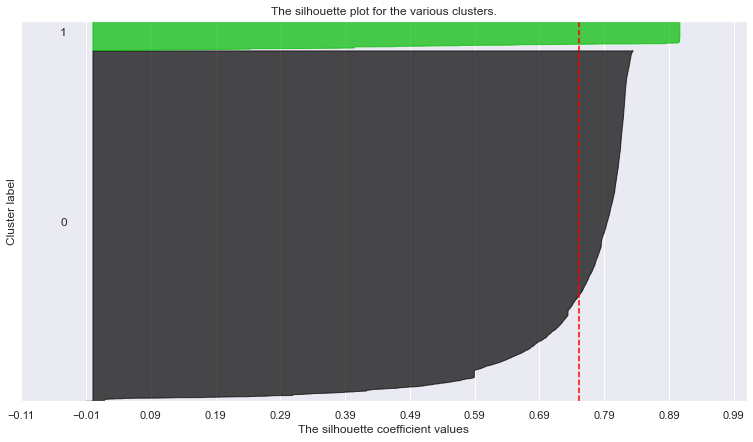

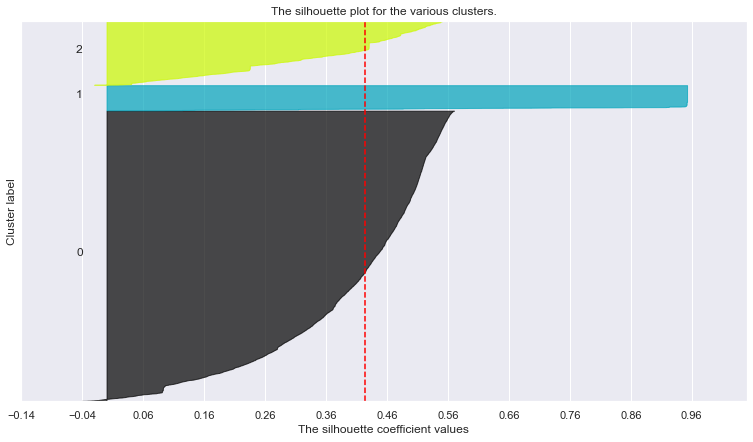

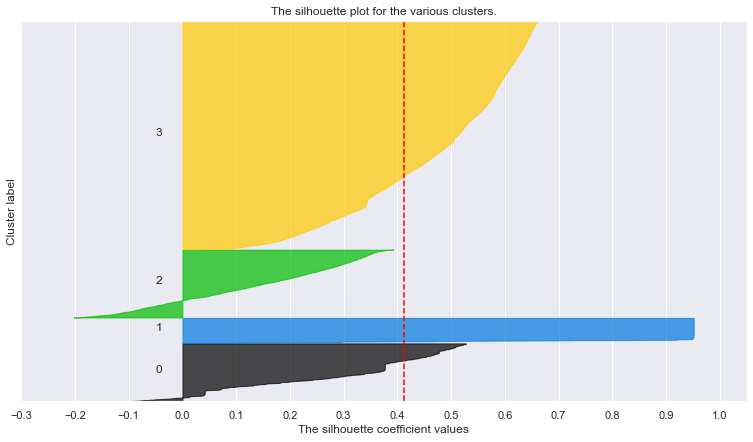

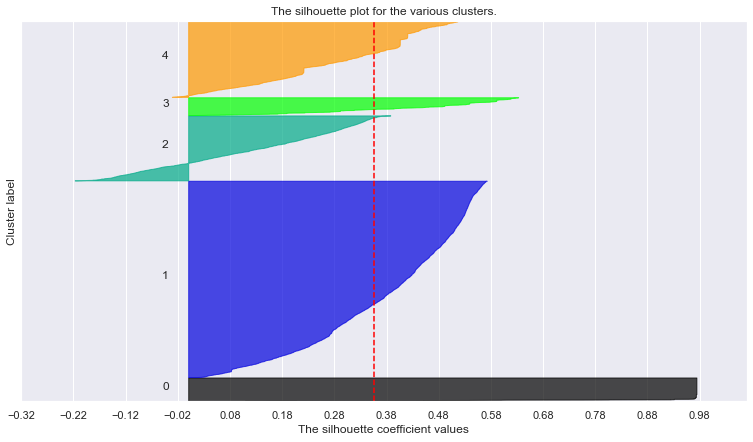

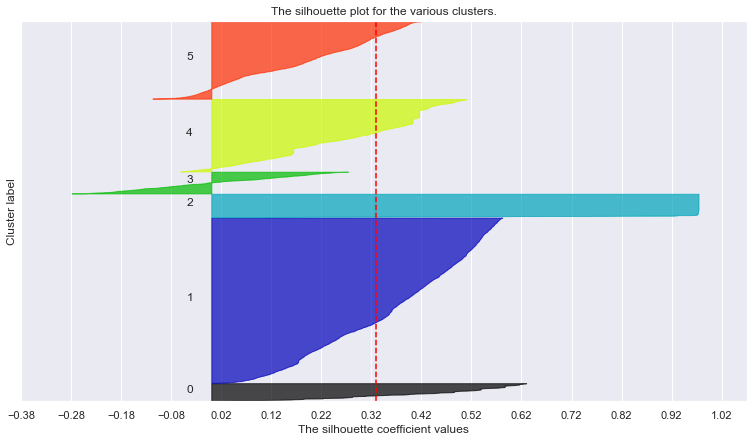

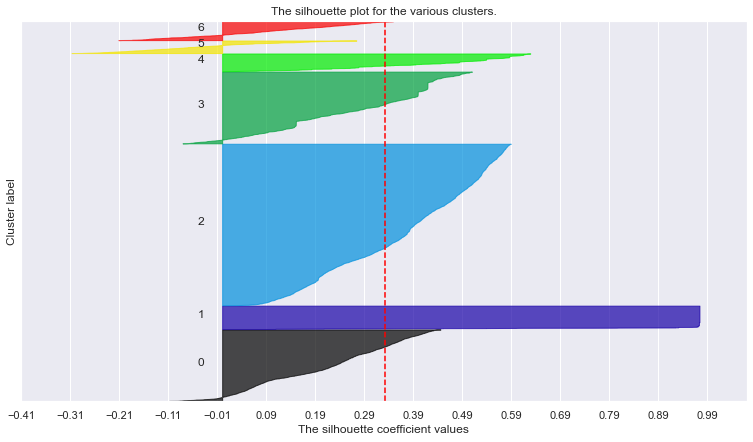

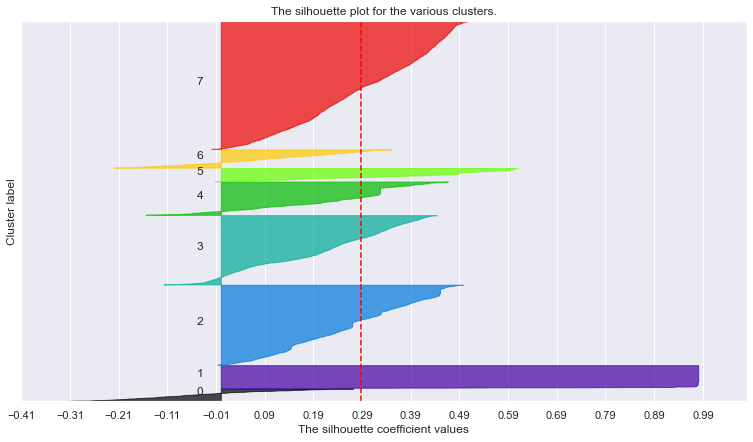

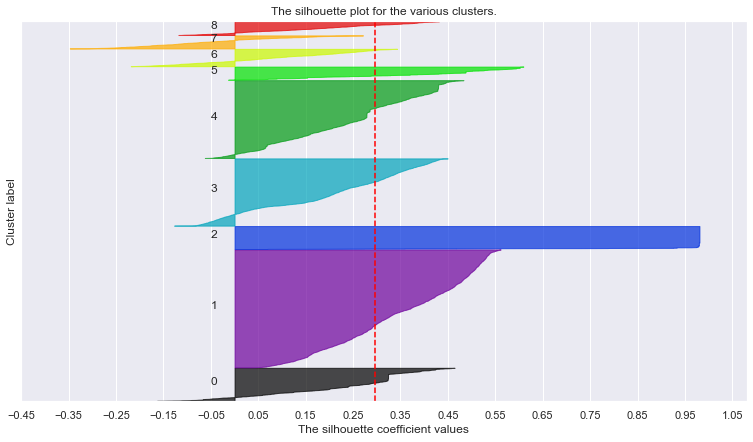

In [354]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=0)
    cluster_labels = kmclust.fit_predict(train_clusters_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(train_clusters_scaled, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(train_clusters_scaled, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(train_clusters_scaled) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

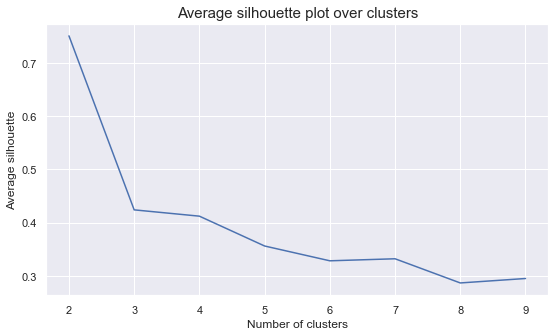

In [355]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.xticks(ticks = range(8), labels = range(2, 10)) # added to correct the xticks
plt.show()

**Insight**: The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. Note that the higher the silhouete coefficient in positive terms, the better. Here the silhouete coefficient considers 2 clusters to be the ideal solution.

In [356]:
# compute clusters based on optimal number 
number_clusters = 2
km_clusters = KMeans(n_clusters = number_clusters, n_init = 10, random_state = 0)
km_clusters = km_clusters.fit(train_clusters_scaled)
km_labels =km_clusters.predict(train_clusters_scaled)
km_labels

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
# add clusters to train
train['Clusters'] = km_clusters.predict(train_clusters_scaled)

In [358]:
# checking the added clusters
train.head(2)

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333 2020-03-21                 0                  0.0          0   
1  103117814 2020-05-20                 0                  0.0          0   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3              64.0                      0.0000   
1           0.0             23             684.5                      0.0217   

   GoogleAnalytics_ExitRate  ...  Type_of_Traffic Type_of_Visitor Buy  \
0                    0.0667  ...         Traffic1        Returner   0   
1                    0.0449  ...         Traffic6        Returner   0   

  Total_Pages_Visited Total_Duration Month  Day  Weekend  PageValue_Month  \
0                   3           64.0     3   21        1              0.0   
1                  23          684.5     5   20        0              0.0   

   Clusters  
0         0  
1         0  

[2 rows x 24 columns]

In [359]:
# distribution of the data across clusters
train.groupby(['Clusters']).size()

Clusters
0    9239
1     760
dtype: int64

In [360]:
# distribution of Buyers and Non-buyers based on the clusters 
train.groupby('Buy')['Clusters'].value_counts()

Buy  Clusters
0    0           7691
     1            756
1    0           1548
     1              4
Name: Clusters, dtype: int64

### Feature engineering part 3: Features transformation

Sometimes the metric features assume a larger importance if transformed through some fuction. Let's analyze here an example with 'Product pages' and its relation with the target variable:

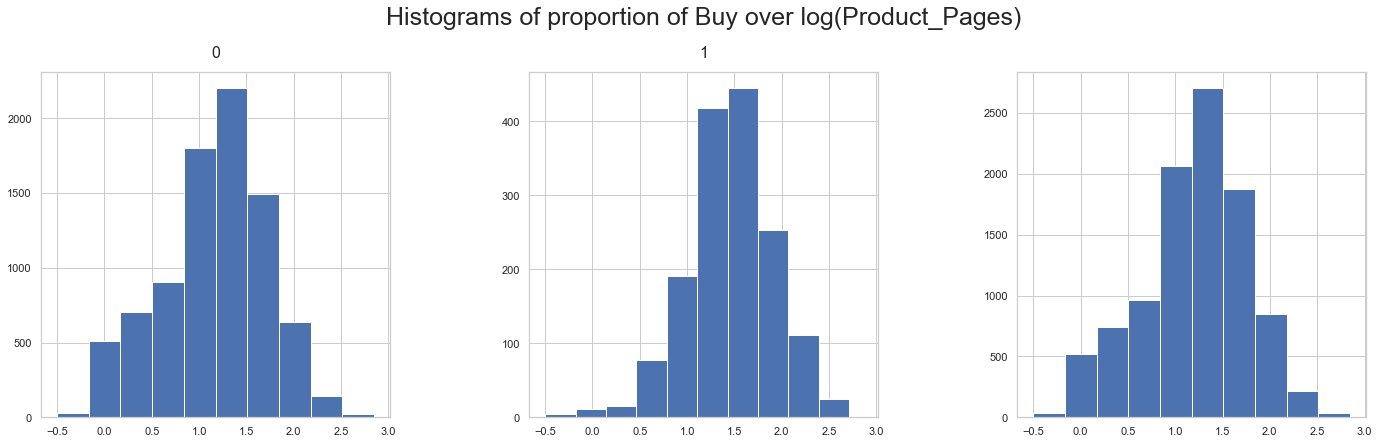

In [361]:
# All Numeric Variables' Histograms in one figure
sns.set(style='whitegrid')

train_Copy=train.copy()
list_buy=train_Copy['Buy'].value_counts().index
train_Copy['log(Product_Pages)']=np.log10(train_Copy['Product_Pages'])
train_Copy['log(Product_Pages)'].replace([np.inf, -np.inf], -0.5, inplace=True)
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(1, len(list_buy)+1, figsize=(23, 6), sharex=True)

for ax, level in zip(axes.flatten(), list_buy):
    subset_df = train_Copy[train_Copy['Buy']==level] #meaning:
    ax.hist(subset_df['log(Product_Pages)']) #histogram for the ax'th subplot
    ax.set_title(str(level), fontsize = 16, pad = 14) #title for the ax'th subplot

axes.flatten()[2].hist(train_Copy['log(Product_Pages)'])
# Layout
# set the spacing between subplots
plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.3)

# Add a centered title to the figure:
title = "Histograms of proportion of Buy over log(Product_Pages)"

plt.suptitle(title, fontsize = 25, y = 1.05)

plt.show();

In [362]:
subset_df['Product_Pages'].replace([np.inf, -np.inf], 0, inplace=True)
subset_df['Product_Pages'].describe()

count    1552.000000
mean       47.687500
std        57.869757
min         0.000000
25%        15.000000
50%        29.000000
75%        57.000000
max       517.000000
Name: Product_Pages, dtype: float64

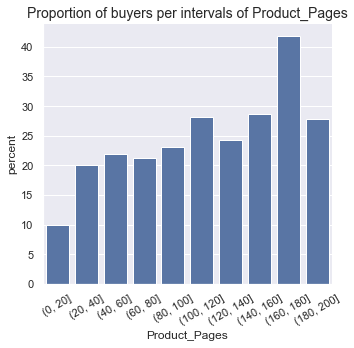

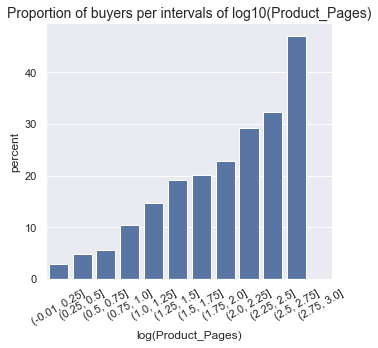

In [363]:
sns.set(color_codes=True)

x,y = 'Product_Pages', 'Buy'
bins=[0,20,40,60,80,100,120,140,160,180,200]

query=train.groupby(pd.cut(train[x],bins=bins))[y]\
.value_counts(normalize=True).mul(100)\
.rename('percent')\
.reset_index()

sns.catplot(data=query.loc[query[y] !=0], x=x,y='percent',hue=y, kind='bar', legend=False) #use only 'query' to see the two levels
# layout and title
plt.xticks(rotation=30)
plt.title("Proportion of buyers per intervals of Product_Pages", fontsize=14)
plt.tight_layout()

#log plot

x_log,y = 'log(Product_Pages)', 'Buy'
bins_log=[-0.01,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
train_Copy=train.copy()
train_Copy[x_log]=np.log10(train_Copy[x])
train_Copy[x_log].replace([np.inf, -np.inf], 0, inplace=True)
query_log=train_Copy.groupby(pd.cut(train_Copy[x_log],bins=bins_log))[y]\
.value_counts(normalize=True).mul(100)\
.rename('percent')\
.reset_index()

sns.catplot(data=query_log.loc[query_log[y] !=0], x=x_log,y='percent',hue=y, kind='bar', legend=False) #use only 'query' to see the two levels
# layout and title
plt.xticks(rotation=30)
plt.title("Proportion of buyers per intervals of log10(Product_Pages)", fontsize=14)
plt.tight_layout()

In [364]:
train.columns

Index(['Access_ID', 'Date', 'AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'Buy', 'Total_Pages_Visited',
       'Total_Duration', 'Month', 'Day', 'Weekend', 'PageValue_Month',
       'Clusters'],
      dtype='object')

In [365]:
train_log=train.copy()

Let's transform the features with skewed distribution with np.log

In [366]:
train_log[['log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)','log(Product_Duration)','log(GoogleAnalytics_BounceRate)', 'log(GoogleAnalytics_ExitRate)', 'log(GoogleAnalytics_PageValue)']]= np.log(train_log[['AccountMng_Pages','AccountMng_Duration','FAQ_Pages', 'FAQ_Duration', 'Product_Pages','Product_Duration','GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']])

In [367]:
train_log.drop("Access_ID", axis=1).describe().T

count         mean          std  min  \
AccountMng_Pages                 9999.0     2.324232     3.340676  0.0   
AccountMng_Duration              9999.0    81.205854   179.715545  0.0   
FAQ_Pages                        9999.0     0.508051     1.279390  0.0   
FAQ_Duration                     9999.0    34.559101   139.796989  0.0   
Product_Pages                    9999.0    31.685869    44.550277  0.0   
Product_Duration                 9999.0  1199.769430  1958.276304  0.0   
GoogleAnalytics_BounceRate       9999.0     0.022305     0.048776  0.0   
GoogleAnalytics_ExitRate         9999.0     0.043181     0.048845  0.0   
GoogleAnalytics_PageValue        9999.0     5.963120    18.753626  0.0   
Buy                              9999.0     0.155216     0.362128  0.0   
Total_Pages_Visited              9999.0    34.518152    46.608790  0.0   
Total_Duration                   9999.0  1315.534385  2087.072437  0.0   
Month                            9999.0     7.645865     3.398354  2.0   
Day                              9999.0    15.790879     8.783838  1.0   
Weekend                          9999.0     0.239824     0.426997  0.0   
PageValue_Month                  9999.0     0.880858     3.016272  0.0   
Clusters                         9999.0     0.076008     0.265024  0.0   
log(AccountMng_Pages)            9999.0         -inf          NaN -inf   
log(AccountMng_Duration)         9999.0         -inf          NaN -inf   
log(FAQ_Pages)                   9999.0         -inf          NaN -inf   
log(FAQ_Duration)                9999.0         -inf          NaN -inf   
log(Product_Pages)               9999.0         -inf          NaN -inf   
log(Product_Duration)            9999.0         -inf          NaN -inf   
log(GoogleAnalytics_BounceRate)  9999.0         -inf          NaN -inf   
log(GoogleAnalytics_ExitRate)    9999.0         -inf          NaN -inf   
log(GoogleAnalytics_PageValue)   9999.0         -inf          NaN -inf   

                                        25%         50%          75%  \
AccountMng_Pages                   0.000000    1.000000     4.000000   
AccountMng_Duration                0.000000    7.500000    92.208350   
FAQ_Pages                          0.000000    0.000000     0.000000   
FAQ_Duration                       0.000000    0.000000     0.000000   
Product_Pages                      7.000000   18.000000    38.000000   
Product_Duration                 183.562500  599.000000  1470.270800   
GoogleAnalytics_BounceRate         0.000000    0.003200     0.016800   
GoogleAnalytics_ExitRate           0.014300    0.025100     0.050000   
GoogleAnalytics_PageValue          0.000000    0.000000     0.000000   
Buy                                0.000000    0.000000     0.000000   
Total_Pages_Visited                8.000000   20.000000    42.000000   
Total_Duration                   222.327850  679.514300  1633.702500   
Month                              5.000000    7.000000    11.000000   
Day                                8.000000   16.000000    23.000000   
Weekend                            0.000000    0.000000     0.000000   
PageValue_Month                    0.000000    0.000000     0.000000   
Clusters                           0.000000    0.000000     0.000000   
log(AccountMng_Pages)                   NaN    0.000000     1.386294   
log(AccountMng_Duration)                NaN    2.014903     4.524051   
log(FAQ_Pages)                          NaN         NaN          NaN   
log(FAQ_Duration)                       NaN         NaN          NaN   
log(Product_Pages)                 1.945910    2.890372     3.637586   
log(Product_Duration)              5.212555    6.395262     7.293202   
log(GoogleAnalytics_BounceRate)         NaN   -5.744604    -4.086376   
log(GoogleAnalytics_ExitRate)     -4.247496   -3.684887    -2.995732   
log(GoogleAnalytics_PageValue)          NaN         NaN          NaN   

                                          max  
AccountMng_Pages                    27.000

**Explanation**: Since the log transformation  to zeros is -inf we need to impute these vaules to make use of this data. The idea is that we impute to -inf the a value below the minimum of the finite values of each of the log-attributes. The reason is that in the original data they correspond to zeros and they are the lowest values in the original scale.

In [368]:
#Let's compute the minimum among the finite values
train_log[train_log != -np.inf].min()

Access_ID                                    102863333
Date                               2020-02-01 00:00:00
AccountMng_Pages                                     0
AccountMng_Duration                                0.0
FAQ_Pages                                            0
FAQ_Duration                                       0.0
Product_Pages                                        0
Product_Duration                                   0.0
GoogleAnalytics_BounceRate                         0.0
GoogleAnalytics_ExitRate                           0.0
GoogleAnalytics_PageValue                          0.0
OS                                             Android
Browser                                       Browser1
Country                                         Brazil
Type_of_Traffic                               Traffic1
Type_of_Visitor                             New_Access
Buy                                                  0
Total_Pages_Visited                                  0
Total_Dura

On the next cell we will impute to the -inf the floor approximation of each of the log-attributes

In [369]:
train_log['log(AccountMng_Pages)'].replace({-np.inf:-1},inplace=True)
train_log['log(AccountMng_Duration)'].replace({-np.inf:-1},inplace=True)
train_log['log(FAQ_Pages)'].replace({-np.inf:-1},inplace=True)
train_log['log(FAQ_Duration)'].replace({-np.inf:-1},inplace=True)
train_log['log(Product_Pages)'].replace({-np.inf:-1},inplace=True)
train_log['log(Product_Duration)'].replace({-np.inf:-1},inplace=True)
train_log['log(GoogleAnalytics_BounceRate)'].replace({-np.inf:-10},inplace=True)
train_log['log(GoogleAnalytics_ExitRate)'].replace({-np.inf:-9},inplace=True)
train_log['log(GoogleAnalytics_PageValue)'].replace({-np.inf:-4},inplace=True)

The distribution shoul be fine now, let's check

In [370]:
train_log.drop("Access_ID", axis=1).describe().T

count         mean          std   min  \
AccountMng_Pages                 9999.0     2.324232     3.340676   0.0   
AccountMng_Duration              9999.0    81.205854   179.715545   0.0   
FAQ_Pages                        9999.0     0.508051     1.279390   0.0   
FAQ_Duration                     9999.0    34.559101   139.796989   0.0   
Product_Pages                    9999.0    31.685869    44.550277   0.0   
Product_Duration                 9999.0  1199.769430  1958.276304   0.0   
GoogleAnalytics_BounceRate       9999.0     0.022305     0.048776   0.0   
GoogleAnalytics_ExitRate         9999.0     0.043181     0.048845   0.0   
GoogleAnalytics_PageValue        9999.0     5.963120    18.753626   0.0   
Buy                              9999.0     0.155216     0.362128   0.0   
Total_Pages_Visited              9999.0    34.518152    46.608790   0.0   
Total_Duration                   9999.0  1315.534385  2087.072437   0.0   
Month                            9999.0     7.645865     3.398354   2.0   
Day                              9999.0    15.790879     8.783838   1.0   
Weekend                          9999.0     0.239824     0.426997   0.0   
PageValue_Month                  9999.0     0.880858     3.016272   0.0   
Clusters                         9999.0     0.076008     0.265024   0.0   
log(AccountMng_Pages)            9999.0     0.157237     1.229385  -1.0   
log(AccountMng_Duration)         9999.0     1.812088     2.830857  -1.0   
log(FAQ_Pages)                   9999.0    -0.645674     0.736767  -1.0   
log(FAQ_Duration)                9999.0     0.043985     2.196338  -1.0   
log(Product_Pages)               9999.0     2.761675     1.268203  -1.0   
log(Product_Duration)            9999.0     5.889482     2.248518  -1.0   
log(GoogleAnalytics_BounceRate)  9999.0    -6.743806     3.099608 -10.0   
log(GoogleAnalytics_ExitRate)    9999.0    -3.661818     1.090291  -9.0   
log(GoogleAnalytics_PageValue)   9999.0    -2.504694     2.845682  -4.0   

                                        25%         50%          75%  \
AccountMng_Pages                   0.000000    1.000000     4.000000   
AccountMng_Duration                0.000000    7.500000    92.208350   
FAQ_Pages                          0.000000    0.000000     0.000000   
FAQ_Duration                       0.000000    0.000000     0.000000   
Product_Pages                      7.000000   18.000000    38.000000   
Product_Duration                 183.562500  599.000000  1470.270800   
GoogleAnalytics_BounceRate         0.000000    0.003200     0.016800   
GoogleAnalytics_ExitRate           0.014300    0.025100     0.050000   
GoogleAnalytics_PageValue          0.000000    0.000000     0.000000   
Buy                                0.000000    0.000000     0.000000   
Total_Pages_Visited                8.000000   20.000000    42.000000   
Total_Duration                   222.327850  679.514300  1633.702500   
Month                              5.000000    7.000000    11.000000   
Day                                8.000000   16.000000    23.000000   
Weekend                            0.000000    0.000000     0.000000   
PageValue_Month                    0.000000    0.000000     0.000000   
Clusters                           0.000000    0.000000     0.000000   
log(AccountMng_Pages)             -1.000000    0.000000     1.386294   
log(AccountMng_Duration)          -1.000000    2.014903     4.524051   
log(FAQ_Pages)                    -1.000000   -1.000000    -1.000000   
log(FAQ_Duration)                 -1.000000   -1.000000    -1.000000   
log(Product_Pages)                 1.945910    2.890372     3.637586   
log(Product_Duration)              5.212555    6.395262     7.293202   
log(GoogleAnalytics_BounceRate)  -10.000000   -5.744604    -4.086376   
log(GoogleAnalytics_ExitRate)     -4.247496   -3.684887    -2.995732   
log(GoogleAnalytics_PageValue)    -4.000000   -4.000000    -4.000000   

                                          max  
AccountMng_Page

In [371]:
log_metric_features = train_log.columns.drop(categorical_features).to_list()

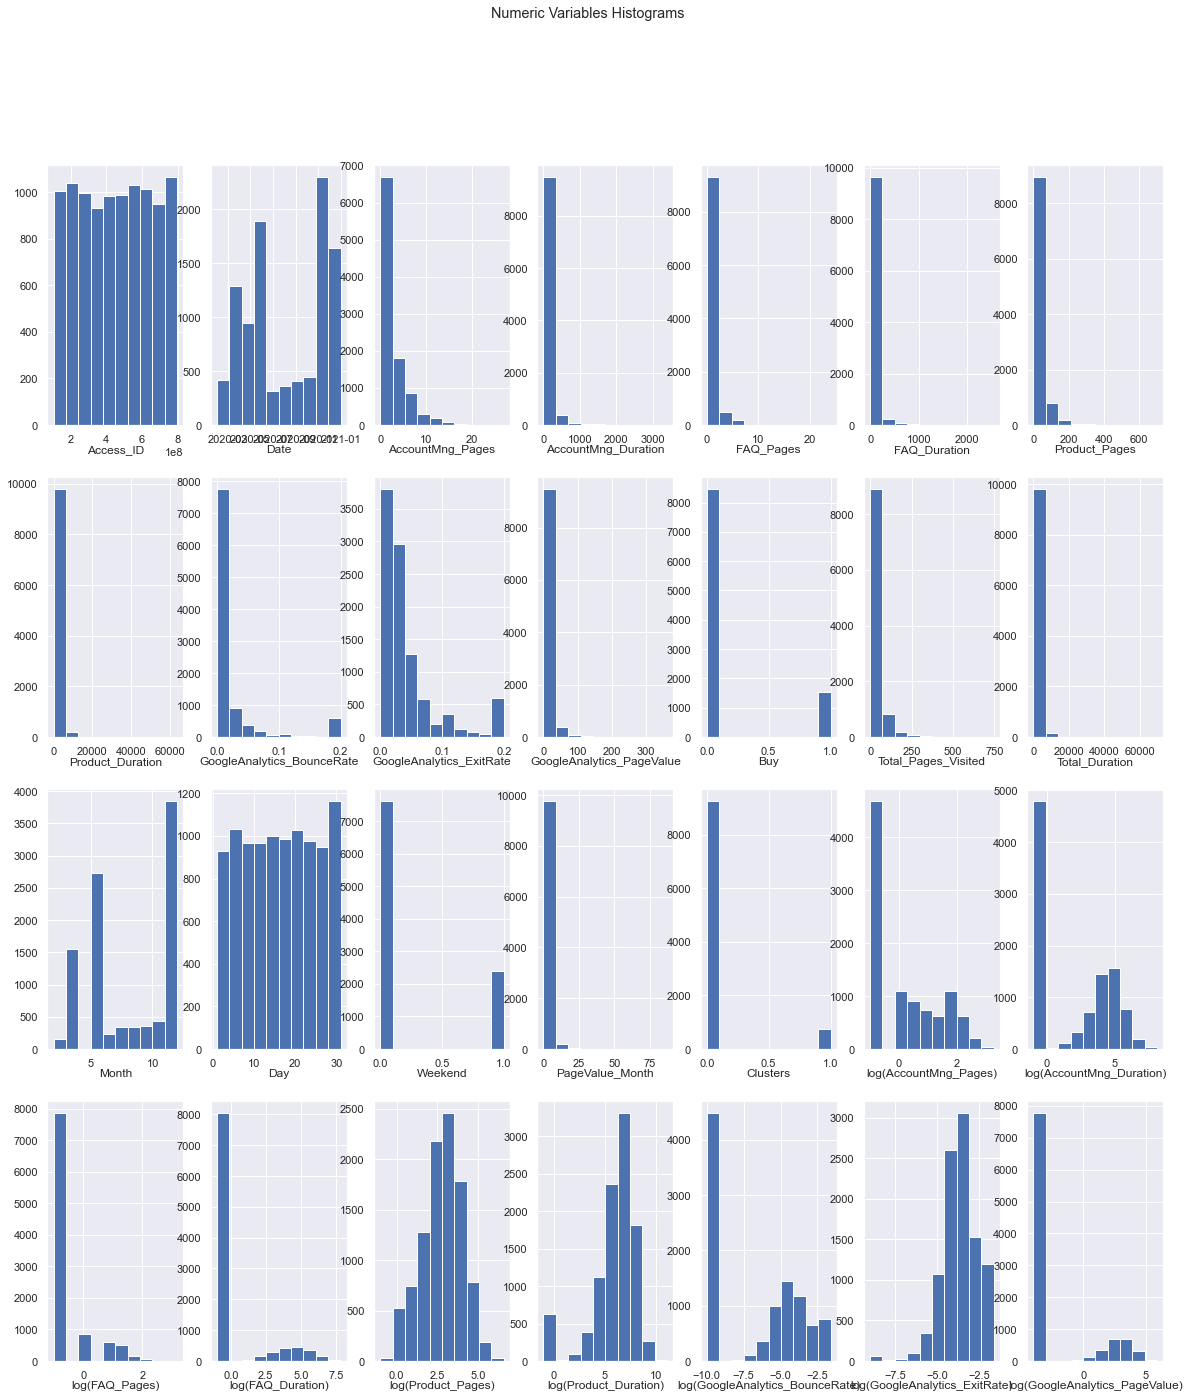

In [372]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(log_metric_features) / 4), figsize=(20, 22))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), log_metric_features):
    ax.hist(train_log[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"

plt.suptitle(title)

plt.show();

In the following cell we remove the normal set of features from the log transformed train dataframe

In [373]:
cols=['AccountMng_Pages','AccountMng_Duration','FAQ_Pages', 'FAQ_Duration', 'Product_Pages','Product_Duration','GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']
train_log.drop(cols, axis=1, inplace=True)

**Total Pages, total duration, day, weekend drop**

We drop them now because it will be easier than doing it in a later stage. However, you can comment the following cell and check that these are actually non important features

In [374]:
#we remove tot pages and tot duration from the main one because they will cause redundancy in the correlation
cols_tot=['Total_Pages_Visited','Total_Duration','Weekend','Day']
train.drop(cols_tot, axis=1, inplace=True)
train_log.drop(cols_tot, axis=1, inplace=True)

### Data partition (num/cat)
- Partition the train dataset into metric and categorical features.

In [375]:
# Set Access_ID as the Index (for convenience)
train.set_index('Access_ID', inplace = True)
train_log.set_index('Access_ID', inplace = True)

In [376]:
# Define the independent variables as X and and the dependent as y
X = train.drop(['Buy'], axis = 1)
y = train['Buy']
# Same for df with log-transformed features
X_log = train_log.drop(['Buy'], axis = 1)
y_log = train_log['Buy']

# Split the data into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 15, stratify = y, shuffle = True)
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_log,y_log, test_size = 0.2, random_state = 15, stratify = y, shuffle = True)

In [377]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num = X_train_num.drop('Clusters', axis = 1) # drop Cluster from X_train as it is technically a categorical feature
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index) #what about 'Date'?

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num = X_val_num.drop('Clusters', axis = 1) # drop Cluster from X_val as it is technically a categorical feature
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index) #what about 'Date'

# Same for df with log-transformed features
X_train_log_num = X_train_log.select_dtypes(include=np.number).set_index(X_train_log.index)
X_train_log_num = X_train_log_num.drop('Clusters', axis = 1) # drop Cluster from X_train_log as it is technically a categorical feature
X_train_log_cat = X_train_log.select_dtypes(exclude=np.number).set_index(X_train_log.index) #what about 'Date'?

X_val_log_num = X_val_log.select_dtypes(include=np.number).set_index(X_val_log.index)
X_val_log_num = X_val_log_num.drop('Clusters', axis = 1) # drop Cluster from X_val_log as it is technically a categorical feature
X_val_log_cat = X_val_log.select_dtypes(exclude=np.number).set_index(X_val_log.index) #what about 'Date'

### Feature Scaling
- Set the metric variables in the same range to help prevent bias in our models. 

In [84]:
#train_scaled=train.copy()

#### MinMaxScaler
Use 'MinMaxScaler' an we decide to set the scale of features to [-1,1]

In [378]:
'''
# scale the train dataset
scaler = MinMaxScaler((-1,1))

# fit the scaler to the train data
scaler.fit(X_train_num)

#overwrite on X_train_num the scaled metric features
X_train_num_scaled=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns).set_index(X_train_num.index)
#overwrite on X_val_num the scaled metric features
X_val_num_scaled=pd.DataFrame(scaler.transform(X_val_num),columns=X_val_num.columns).set_index(X_val_num.index)

# Verify the results on the entire dataframe 
X_train_num_scaled.describe().T # train
#X_val_num_scaled.describe().T # validation
'''

'\n# scale the train dataset\nscaler = MinMaxScaler((-1,1))\n\n# fit the scaler to the train data\nscaler.fit(X_train_num)\n\n#overwrite on X_train_num the scaled metric features\nX_train_num_scaled=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns).set_index(X_train_num.index)\n#overwrite on X_val_num the scaled metric features\nX_val_num_scaled=pd.DataFrame(scaler.transform(X_val_num),columns=X_val_num.columns).set_index(X_val_num.index)\n\n# Verify the results on the entire dataframe \nX_train_num_scaled.describe().T # train\n#X_val_num_scaled.describe().T # validation\n'

In [379]:
'''
# scale the train dataset
scaler_log = MinMaxScaler((-1,1))

# fit the scaler to the train data
scaler_log.fit(X_train_log_num)

#overwrite on X_train_num the scaled metric features
X_train_log_num_scaled=pd.DataFrame(scaler_log.transform(X_train_log_num),columns=X_train_log_num.columns).set_index(X_train.index)
#overwrite on X_val_num the scaled metric features
X_val_log_num_scaled=pd.DataFrame(scaler_log.transform(X_val_log_num),columns=X_val_log_num.columns).set_index(X_val.index)

# Verify the results on the entire dataframe
X_train_log_num_scaled.describe().T # train
#X_val_log_num_scaled.describe().T # validation
'''

'\n# scale the train dataset\nscaler_log = MinMaxScaler((-1,1))\n\n# fit the scaler to the train data\nscaler_log.fit(X_train_log_num)\n\n#overwrite on X_train_num the scaled metric features\nX_train_log_num_scaled=pd.DataFrame(scaler_log.transform(X_train_log_num),columns=X_train_log_num.columns).set_index(X_train.index)\n#overwrite on X_val_num the scaled metric features\nX_val_log_num_scaled=pd.DataFrame(scaler_log.transform(X_val_log_num),columns=X_val_log_num.columns).set_index(X_val.index)\n\n# Verify the results on the entire dataframe\nX_train_log_num_scaled.describe().T # train\n#X_val_log_num_scaled.describe().T # validation\n'

#### Alternative: StandardScaling

In [501]:
# Use 'StandarScaler' to scale the selected features (avg=0, std=1)
from sklearn.preprocessing import StandardScaler

# scale the train dataset
# scale the train dataset
scaler = StandardScaler()

# fit the scaler to the train data
scaler.fit(X_train_num)

#overwrite on X_train_num the scaled metric features
X_train_num_scaled=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns).set_index(X_train_num.index)
#overwrite on X_val_num the scaled metric features
X_val_num_scaled=pd.DataFrame(scaler.transform(X_val_num),columns=X_val_num.columns).set_index(X_val_num.index)

# Verify the results on the entire dataframe 
X_train_num_scaled.describe().T # train
#X_val_num_scaled.describe().T # validation

count          mean       std       min  \
AccountMng_Pages            7999.0  5.434111e-16  1.000063 -0.699687   
AccountMng_Duration         7999.0 -5.539734e-16  1.000063 -0.450218   
FAQ_Pages                   7999.0 -2.043621e-16  1.000063 -0.397098   
FAQ_Duration                7999.0 -3.331016e-16  1.000063 -0.247151   
Product_Pages               7999.0 -1.034024e-17  1.000063 -0.712576   
Product_Duration            7999.0 -1.132083e-16  1.000063 -0.608629   
GoogleAnalytics_BounceRate  7999.0  1.040097e-16  1.000063 -0.459083   
GoogleAnalytics_ExitRate    7999.0 -2.068049e-17  1.000063 -0.884292   
GoogleAnalytics_PageValue   7999.0  2.248760e-16  1.000063 -0.317097   
Month                       7999.0 -2.353412e-16  1.000063 -1.661028   
PageValue_Month             7999.0  3.864614e-16  1.000063 -0.287776   

                                 25%       50%       75%        max  
AccountMng_Pages           -0.699687 -0.401160  0.494424   7.360562  
AccountMng_Duration        -0.450218 -0.401074  0.067159  18.108493  
FAQ_Pages                  -0.397098 -0.397098 -0.397098  18.151144  
FAQ_Duration               -0.247151 -0.247151 -0.247151  18.295193  
Product_Pages              -0.555950 -0.309824  0.137677  15.061847  
Product_Duration           -0.512483 -0.303187  0.135208  31.742694  
GoogleAnalytics_BounceRate -0.459083 -0.391204 -0.107347   3.654779  
GoogleAnalytics_ExitRate   -0.591268 -0.365866  0.140266   3.213938  
GoogleAnalytics_PageValue  -0.317097 -0.317097 -0.317097  18.623367  
Month                      -0.777671 -0.188767  0.989041   1.283493  
PageValue_Month            -0.287776 -0.287776 -0.287776  27.635766

In [502]:
### OR for log-transformed

# scale the train dataset
scaler_log = StandardScaler()

# fit the scaler to the train data
scaler_log.fit(X_train_log_num)

#overwrite on X_train_num the scaled metric features
X_train_log_num_scaled=pd.DataFrame(scaler_log.transform(X_train_log_num),columns=X_train_log_num.columns).set_index(X_train.index)
#overwrite on X_val_num the scaled metric features
X_val_log_num_scaled=pd.DataFrame(scaler_log.transform(X_val_log_num),columns=X_val_log_num.columns).set_index(X_val.index)

# Verify the results on the entire dataframe
X_train_log_num_scaled.describe().T # train
#X_val_log_num_scaled.describe().T # validation


count          mean       std       min  \
Month                            7999.0 -2.353412e-16  1.000063 -1.661028   
PageValue_Month                  7999.0  3.864614e-16  1.000063 -0.287776   
log(AccountMng_Pages)            7999.0  2.274021e-16  1.000063 -0.947128   
log(AccountMng_Duration)         7999.0  1.480112e-16  1.000063 -1.001158   
log(FAQ_Pages)                   7999.0 -3.976067e-16  1.000063 -0.484469   
log(FAQ_Duration)                7999.0 -8.926060e-16  1.000063 -0.477609   
log(Product_Pages)               7999.0 -1.484207e-16  1.000063 -2.984379   
log(Product_Duration)            7999.0  8.170962e-17  1.000063 -3.083891   
log(GoogleAnalytics_BounceRate)  7999.0  2.138002e-16  1.000063 -1.055689   
log(GoogleAnalytics_ExitRate)    7999.0  2.295951e-16  1.000063 -4.888560   
log(GoogleAnalytics_PageValue)   7999.0  1.492049e-16  1.000063 -0.524600   

                                      25%       50%       75%        max  
Month                           -0.777671 -0.188767  0.989041   1.283493  
PageValue_Month                 -0.287776 -0.287776 -0.287776  27.635766  
log(AccountMng_Pages)           -0.947128 -0.134867  0.991166   2.542212  
log(AccountMng_Duration)        -1.001158  0.126628  0.956982   2.219760  
log(FAQ_Pages)                  -0.484469 -0.484469 -0.484469   5.165795  
log(FAQ_Duration)               -0.477609 -0.477609 -0.477609   3.548183  
log(Product_Pages)              -0.652944  0.094516  0.685872   2.997285  
log(Product_Duration)           -0.292936  0.223423  0.621030   2.306315  
log(GoogleAnalytics_BounceRate) -1.055689  0.327092  0.857844   1.651231  
log(GoogleAnalytics_ExitRate)   -0.535559 -0.012976  0.610979   1.880739  
log(GoogleAnalytics_PageValue)  -0.524600 -0.524600 -0.524600   2.943800

#### Alternative: RobustScaling

In [383]:
# Use 'RobustScaler' to scale the selected features 
from sklearn.preprocessing import RobustScaler
'''
# scale the train dataset
rbt_scaler = RobustScaler()

# fit the scaler to the train data
rbt_scaler.fit(X_train_num)

#overwrite on X_train_num the scaled metric features
X_train_num_scaled=pd.DataFrame(rbt_scaler.transform(X_train_num),columns=X_train_num.columns).set_index(X_train.index)
#overwrite on X_val_num the scaled metric features
X_val_num_scaled=pd.DataFrame(rbt_scaler.transform(X_val_num),columns=X_val_num.columns).set_index(X_val.index)

# Verify the results on the entire dataframe
X_train_num_scaled.describe().T
X_val_num_scaled.describe().T
'''

'\n# scale the train dataset\nrbt_scaler = RobustScaler()\n\n# fit the scaler to the train data\nrbt_scaler.fit(X_train_num)\n\n#overwrite on X_train_num the scaled metric features\nX_train_num_scaled=pd.DataFrame(rbt_scaler.transform(X_train_num),columns=X_train_num.columns).set_index(X_train.index)\n#overwrite on X_val_num the scaled metric features\nX_val_num_scaled=pd.DataFrame(rbt_scaler.transform(X_val_num),columns=X_val_num.columns).set_index(X_val.index)\n\n# Verify the results on the entire dataframe\nX_train_num_scaled.describe().T\nX_val_num_scaled.describe().T\n'

### Feature Selection - Numerical Features
- Explore filter, wrapper and other feature selection techniques to help determine good predictors for the target variable.

#### Univariate variables 
We first check if any of the numerical variables is univariate (variance is equal to 0). We drop those variables that are.

In [384]:
X_train_num_scaled.var()

AccountMng_Pages              1.000125
AccountMng_Duration           1.000125
FAQ_Pages                     1.000125
FAQ_Duration                  1.000125
Product_Pages                 1.000125
Product_Duration              1.000125
GoogleAnalytics_BounceRate    1.000125
GoogleAnalytics_ExitRate      1.000125
GoogleAnalytics_PageValue     1.000125
Month                         1.000125
PageValue_Month               1.000125
dtype: float64

In [385]:
#same for log-transformed df
X_train_log_num_scaled.var()

Month                              1.000125
PageValue_Month                    1.000125
log(AccountMng_Pages)              1.000125
log(AccountMng_Duration)           1.000125
log(FAQ_Pages)                     1.000125
log(FAQ_Duration)                  1.000125
log(Product_Pages)                 1.000125
log(Product_Duration)              1.000125
log(GoogleAnalytics_BounceRate)    1.000125
log(GoogleAnalytics_ExitRate)      1.000125
log(GoogleAnalytics_PageValue)     1.000125
dtype: float64

**Insight**: based on the results, none of the variables are univariate, hence no need to drop. 

#### Pearson and Spearman Correlations 
- Assess the correlation between the variables
- Plot the correlation matrix

In [386]:
#we build all_train_num to study the correlation
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head(3)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
122751482         -0.699687            -0.450218  -0.397098     -0.247151   
138490856         -0.699687            -0.450218  -0.397098     -0.247151   
786848761         -0.699687            -0.450218   1.921432      4.029544   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
122751482      -0.667825         -0.608629                    3.654779   
138490856      -0.555950         -0.531383                   -0.164941   
786848761       2.710810          2.079267                   -0.331553   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue     Month  \
Access_ID                                                                  
122751482                  3.213938                  -0.317097 -1.366575   
138490856                  0.091087                  -0.317097  1.283493   
786848761                 -0.462174                  -0.317097  0.989041   

           PageValue_Month  Buy  
Access_ID                        
122751482        -0.287776    0  
138490856        -0.287776    0  
786848761        -0.287776    0

In [387]:
#we build all_train_num to study the correlation
all_train_log_num = X_train_log_num_scaled.join(y_train)
all_train_log_num.head(3)

Month  PageValue_Month  log(AccountMng_Pages)  \
Access_ID                                                     
122751482 -1.366575        -0.287776              -0.947128   
138490856  1.283493        -0.287776              -0.947128   
786848761  0.989041        -0.287776              -0.947128   

           log(AccountMng_Duration)  log(FAQ_Pages)  log(FAQ_Duration)  \
Access_ID                                                                
122751482                 -1.001158       -0.484469          -0.477609   
138490856                 -1.001158       -0.484469          -0.477609   
786848761                 -1.001158        2.353626           2.880430   

           log(Product_Pages)  log(Product_Duration)  \
Access_ID                                              
122751482           -1.644399              -3.083891   
138490856           -0.652944              -0.390713   
786848761            1.788194               1.194925   

           log(GoogleAnalytics_BounceRate)  log(GoogleAnalytics_ExitRate)  \
Access_ID                                                                   
122751482                         1.651231                       1.880739   
138490856                         0.800154                       0.565923   
786848761                         0.530542                      -0.201213   

           log(GoogleAnalytics_PageValue)  Buy  
Access_ID                                       
122751482                         -0.5246    0  
138490856                         -0.5246    0  
786848761                         -0.5246    0

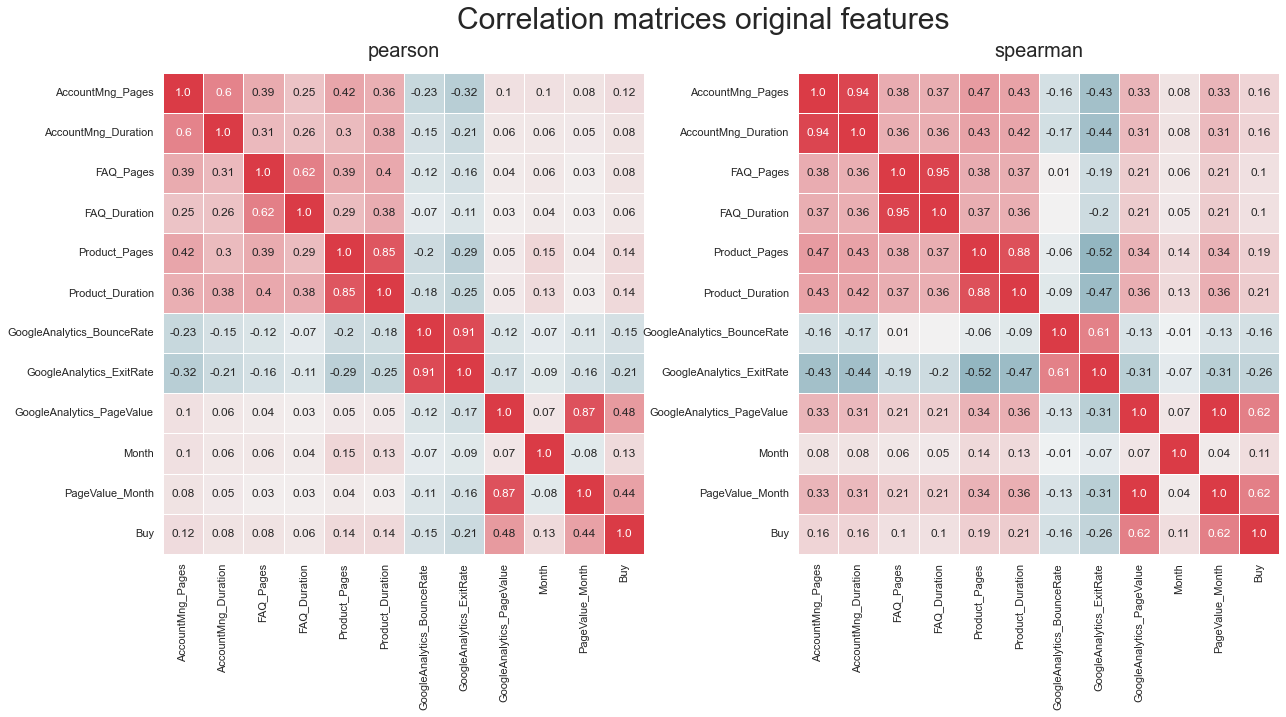

In [388]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each heatmap will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

methods=['pearson','spearman']
# Plot data
# Iterate across axes objects and associate each histogram
for ax, met in zip(axes.flatten(), methods):
    corr_matrix = all_train_num.corr(method=met)
    corr_rounded = np.round(corr_matrix, decimals=2)
    # Build annotation matrix (values above |limit| will appear annotated in the plot)
    limit=0.001
    mask_annot = np.absolute(corr_rounded.values) >= limit
    annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,''))
    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5,ax=ax, cbar=False)
    ax.set_title(met, fontsize=20, y=1.02)
    
# Layout
# set the spacing between subplots
plt.subplots_adjust(wspace = 0.32)
# Add a centered title to the figure:
title = "Correlation matrices original features"
fig.subplots_adjust(top=0.95)
plt.suptitle(title, fontsize=30, y=0.75)

plt.show();

**Insight**: based on the results obtained from the *Pearson* correlation matrix, we can infer that:
- Besides `GoogleAnalytics_PageValue` (with a correlation coefficient of 0.48), none of the independent variables are highly correlated with the target variable. 
- There are two pairs of features that are highly correlated, namely:
    - GoogleAnalytics_BounceRate & GoogleAnalytics_ExitRate: 0.91 
    - Product_Pages & Product_Duration: 0.85

- There are two pairs of features that are moderately correlated, namely:
   - FAQ_Pages	& FAQ_Duration: 0.62   
   - AccountMng_Pages & AccountMng_Duration: 0.60

On the other hand, based on the results obtained from the *spearman* matrix, we can infer that:
- Besides `GoogleAnalytics_PageValue` (with a correlation coefficient of 0.62), none of the independent variables are highly correlated with the target variable. 
- There are two pairs of features that are highly correlated, namely:
    - FAQ_Pages & FAQ_Duration: 0.95
    - AccountMng_Pages & AccountMng_Duration: 0.94   
    - Product_Pages & Product_Duration: 0.88
- There are the same pairs of correlated features
    - GoogleAnalytics_BounceRate & GoogleAnalytics_ExitRate: 0.61 
       
So we'll explore other feature selection techniques to decide which variables to keep.

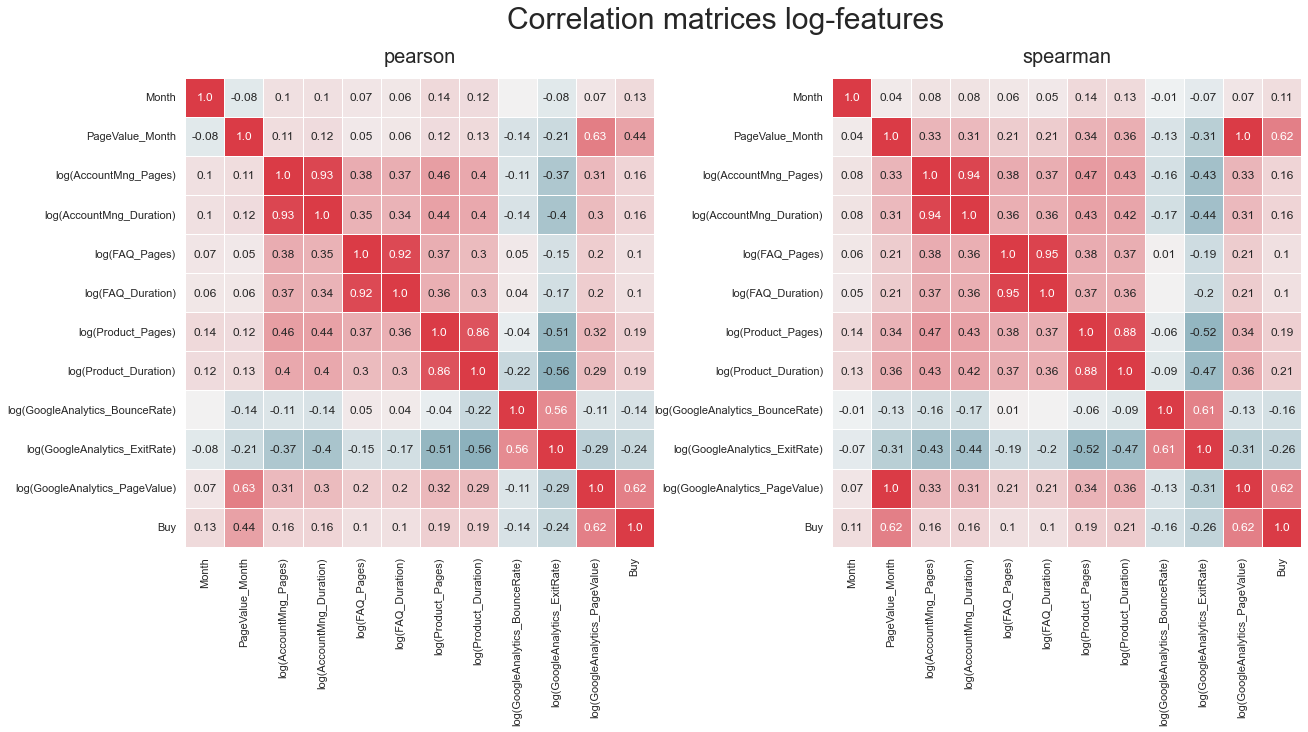

In [389]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each heatmap will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

methods=['pearson','spearman']
# Plot data
# Iterate across axes objects and associate each histogram
for ax, met in zip(axes.flatten(), methods):
    corr_log_matrix = all_train_log_num.corr(method=met)
    corr_rounded = np.round(corr_log_matrix, decimals=2)
    # Build annotation matrix (values above |limit| will appear annotated in the plot)
    limit=0.001
    mask_annot = np.absolute(corr_rounded.values) >= limit
    annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,''))
    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5,ax=ax, cbar=False)
    ax.set_title(met, fontsize=20, y=1.02)
    
# Layout
# set the spacing between subplots
plt.subplots_adjust(wspace = 0.38)
# Add a centered title to the figure:
title = "Correlation matrices log-features"
fig.subplots_adjust(top=0.95)
plt.suptitle(title, fontsize=30, y=0.75)

plt.show();

`AccountMng_Pages`,`AccountMng_Duration`,`FAQ_Pages`,`FAQ_Duration`,`Product_Pages`,`Product_Duration`,`GoogleAnalytics_BounceRate`,`GoogleAnalytics_ExitRate`,`GoogleAnalytics_PageValue`,`Total_Pages_Visited`,`Total_Duration` seem to have a **non-linear correlation** and `month` seems to have a **linear correlation** with `Buy`

**Filter after correlation**

We define the features that we select with the correlation. There should be a treshold of at 0.1 with the target variable to be considered ('Day' for instance is lower). Furthermore features highly correlated to each other should be discarded (ex. 'Total_Duration' and 'Total_Pages_Visited')

In [390]:
features_selected_correlation=abs(corr_matrix['Buy'])>0.1
features_selected_correlation.drop('Buy', inplace=True) # remove the target variable from the filter
features_selected_correlation[['AccountMng_Duration','FAQ_Duration','Product_Duration','GoogleAnalytics_BounceRate','PageValue_Month']]=False

#the true features are the ones that will be kept at the end 
features_selected_correlation

AccountMng_Pages               True
AccountMng_Duration           False
FAQ_Pages                      True
FAQ_Duration                  False
Product_Pages                  True
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Month                          True
PageValue_Month               False
Name: Buy, dtype: bool

In [391]:
features_selected_log_correlation=abs(corr_log_matrix['Buy'])>0.1
features_selected_log_correlation.drop('Buy', inplace=True) # remove the target variable from the filter
features_selected_log_correlation[['log(AccountMng_Duration)','log(FAQ_Duration)','log(Product_Duration)']]=False
#the true features are the onse that will be kept at the end 
features_selected_log_correlation

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)           False
log(FAQ_Pages)                      True
log(FAQ_Duration)                  False
log(Product_Pages)                  True
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)       True
log(GoogleAnalytics_PageValue)      True
Name: Buy, dtype: bool

### Feature Selection - Categorical Features

#### Assessing the discriminatory power of the categorical features

In [534]:
# create function 
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result," . The p-value is ",p)

In [535]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Date is IMPORTANT for Prediction  . The p-value is  2.510184209889705e-13
OS is IMPORTANT for Prediction  . The p-value is  2.1338614369467127e-09
Browser is IMPORTANT for Prediction  . The p-value is  0.016411983495035823
Country is NOT an important predictor. (Discard Country from model)  . The p-value is  0.49112067857919883
Type_of_Traffic is IMPORTANT for Prediction  . The p-value is  1.950597610215358e-42
Type_of_Visitor is IMPORTANT for Prediction  . The p-value is  5.27144114175033e-19


In [536]:
TestIndependence(X_train['Clusters'],y_train, 'Clusters')

Clusters is IMPORTANT for Prediction  . The p-value is  3.317234016298545e-26


**Insight**: According to chi-square, `Country` should be discarded.

### Wrapper methods (metric features)

#### RFE

Recursive Feature Elimination (RFE / Backwards) will allow us to select the most important features to keep. The base estimator used will be a Logistic Regression.

In [395]:
from sklearn.feature_selection import RFE

For this specific method we split the data into train and val in order to evaluate the best number of features. 

In [396]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)         
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train) # using the scaled train data
    X_val_rfe = rfe.transform(X_val_num_scaled) # using the scaled validation data
    model.fit(X_train_rfe, y_train)

    score = model.score(X_val_rfe, y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.884000


In [397]:
# Create the rfe instance with the speficied optimal number of features
rfe = RFE(estimator = model, n_features_to_select = nof)
# Fit and transform that instance applying it to our data
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
# Check which features were selected
selected_features_rfe = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features_rfe

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Month                          True
PageValue_Month                True
dtype: bool

In [398]:
#we do the same for the log transformed train

In [401]:
#no of features
nof_list=np.arange(1,len(X_train_log_num_scaled.columns)+1)         
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_log_num_scaled, y_train_log) # using the scaled train data
    X_val_rfe = rfe.transform(X_val_log_num_scaled) # using the scaled validation data
    model.fit(X_train_rfe, y_train_log)

    score = model.score(X_val_rfe, y_val_log) 
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.899000


In [402]:
# Create the rfe instance with the speficied optimal number of features
rfe = RFE(estimator = model, n_features_to_select = nof)
# Fit and transform that instance applying it to our data
X_rfe = rfe.fit_transform(X = X_train_log_num_scaled, y = y_train_log)
# Check which features were selected
selected_features_log_rfe = pd.Series(rfe.support_, index = X_train_log_num_scaled.columns)
selected_features_log_rfe

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)            True
log(FAQ_Pages)                      True
log(FAQ_Duration)                   True
log(Product_Pages)                 False
log(Product_Duration)               True
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)       True
log(GoogleAnalytics_PageValue)      True
dtype: bool

**Insight**: According to the RFE method, the numerical variables that we should keep are  `Month`, `AccountMng_Pages`,`Product_Duration`,`GoogleAnalytics_BounceRate`,`GoogleAnalytics_ExitRate`, and `GoogleAnalytics_PageValue`,

###  Embedded Methods

#### Lasso Regression

Lasso regression may have some issues with the One-hot encoded variables

In [403]:
# create function to plot the importance of the features
def plot_importance_(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind = "barh")
    plt.title('Feature importance using ' + name + ' Model')
    plt.show()

In [404]:
# create Lasso Regression Instance
lasso = LassoCV().fit(X_train_num_scaled, y_train)
# fit the data and convert it to a Series
coef = pd.Series(lasso.coef_, index = X_train_num_scaled.columns)
# check how many variables were picked and eliminated
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated ' +  str(sum(coef == 0)) + ' variables')
      

Lasso picked 11 variables and eliminated 0 variables


In [405]:
# sort the results
coef.sort_values()

GoogleAnalytics_ExitRate     -0.049986
AccountMng_Duration          -0.000448
FAQ_Duration                  0.000625
AccountMng_Pages              0.001519
FAQ_Pages                     0.003076
Product_Pages                 0.011109
Product_Duration              0.015823
GoogleAnalytics_BounceRate    0.017363
Month                         0.033933
PageValue_Month               0.048891
GoogleAnalytics_PageValue     0.121394
dtype: float64

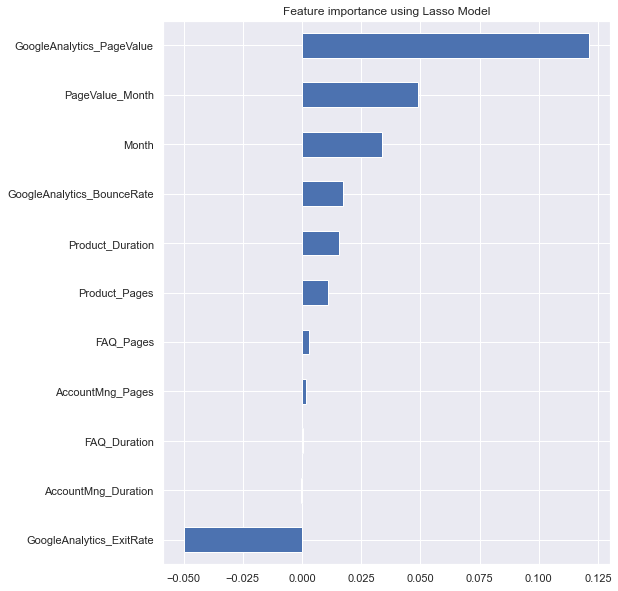

In [406]:
# Inspect result with a plot
plot_importance_(coef,'Lasso')

In [407]:
#which to keep and discard
feature_selected_Lasso=abs(coef)>0.01
feature_selected_Lasso

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Month                          True
PageValue_Month                True
dtype: bool

**Insight**: According to Lasso, variables `AccountMng_Pages`, `AccountMng_Duration`, `FAQ_Pages`, and `Product_Duration`, should be discarded. 

Variables `FAQ_Duration`, `Product_Pages`, `GoogleAnalytics_BounceRate`,`month` also not very significant for defining the target variable. 

Conversely, variables `GoogleAnalytics_PageValue`, `Product_Pages`, and `GoogleAnalytics_ExitRate` seem to be better predictors.

In [408]:
#same for log train

In [409]:
# create Lasso Regression Instance
lasso = LassoCV().fit(X_train_log_num_scaled, y_train)
# fit the data and convert it to a Series
coef = pd.Series(lasso.coef_, index = X_train_log_num_scaled.columns)
# check how many variables were picked and eliminated
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated ' +  str(sum(coef == 0)) + ' variables')

Lasso picked 10 variables and eliminated 1 variables


In [410]:
# sort the results
coef.sort_values()

log(AccountMng_Pages)             -0.028458
log(GoogleAnalytics_ExitRate)     -0.019776
log(GoogleAnalytics_BounceRate)   -0.017462
log(FAQ_Duration)                 -0.009151
log(Product_Duration)             -0.005947
log(Product_Pages)                -0.000000
log(FAQ_Pages)                     0.008053
log(AccountMng_Duration)           0.008460
PageValue_Month                    0.029188
Month                              0.035063
log(GoogleAnalytics_PageValue)     0.204938
dtype: float64

In [411]:
#which to keep and discard
feature_selected_log_Lasso=abs(coef)>0.01
feature_selected_log_Lasso

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)           False
log(FAQ_Pages)                     False
log(FAQ_Duration)                  False
log(Product_Pages)                 False
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)       True
log(GoogleAnalytics_PageValue)      True
dtype: bool

##### Ridge Regression

<font color='red'>Limitation of Ridge Regression</font> : Ridge regression decreases the complexity of a model but **does not reduce the number of variables since** it never leads to a coefficient been zero rather only minimizes it. Hence, **this model is not good for feature reduction.**(!!)

In [412]:
# Using a Ridge Classifier to inspect feature importance
ridge = RidgeClassifierCV().fit(X = X_train_num_scaled,y = y_train)
coef = pd.Series(ridge.coef_[0], index = X_train_num_scaled.columns)
# check how many variables were picked and eliminated
print('Ridge picked ' + str(sum(coef != 0)) + ' variables and eliminated ' +  str(sum(coef == 0)) + ' variables')

Ridge picked 11 variables and eliminated 0 variables


In [413]:
# sort the results
coef.sort_values()

GoogleAnalytics_ExitRate     -0.127336
AccountMng_Duration          -0.008471
FAQ_Duration                  0.002730
AccountMng_Pages              0.006763
FAQ_Pages                     0.006970
Product_Pages                 0.018080
Product_Duration              0.036244
GoogleAnalytics_BounceRate    0.062290
Month                         0.069821
PageValue_Month               0.100467
GoogleAnalytics_PageValue     0.241044
dtype: float64

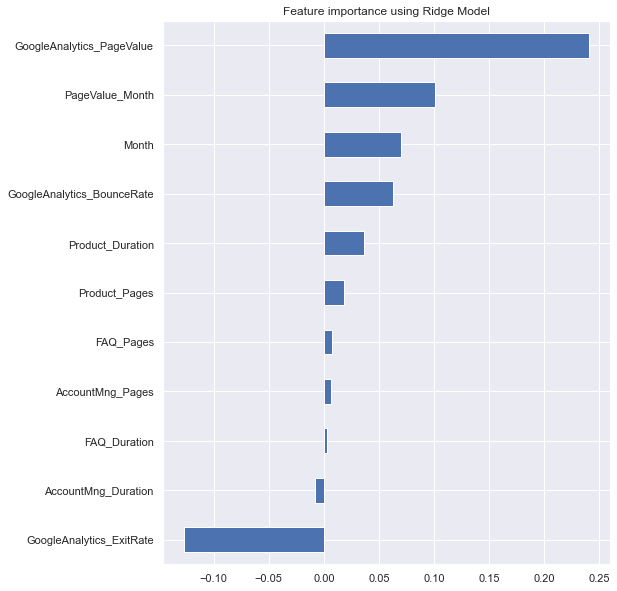

In [414]:
# Inspect result with a plot
plot_importance_(coef,'Ridge')

In [415]:
#which to keep and discard
feature_selected_Ridge=abs(coef)>0.05
feature_selected_Ridge

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Month                          True
PageValue_Month                True
dtype: bool

**Insight**: Based on the 0.05 threshold applied, according to Ridge Regression , `AccountMng_Pages` and `FAQ_Duration`, variables should be discarded.

In [416]:
#same for log train

In [417]:
# Using a Ridge Classifier to inspect feature importance
ridge = RidgeClassifierCV().fit(X = X_train_log_num_scaled,y = y_train)
coef = pd.Series(ridge.coef_[0], index = X_train_log_num_scaled.columns)
# check how many variables were picked and eliminated
print('Ridge picked ' + str(sum(coef != 0)) + ' variables and eliminated ' +  str(sum(coef == 0)) + ' variables')

Ridge picked 11 variables and eliminated 0 variables


In [418]:
# sort the results
coef.sort_values()

log(AccountMng_Pages)             -0.063523
log(GoogleAnalytics_ExitRate)     -0.039887
log(GoogleAnalytics_BounceRate)   -0.035535
log(FAQ_Duration)                 -0.023983
log(Product_Duration)             -0.014557
log(Product_Pages)                 0.002188
log(FAQ_Pages)                     0.022093
log(AccountMng_Duration)           0.023308
PageValue_Month                    0.059033
Month                              0.070456
log(GoogleAnalytics_PageValue)     0.409424
dtype: float64

In [419]:
#which to keep and discard
feature_selected_log_Ridge=abs(coef)>0.05
feature_selected_log_Ridge

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)           False
log(FAQ_Pages)                     False
log(FAQ_Duration)                  False
log(Product_Pages)                 False
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)    False
log(GoogleAnalytics_ExitRate)      False
log(GoogleAnalytics_PageValue)      True
dtype: bool

#### XGBoost

[20:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.05117591 0.03925281 0.04490496 0.03925258 0.04489492 0.04604126
 0.06938426 0.04672245 0.4378863  0.12693502 0.05354947]


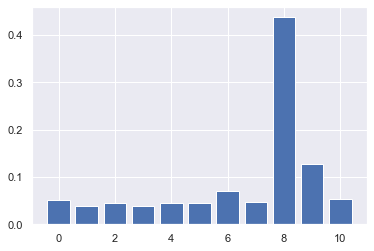

In [420]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(X_train_num_scaled, y_train)

# Check feature importance
print(model.feature_importances_)

# Inspect result with a plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

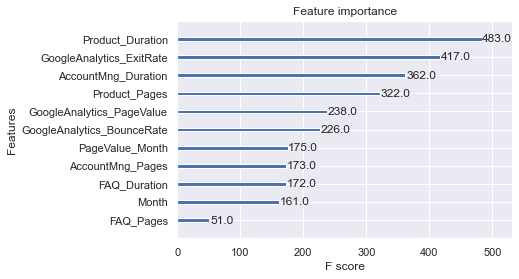

In [421]:
# Inspect result with a plot
plot_importance(model, max_num_features = 12)
plt.show()

In [422]:
threshold=0.05

In [423]:
model.feature_importances_>threshold

array([ True, False, False, False, False, False,  True, False,  True,
        True,  True])

In [424]:
feature_selected_XGboost=pd.Series(model.feature_importances_>threshold,index=X_train_num_scaled.columns)
feature_selected_XGboost

AccountMng_Pages               True
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate      False
GoogleAnalytics_PageValue      True
Month                          True
PageValue_Month                True
dtype: bool

In [425]:
#same for train_log

In [426]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(X_train_log_num_scaled, y_train_log)

# Check feature importance
print(model.feature_importances_)

[20:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.1175128  0.1955125  0.05551476 0.03917873 0.036622   0.03723445
 0.04030924 0.04351434 0.06825911 0.04437737 0.3219647 ]


In [427]:
threshold=0.05
model.feature_importances_>threshold

array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True])

In [428]:
feature_selected_log_XGboost=pd.Series(model.feature_importances_>threshold,index=X_train_log_num_scaled.columns)
feature_selected_log_XGboost

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)           False
log(FAQ_Pages)                     False
log(FAQ_Duration)                  False
log(Product_Pages)                 False
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)      False
log(GoogleAnalytics_PageValue)      True
dtype: bool

### PCA

In [142]:
df_pca = X_train_num_scaled.copy()

In [143]:
#move me above
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca)
pca_feat 

array([[ 1.16324327e+00,  5.14111786e-01,  9.05528282e-02, ...,
         9.68594287e-05,  8.26649328e-04, -3.54270620e-04],
       [-3.03217872e-01,  3.05320537e-01, -1.26282756e-01, ...,
         2.11281980e-03,  1.18311747e-03, -1.34677609e-03],
       [-3.39620028e-01,  1.40274271e-01, -9.32487692e-03, ...,
        -2.29086992e-02,  7.24283463e-02, -2.27214236e-02],
       ...,
       [-4.42277019e-01,  1.70449571e-01, -8.76993589e-02, ...,
         4.31943723e-03,  5.85422194e-03,  4.40089167e-03],
       [ 2.62969722e-01, -4.01057323e-01, -1.03327535e-01, ...,
         1.15204094e-03,  1.00283789e-03, -1.21647248e-03],
       [ 4.72830244e-01, -1.89418117e-01, -7.24602210e-02, ...,
         4.87381850e-05,  1.30966317e-03, -1.23443661e-03]])

**How many Principal Components to retain? Choose from the following table and plots**

In [144]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference  Proportion  Cumulative
1     0.125717    0.000000    0.472848    0.472848
2     0.105409   -0.020308    0.396466    0.869314
3     0.017022   -0.088387    0.064025    0.933340
4     0.004905   -0.012118    0.018447    0.951787
5     0.004492   -0.000412    0.016896    0.968683
6     0.002795   -0.001698    0.010511    0.979195
7     0.002568   -0.000227    0.009657    0.988852
8     0.001718   -0.000850    0.006460    0.995312
9     0.001057   -0.000661    0.003975    0.999288
10    0.000189   -0.000868    0.000712    1.000000

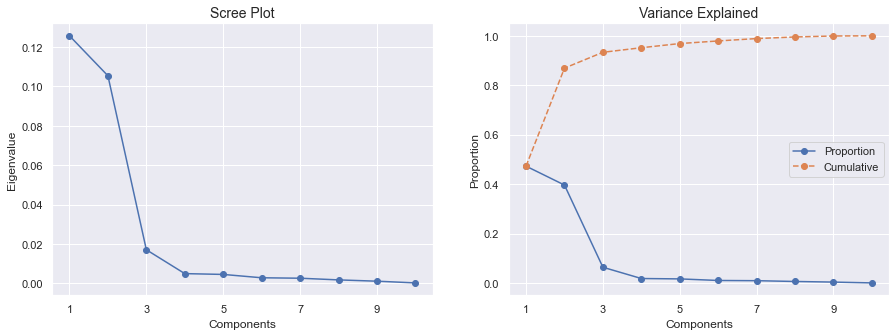

In [145]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [146]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC1       PC2       PC3       PC4       PC5
Access_ID                                                  
122751482  1.163243  0.514112  0.090553 -0.066423 -0.028256
138490856 -0.303218  0.305321 -0.126283  0.035230  0.005202
786848761 -0.339620  0.140274 -0.009325 -0.149899  0.260902
730003909  0.167433 -0.477068  0.224051  0.024996 -0.089337
708520560  0.188368 -0.465856  0.069539  0.010866 -0.066646
...             ...       ...       ...       ...       ...
796313145  0.163642 -0.203304  0.138849 -0.006453  0.156350
185283975 -0.098203 -0.048503  0.028083  0.093931 -0.023946
428288922 -0.442277  0.170450 -0.087699 -0.048261 -0.025880
590512209  0.262970 -0.401057 -0.103328  0.022201  0.005577
557163532  0.472830 -0.189418 -0.072460  0.077520  0.042172

[7999 rows x 5 columns]

In [147]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
122751482          0.000000             0.000000      0.000      0.000000   
138490856          0.000000             0.000000      0.000      0.000000   
786848761          0.000000             0.000000      0.125      0.230645   
730003909          0.333333             0.048694      0.000      0.000000   
708520560          0.185185             0.016330      0.000      0.000000   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
122751482       0.002837          0.000000                      1.0000   
138490856       0.009929          0.002388                      0.0715   
786848761       0.217021          0.083085                      0.0310   
730003909       0.070922          0.034505                      0.0085   
708520560       0.017021          0.016827                      0.0000   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue  Month  \
Access_ID                                                               
122751482                     1.000                   0.000000    0.1   
138490856                     0.238                   0.000000    1.0   
786848761                     0.103                   0.000000    0.9   
730003909                     0.050                   0.042293    0.1   
708520560                     0.059                   0.000000    0.1   

                PC1       PC2       PC3       PC4       PC5  
Access_ID                                                    
122751482  1.163243  0.514112  0.090553 -0.066423 -0.028256  
138490856 -0.303218  0.305321 -0.126283  0.035230  0.005202  
786848761 -0.339620  0.140274 -0.009325 -0.149899  0.260902  
730003909  0.167433 -0.477068  0.224051  0.024996 -0.089337  
708520560  0.188368 -0.465856  0.069539  0.010866 -0.066646

In [148]:
df_pca.columns[:10]

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Month'],
      dtype='object')

**How do we interpret each Principal Component (with style)?**

In [149]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[df_pca.columns[:10].tolist() + pca_feat_names].corr().loc[df_pca.columns[:10].tolist(), pca_feat_names]
loadings.style.applymap(_color_red_or_green)

## One-hot encoded categorical features

Before applying the OHE, we concatenate train and validation to make sure that each of the layers of the categorical features will be included in both

In [429]:
all_data_num = pd.concat([X_train_num_scaled, X_val_num_scaled])
all_data_cat = pd.concat([X_train_cat, X_val_cat])
all_target = pd.concat([y_train, y_val])

all_data_log_num = pd.concat([X_train_log_num_scaled, X_val_log_num_scaled])
all_data_log_cat = pd.concat([X_train_log_cat, X_val_log_cat])
all_target_log = pd.concat([y_train_log, y_val_log])

all_data_log_cat

Date       OS   Browser   Country Type_of_Traffic  \
Access_ID                                                           
122751482 2020-03-16  Android  Browser2  Portugal        Traffic1   
138490856 2020-12-11   MacOSX  Browser2     Spain        Traffic2   
786848761 2020-11-23  Windows  Browser2  Portugal        Traffic3   
730003909 2020-03-28  Android  Browser1    Brazil        Traffic3   
708520560 2020-03-17  Windows  Browser2  Portugal        Traffic2   
...              ...      ...       ...       ...             ...   
721327169 2020-11-02  Windows  Browser2     Italy        Traffic1   
538964276 2020-12-17  Windows  Browser2  Portugal       Traffic10   
650843504 2020-05-27  Windows  Browser4    France        Traffic2   
601178452 2020-05-01  Android  Browser1    Brazil       Traffic12   
508549835 2020-09-11  Windows  Browser2  Portugal        Traffic2   

          Type_of_Visitor  
Access_ID                  
122751482        Returner  
138490856      New_Access  
786848761        Returner  
730003909        Returner  
708520560      New_Access  
...                   ...  
721327169        Returner  
538964276           Other  
650843504        Returner  
601178452        Returner  
508549835      New_Access  

[9999 rows x 6 columns]

In [430]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

#We create a dataframe with dummy variables. columns' names are the name of the generated dummy variables
# and the index is the index of the correspondin X_train or X_val

#for all_data
OS_t = pd.DataFrame(OHE.fit_transform(all_data_cat[['OS']]).toarray(), columns=OHE.get_feature_names(['OS']), index=all_data_cat.index)
Type_of_Visitor_t = pd.DataFrame(OHE.fit_transform(all_data_cat[['Type_of_Visitor']]).toarray(), columns=OHE.get_feature_names(['Type_of_Visitor']), index=all_data_cat.index)
Type_of_Traffic_t = pd.DataFrame(OHE.fit_transform(all_data_cat[['Type_of_Traffic']]).toarray(), columns=OHE.get_feature_names(['Type_of_Traffic']), index=all_data_cat.index)
Browser_t = pd.DataFrame(OHE.fit_transform(all_data_cat[['Browser']]).toarray(), columns=OHE.get_feature_names(['Browser']), index=all_data_cat.index)

#for all_data_log
OS_tl = pd.DataFrame(OHE.fit_transform(all_data_log_cat[['OS']]).toarray(), columns=OHE.get_feature_names(['OS']), index=all_data_log_cat.index)
Type_of_Visitor_tl = pd.DataFrame(OHE.fit_transform(all_data_log_cat[['Type_of_Visitor']]).toarray(), columns=OHE.get_feature_names(['Type_of_Visitor']), index=all_data_log_cat.index)
Type_of_Traffic_tl = pd.DataFrame(OHE.fit_transform(all_data_log_cat[['Type_of_Traffic']]).toarray(), columns=OHE.get_feature_names(['Type_of_Traffic']), index=all_data_log_cat.index)
Browser_tl = pd.DataFrame(OHE.fit_transform(all_data_log_cat[['Browser']]).toarray(), columns=OHE.get_feature_names(['Browser']), index=all_data_log_cat.index)

In [431]:
# drop one of each encoded features to avoid introducing multicollinearity to the model
OS_t.drop('OS_Android', axis = 1, inplace = True)
Type_of_Traffic_t.drop('Type_of_Traffic_Traffic1', axis = 1, inplace = True)
Type_of_Visitor_t.drop('Type_of_Visitor_Other', axis = 1, inplace = True)
Browser_t.drop('Browser_Browser1', axis = 1, inplace = True)

In [432]:
# drop one of each encoded features to avoid introducing multicollinearity to the model
OS_tl.drop('OS_Android', axis = 1, inplace = True)
Type_of_Traffic_tl.drop('Type_of_Traffic_Traffic1', axis = 1, inplace = True)
Type_of_Visitor_tl.drop('Type_of_Visitor_Other', axis = 1, inplace = True)
Browser_tl.drop('Browser_Browser1', axis = 1, inplace = True)

Check the new dfs with the encoded levels

In [433]:
#OS_t.head()
#Type_of_Traffic_t.head()
#Type_of_Visitor_t.head()
#Browser_t.head()

Concatenate *all_data_num* with the new *one-hot encoded* variables and the *Buy* variable

In [434]:
all_data_scaled_encoded = pd.concat([all_data_num, OS_t, Type_of_Visitor_t, Type_of_Traffic_t, Browser_t], axis = 1) #Country_t, is not important
all_data_log_scaled_encoded = pd.concat([all_data_log_num, OS_tl, Type_of_Visitor_tl, Type_of_Traffic_tl, Browser_tl], axis = 1) #Country_tl, is not important


In [435]:
# verifying concatenated dataframe
all_data_scaled_encoded.head()

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
122751482         -0.699687            -0.450218  -0.397098     -0.247151   
138490856         -0.699687            -0.450218  -0.397098     -0.247151   
786848761         -0.699687            -0.450218   1.921432      4.029544   
730003909          1.987063             0.453486  -0.397098     -0.247151   
708520560          0.792952            -0.147163  -0.397098     -0.247151   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
122751482      -0.667825         -0.608629                    3.654779   
138490856      -0.555950         -0.531383                   -0.164941   
786848761       2.710810          2.079267                   -0.331553   
730003909       0.406178          0.507646                   -0.424115   
708520560      -0.444075         -0.064244                   -0.459083   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue     Month  ...  \
Access_ID                                                                 ...   
122751482                  3.213938                  -0.317097 -1.366575  ...   
138490856                  0.091087                  -0.317097  1.283493  ...   
786848761                 -0.462174                  -0.317097  0.989041  ...   
730003909                 -0.679380                   0.483948 -1.366575  ...   
708520560                 -0.642496                  -0.317097 -1.366575  ...   

           Browser_Browser11  Browser_Browser12  Browser_Browser13  \
Access_ID                                                            
122751482                0.0                0.0                0.0   
138490856                0.0                0.0                0.0   
786848761                0.0                0.0                0.0   
730003909                0.0                0.0                0.0   
708520560                0.0                0.0                0.0   

           Browser_Browser2  Browser_Browser3  Browser_Browser4  \
Access_ID                                                         
122751482               1.0               0.0               0.0   
138490856               1.0               0.0               0.0   
786848761               1.0               0.0               0.0   
730003909               0.0               0.0               0.0   
708520560               1.0               0.0               0.0   

           Browser_Browser5  Browser_Browser6  Browser_Browser7  \
Access_ID                                                         
122751482               0.0               0.0               0.0   
138490856               0.0               0.0               0.0   
786848761               0.0               0.0               0.0   
730003909               0.0               0.0               0.0   
708520560               0.0               0.0               0.0   

           Browser_Browser8  
Access_ID                    
122751482               0.0  
138490856               0.0  
786848761               0.0  
730003909               0.0  
708520560               0.0  

[5 rows x 45 columns]

In [436]:
#X_train_num_scaled.info()
#X_train.info()
#X_val_num_scaled.info()
#X_val.info()
#X_train_encoded.info()
#X_val_encoded.info()

### Discriminatory power of categorical features over the target

In [437]:
def bar_charts_categorical(df, feature, target, rotation):
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    
    plot1 = pd.crosstab(df[feature], df[target]).iloc[:, ::-1].plot.bar(stacked=True, ax=axes[0], rot=rotation)
    axes[0].set_title('Frequency bar chart')
    axes[0].set_ylabel('Frequency')
    
    plot2 = pd.crosstab(df[feature], df[target], normalize='index').iloc[:, ::-1].plot.bar(stacked=True,ax=axes[1], rot=rotation)
    axes[1].set_title('Proportion bar chart')
    axes[1].set_ylabel('p')
    
    plt.show()

##### Discriminatory power of 'OS'

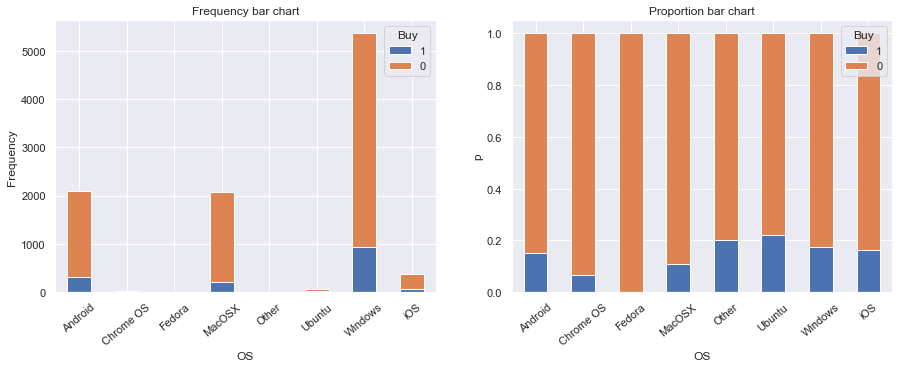

In [438]:
bar_charts_categorical(train, 'OS', 'Buy', 40)

##### Discriminatory power of 'Browser'

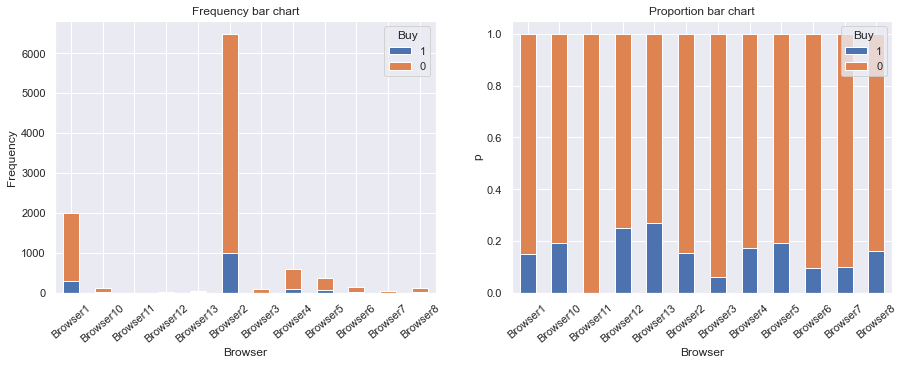

In [439]:
bar_charts_categorical(train, 'Browser', 'Buy', 40)

##### Discriminatory power of 'Country'

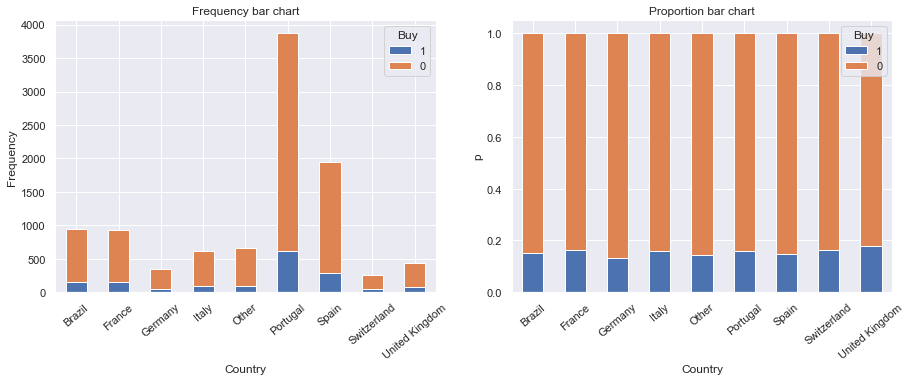

In [440]:
bar_charts_categorical(train, 'Country', 'Buy', 40)

##### Discriminatory power of 'Type_of_Traffic'

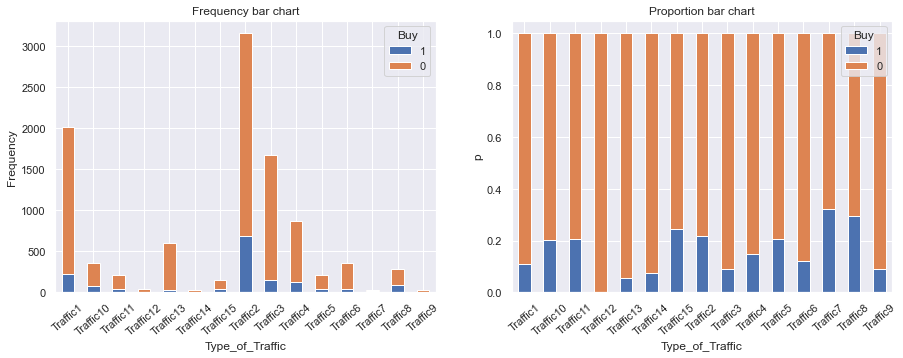

In [441]:
bar_charts_categorical(train, 'Type_of_Traffic', 'Buy', 40)

##### Discriminatory power of 'Type_of_Visitor'

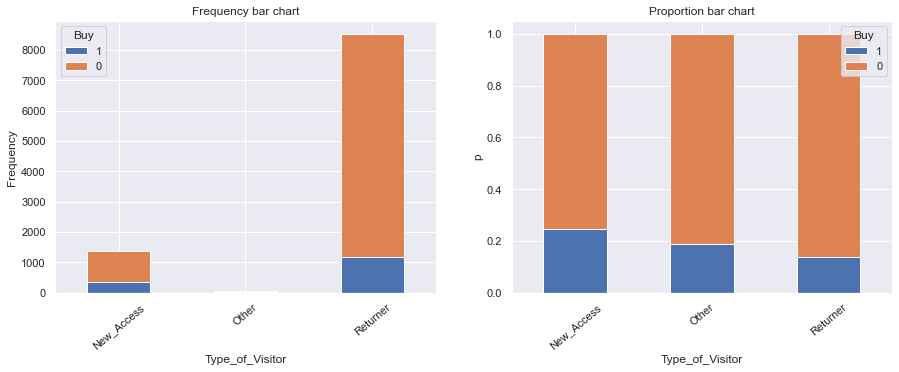

In [442]:
bar_charts_categorical(train, 'Type_of_Visitor', 'Buy', 40)

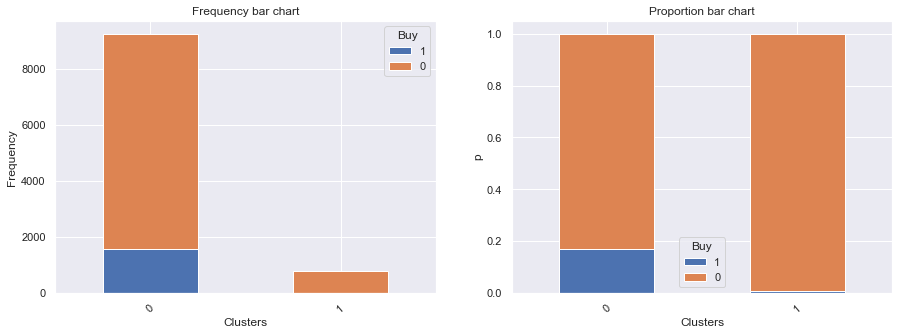

In [443]:
bar_charts_categorical(train, 'Clusters', 'Buy', 40)

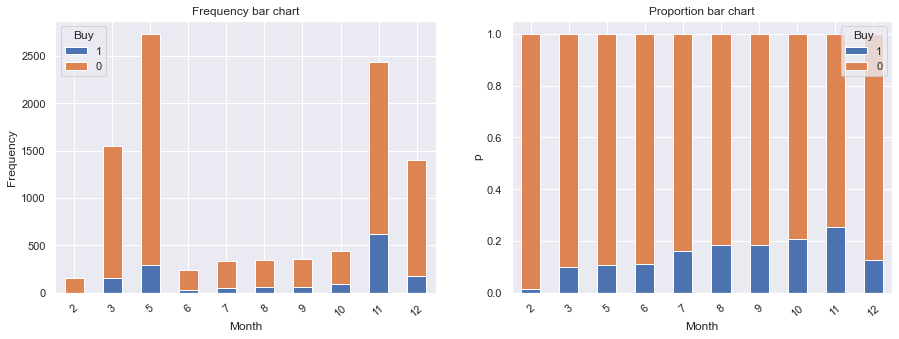

In [444]:
bar_charts_categorical(train, 'Month', 'Buy', 40)

### Discriminatory power of metric features over the target

In [445]:
#we create a copy so we can discretize in intervals the metric features
train_copy=train.copy()
#we are interested in the min and the max of each metric feature distribution to set the parameters
train_copy[['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']].describe().T

count         mean          std  min       25%  \
AccountMng_Pages            9999.0     2.324232     3.340676  0.0    0.0000   
AccountMng_Duration         9999.0    81.205854   179.715545  0.0    0.0000   
FAQ_Pages                   9999.0     0.508051     1.279390  0.0    0.0000   
FAQ_Duration                9999.0    34.559101   139.796989  0.0    0.0000   
Product_Pages               9999.0    31.685869    44.550277  0.0    7.0000   
Product_Duration            9999.0  1199.769430  1958.276304  0.0  183.5625   
GoogleAnalytics_BounceRate  9999.0     0.022305     0.048776  0.0    0.0000   
GoogleAnalytics_ExitRate    9999.0     0.043181     0.048845  0.0    0.0143   
GoogleAnalytics_PageValue   9999.0     5.963120    18.753626  0.0    0.0000   

                                 50%         75%         max  
AccountMng_Pages              1.0000     4.00000     27.0000  
AccountMng_Duration           7.5000    92.20835   3398.7500  
FAQ_Pages                     0.0000     0.00000     24.0000  
FAQ_Duration                  0.0000     0.00000   2549.3750  
Product_Pages                18.0000    38.00000    705.0000  
Product_Duration            599.0000  1470.27080  63973.5222  
GoogleAnalytics_BounceRate    0.0032     0.01680      0.2000  
GoogleAnalytics_ExitRate      0.0251     0.05000      0.2000  
GoogleAnalytics_PageValue     0.0000     0.00000    361.7637

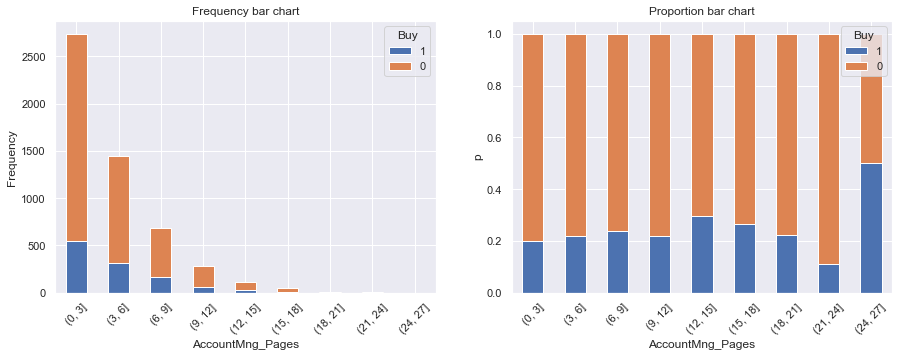

In [446]:
bins=[0,3,6,9,12,15,18,21,24,27]
train_copy['AccountMng_Pages']=pd.cut(train_copy['AccountMng_Pages'],bins=bins)
bar_charts_categorical(train_copy, 'AccountMng_Pages', 'Buy', 45)

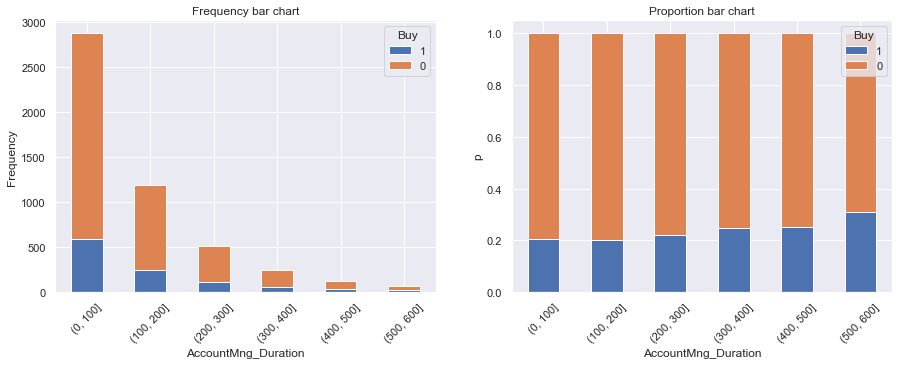

In [447]:
bins=[0,100,200,300,400,500,600]
train_copy['AccountMng_Duration']=pd.cut(train_copy['AccountMng_Duration'],bins=bins)
bar_charts_categorical(train_copy, 'AccountMng_Duration', 'Buy', 45)

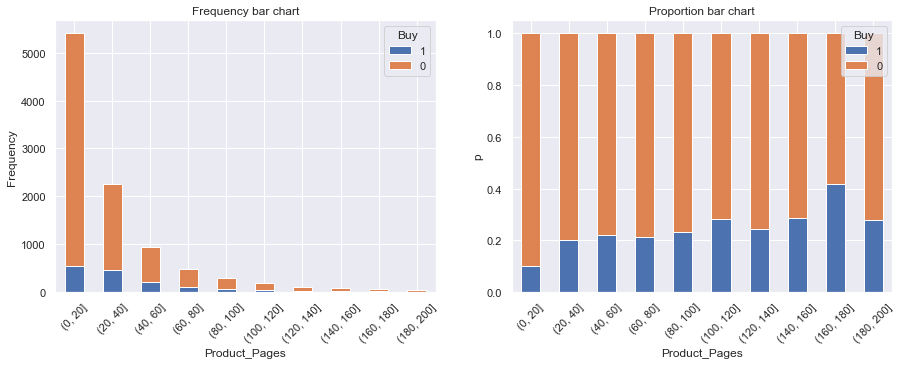

In [448]:
bins=[0,20,40,60,80,100,120,140,160,180,200]
train_copy['Product_Pages']=pd.cut(train_copy['Product_Pages'],bins=bins)
bar_charts_categorical(train_copy, 'Product_Pages', 'Buy', 45)

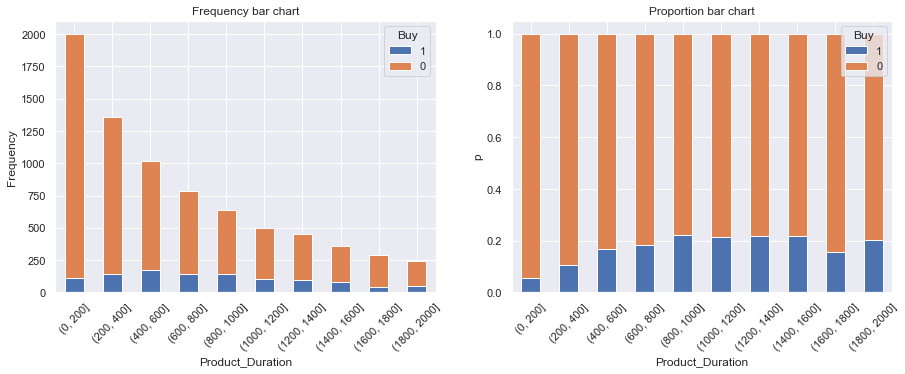

In [449]:
bins=[0,200,400,600,800,1000,1200,1400,1600,1800,2000]
train_copy['Product_Duration']=pd.cut(train_copy['Product_Duration'],bins=bins)
bar_charts_categorical(train_copy, 'Product_Duration', 'Buy', 45)

# Final Insights:

<hr>

### Numerical Data

In [450]:
def true_false_color(val):
    if val == True:
        color = 'background-color: green'
    elif val == False:
        color = 'background-color: red'
    else:
        color = ''
    return color

num_data=pd.concat([features_selected_correlation,
                    selected_features_rfe,
                    feature_selected_Lasso,
                    feature_selected_Ridge,
                    feature_selected_XGboost], axis=1)
num_data.columns = ['Corr', 'RFE', 'Lasso_reg', 'Ridge_reg', 'XGboost']
num_data
num_data.style.applymap(true_false_color)


In [451]:
#For log-transformed features
num_data=pd.concat([features_selected_log_correlation,
                    selected_features_log_rfe,
                    feature_selected_log_Lasso,
                    feature_selected_log_Ridge,
                    feature_selected_log_XGboost], axis=1)
num_data.columns = ['Corr', 'RFE', 'Lasso_reg', 'Ridge_reg', 'XGboost']
num_data
num_data.style.applymap(true_false_color)

<hr>

### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | <font color='green'>Keep</font> |  
| Browser | <font color='green'>Keep</font> | 
| Country |<font color='red'>Discard</font>| 
| Type_of_Traffic | <font color='green'>Keep</font> | 
| Type_of_Visitor | <font color='green'>Keep</font> |
| Clusters | <font color='green'>Keep</font> |

<hr>

**Insight**: At this point we simply establish the features that are important for the majority of the models and we put them in the next **final filter**.

**Note**: Correlation was set manually, in case of changes it should be in the correlation section

**Here we join the data with the target**

In [452]:
all_data_scaled_selected = pd.concat([all_data_scaled_encoded, train['Clusters'],  all_target], axis = 1)
all_data_log_scaled_selected = pd.concat([all_data_log_scaled_encoded, train_log['Clusters'],  all_target_log], axis = 1)

#val_scaled_selected = pd.concat([X_val_scaled_encoded, y_val], axis = 1)

### CHOOSE THE FEATURES THAT ARE IMPORTANT HERE BELOW

In [453]:
# define the non important features
non_important_features = [] #['AccountMng_Duration','FAQ_Duration','Product_Pages']
important_features = all_data_scaled_selected.columns.drop(non_important_features).to_list()
train_scaled_selected= all_data_scaled_selected[important_features]

The following is in case of log-transformed df

In [454]:
#define the non important features also for train_log
non_important_log_features = [] #['log(FAQ_Duration)','log(AccountMng_Duration)','log(Product_Duration)']
important_log_features = all_data_log_scaled_selected.columns.drop(non_important_log_features).to_list()
train_log_scaled_selected= all_data_log_scaled_selected[important_log_features]

## Export train_set

In [455]:
final_train = train_scaled_selected
final_train_log = train_log_scaled_selected

In [456]:
#export
final_train.to_csv('train_preprocessed.csv', index=False)
final_train_log.to_csv('train_log_preprocessed.csv', index=False)

In [457]:
final_train.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Month',
       'PageValue_Month', 'OS_Chrome OS', 'OS_Fedora', 'OS_MacOSX', 'OS_Other',
       'OS_Ubuntu', 'OS_Windows', 'OS_iOS', 'Type_of_Visitor_New_Access',
       'Type_of_Visitor_Returner', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic11', 'Type_of_Traffic_Traffic12',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic14',
       'Type_of_Traffic_Traffic15', 'Type_of_Traffic_Traffic2',
       'Type_of_Traffic_Traffic3', 'Type_of_Traffic_Traffic4',
       'Type_of_Traffic_Traffic5', 'Type_of_Traffic_Traffic6',
       'Type_of_Traffic_Traffic7', 'Type_of_Traffic_Traffic8',
       'Type_of_Traffic_Traffic9', 'Browser_Browser10', 'Browser_Browser11',
       'Browser_Browser12', 'Browser_Browser13', 'Browser_Browser2',
       'Browser_Browser3', 

### TO DO!
- Are there other variables that can be built?
- Can we relate the information from each record regarding the Type of Visitor ('New_access', 'Returner, 'Other') to the specific person surfing in the website?

**Next steps/considerations (added by Elsa)**: 
- Remove highly correlated features. Example, `Total_Pages_Visited` and `Total_Duration` carry almost the same information as the combinations used.
- Interpret results of Ridge and XGBoost techniques
- Check other Feature Selection techniques like PCA, Decision Trees
- Check other scaling/normalization methods (such as RobustScaler and StandardScaler)
- Further clean the notebook

**Note**: In Ali's notebook, feature scaling and feature selection is done in the encoded data (or after the categorical variables have been encoded). Discuss best approach moving forward. 

## Preprocessing of the Test Set 
    - the idea here is to do the exact same preprocessing steps to the test set as we did for the trainig set so the models would work well

- check for NaNs in the test set
    - the test set also does not contain any Nans

#### <font color='red'>TODO</font> 
- create a test_wo_outliers

In [503]:
test = pd.read_csv('test.csv')

In [504]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   2300 non-null   int64  
 1   Date                        2300 non-null   object 
 2   AccountMng_Pages            2300 non-null   int64  
 3   AccountMng_Duration         2300 non-null   float64
 4   FAQ_Pages                   2300 non-null   int64  
 5   FAQ_Duration                2300 non-null   float64
 6   Product_Pages               2300 non-null   int64  
 7   Product_Duration            2300 non-null   float64
 8   GoogleAnalytics_BounceRate  2300 non-null   float64
 9   GoogleAnalytics_ExitRate    2300 non-null   float64
 10  GoogleAnalytics_PageValue   2300 non-null   float64
 11  OS                          2300 non-null   object 
 12  Browser                     2300 non-null   int64  
 13  Country                     2300 

In [505]:
# replace "" by nans - in case there are empty strings
test.replace("", np.nan, inplace = True)

# print the number of NaNs for each attribute
test.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
dtype: int64

In [506]:
test['Browser'].value_counts()

2     1457
1      468
4      138
5      104
6       35
10      33
3       24
8       21
13       8
7        7
11       2
12       2
9        1
Name: Browser, dtype: int64

**note**: in test set there is one record with browser 9. In train set there were no browser 9. Is this a problem?

In [507]:
# 1. correct wrong data types
# map of the variable 'Browser' from integer value i to string 'Browser-i'
TypeBrowser = { i: 'Browser' + str(i) for i in range(test['Browser'].max()+1) }
TypeBrowser
test.replace({'Browser': TypeBrowser}, inplace = True)
# map of the variable 'Type_of_Traffic' from integer value i to string 'Traffic-i'
TrafficCategory = {
    i: 'Traffic' + str(i) for i in range(test['Type_of_Traffic'].max()+1)
}
test.replace({'Type_of_Traffic': TrafficCategory}, inplace = True)
# convert Date from object to Datetime
test['Date'] = pd.to_datetime(test['Date'])


# 2. build the new features
test['Total_Pages_Visited'] = test['AccountMng_Pages'] + test['FAQ_Pages'] + test['Product_Pages']
test['Total_Duration'] = test['AccountMng_Duration'] + test['FAQ_Duration'] + test['Product_Duration']
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
#test['Weekend'] = np.where(test['Date'].dt.dayofweek >= 5,1,0)

#BUILD UP CLUSTER VARIABLE

# scale the test dataset prior to creating clusters

# create dataframe with scaled metric features
test_clusters_scaled = pd.DataFrame(scaler_clusters.transform(test[metric_features]),columns=test[metric_features].columns).set_index(test[metric_features].index)
km_labels = km_clusters.predict(test_clusters_scaled)
km_labels
# add clusters to train
test['Clusters'] = km_clusters.predict(test_clusters_scaled)
#add other features
test['PageValue_Month']=test['GoogleAnalytics_PageValue']/test['Month']

In [508]:
test_log=test.copy() #train or train_filtered?

In [509]:
test_log.drop("Access_ID", axis=1).describe().T

count         mean          std  min         25%  \
AccountMng_Pages            2300.0     2.290000     3.252300  0.0    0.000000   
AccountMng_Duration         2300.0    79.780933   164.447609  0.0    0.000000   
FAQ_Pages                   2300.0     0.486522     1.234311  0.0    0.000000   
FAQ_Duration                2300.0    34.266832   145.500683  0.0    0.000000   
Product_Pages               2300.0    31.928696    44.150226  0.0    8.000000   
Product_Duration            2300.0  1172.039254  1702.730695  0.0  186.875000   
GoogleAnalytics_BounceRate  2300.0     0.021702     0.047214  0.0    0.000000   
GoogleAnalytics_ExitRate    2300.0     0.042565     0.047539  0.0    0.014275   
GoogleAnalytics_PageValue   2300.0     5.588465    17.781708  0.0    0.000000   
Total_Pages_Visited         2300.0    34.705217    46.111577  1.0    9.000000   
Total_Duration              2300.0  1286.087019  1805.986018  0.0  220.958325   
Month                       2300.0     7.627826     3.363534  2.0    5.000000   
Day                         2300.0    15.881739     8.761939  1.0    8.000000   
Clusters                    2300.0     0.073478     0.260977  0.0    0.000000   
PageValue_Month             2300.0     0.847425     2.814153  0.0    0.000000   

                                 50%          75%         max  
AccountMng_Pages              1.0000     4.000000     23.0000  
AccountMng_Duration           8.5500    97.850000   2720.5000  
FAQ_Pages                     0.0000     0.000000     12.0000  
FAQ_Duration                  0.0000     0.000000   2252.0333  
Product_Pages                18.0000    38.000000    534.0000  
Product_Duration            598.6893  1439.535275  18504.1262  
GoogleAnalytics_BounceRate    0.0029     0.016750      0.2000  
GoogleAnalytics_ExitRate      0.0252     0.050000      0.2000  
GoogleAnalytics_PageValue     0.0000     0.000000    258.5499  
Total_Pages_Visited          20.0000    42.000000    543.0000  
Total_Duration              680.6250  1611.858325  18948.4109  
Month                         7.0000    11.000000     12.0000  
Day                          16.0000    23.000000     31.0000  
Clusters                      0.0000     0.000000      1.0000  
PageValue_Month               0.0000     0.000000     36.3920

In [510]:
test_log[['log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)','log(Product_Duration)','log(GoogleAnalytics_BounceRate)', 'log(GoogleAnalytics_ExitRate)', 'log(GoogleAnalytics_PageValue)']]= np.log(test_log[['AccountMng_Pages','AccountMng_Duration','FAQ_Pages', 'FAQ_Duration', 'Product_Pages','Product_Duration','GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']])

In [511]:
test_log.drop("Access_ID", axis=1).describe().T

count         mean          std  min  \
AccountMng_Pages                 2300.0     2.290000     3.252300  0.0   
AccountMng_Duration              2300.0    79.780933   164.447609  0.0   
FAQ_Pages                        2300.0     0.486522     1.234311  0.0   
FAQ_Duration                     2300.0    34.266832   145.500683  0.0   
Product_Pages                    2300.0    31.928696    44.150226  0.0   
Product_Duration                 2300.0  1172.039254  1702.730695  0.0   
GoogleAnalytics_BounceRate       2300.0     0.021702     0.047214  0.0   
GoogleAnalytics_ExitRate         2300.0     0.042565     0.047539  0.0   
GoogleAnalytics_PageValue        2300.0     5.588465    17.781708  0.0   
Total_Pages_Visited              2300.0    34.705217    46.111577  1.0   
Total_Duration                   2300.0  1286.087019  1805.986018  0.0   
Month                            2300.0     7.627826     3.363534  2.0   
Day                              2300.0    15.881739     8.761939  1.0   
Clusters                         2300.0     0.073478     0.260977  0.0   
PageValue_Month                  2300.0     0.847425     2.814153  0.0   
log(AccountMng_Pages)            2300.0         -inf          NaN -inf   
log(AccountMng_Duration)         2300.0         -inf          NaN -inf   
log(FAQ_Pages)                   2300.0         -inf          NaN -inf   
log(FAQ_Duration)                2300.0         -inf          NaN -inf   
log(Product_Pages)               2300.0         -inf          NaN -inf   
log(Product_Duration)            2300.0         -inf          NaN -inf   
log(GoogleAnalytics_BounceRate)  2300.0         -inf          NaN -inf   
log(GoogleAnalytics_ExitRate)    2300.0         -inf          NaN -inf   
log(GoogleAnalytics_PageValue)   2300.0         -inf          NaN -inf   

                                        25%         50%          75%  \
AccountMng_Pages                   0.000000    1.000000     4.000000   
AccountMng_Duration                0.000000    8.550000    97.850000   
FAQ_Pages                          0.000000    0.000000     0.000000   
FAQ_Duration                       0.000000    0.000000     0.000000   
Product_Pages                      8.000000   18.000000    38.000000   
Product_Duration                 186.875000  598.689300  1439.535275   
GoogleAnalytics_BounceRate         0.000000    0.002900     0.016750   
GoogleAnalytics_ExitRate           0.014275    0.025200     0.050000   
GoogleAnalytics_PageValue          0.000000    0.000000     0.000000   
Total_Pages_Visited                9.000000   20.000000    42.000000   
Total_Duration                   220.958325  680.625000  1611.858325   
Month                              5.000000    7.000000    11.000000   
Day                                8.000000   16.000000    23.000000   
Clusters                           0.000000    0.000000     0.000000   
PageValue_Month                    0.000000    0.000000     0.000000   
log(AccountMng_Pages)                   NaN    0.000000     1.386294   
log(AccountMng_Duration)                NaN    2.144544     4.583435   
log(FAQ_Pages)                          NaN         NaN          NaN   
log(FAQ_Duration)                       NaN         NaN          NaN   
log(Product_Pages)                 2.079442    2.890372     3.637586   
log(Product_Duration)              5.230439    6.394743     7.272075   
log(GoogleAnalytics_BounceRate)         NaN   -5.843045    -4.089370   
log(GoogleAnalytics_ExitRate)     -4.249250   -3.680919    -2.995732   
log(GoogleAnalytics_PageValue)          NaN         NaN          NaN   

                                          max  
AccountMng_Pages                    23.000000  
AccountMng_Duration               2720.500000  
FAQ_Pages                           12.000000  
FAQ_Duration                      2252.033300  
Product_Pages                      534.000000  
Product_Duration                 18504.126200  
GoogleAnalytics_BounceRate           0.200000 

In [512]:
#the imputation on the nan is the same as the training set

In [513]:
test_log[['log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)','log(Product_Duration)']]=test_log[['log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)','log(Product_Duration)']].replace({-np.inf:-1})

In [514]:
test_log['log(GoogleAnalytics_BounceRate)'].replace({-np.inf:-10},inplace=True)

In [515]:
test_log['log(GoogleAnalytics_ExitRate)'].replace({-np.inf:-9},inplace=True)

In [516]:
test_log['log(GoogleAnalytics_PageValue)'].replace({-np.inf:-4},inplace=True)

In [517]:
test_log.drop("Access_ID", axis=1).describe().T

count         mean          std   min  \
AccountMng_Pages                 2300.0     2.290000     3.252300   0.0   
AccountMng_Duration              2300.0    79.780933   164.447609   0.0   
FAQ_Pages                        2300.0     0.486522     1.234311   0.0   
FAQ_Duration                     2300.0    34.266832   145.500683   0.0   
Product_Pages                    2300.0    31.928696    44.150226   0.0   
Product_Duration                 2300.0  1172.039254  1702.730695   0.0   
GoogleAnalytics_BounceRate       2300.0     0.021702     0.047214   0.0   
GoogleAnalytics_ExitRate         2300.0     0.042565     0.047539   0.0   
GoogleAnalytics_PageValue        2300.0     5.588465    17.781708   0.0   
Total_Pages_Visited              2300.0    34.705217    46.111577   1.0   
Total_Duration                   2300.0  1286.087019  1805.986018   0.0   
Month                            2300.0     7.627826     3.363534   2.0   
Day                              2300.0    15.881739     8.761939   1.0   
Clusters                         2300.0     0.073478     0.260977   0.0   
PageValue_Month                  2300.0     0.847425     2.814153   0.0   
log(AccountMng_Pages)            2300.0     0.152103     1.224443  -1.0   
log(AccountMng_Duration)         2300.0     1.837209     2.842053  -1.0   
log(FAQ_Pages)                   2300.0    -0.658261     0.722770  -1.0   
log(FAQ_Duration)                2300.0    -0.010640     2.148791  -1.0   
log(Product_Pages)               2300.0     2.781889     1.243301  -1.0   
log(Product_Duration)            2300.0     5.921284     2.165857  -1.0   
log(GoogleAnalytics_BounceRate)  2300.0    -6.770812     3.099225 -10.0   
log(GoogleAnalytics_ExitRate)    2300.0    -3.674484     1.102966  -9.0   
log(GoogleAnalytics_PageValue)   2300.0    -2.570006     2.796640  -4.0   

                                        25%         50%          75%  \
AccountMng_Pages                   0.000000    1.000000     4.000000   
AccountMng_Duration                0.000000    8.550000    97.850000   
FAQ_Pages                          0.000000    0.000000     0.000000   
FAQ_Duration                       0.000000    0.000000     0.000000   
Product_Pages                      8.000000   18.000000    38.000000   
Product_Duration                 186.875000  598.689300  1439.535275   
GoogleAnalytics_BounceRate         0.000000    0.002900     0.016750   
GoogleAnalytics_ExitRate           0.014275    0.025200     0.050000   
GoogleAnalytics_PageValue          0.000000    0.000000     0.000000   
Total_Pages_Visited                9.000000   20.000000    42.000000   
Total_Duration                   220.958325  680.625000  1611.858325   
Month                              5.000000    7.000000    11.000000   
Day                                8.000000   16.000000    23.000000   
Clusters                           0.000000    0.000000     0.000000   
PageValue_Month                    0.000000    0.000000     0.000000   
log(AccountMng_Pages)             -1.000000    0.000000     1.386294   
log(AccountMng_Duration)          -1.000000    2.144544     4.583435   
log(FAQ_Pages)                    -1.000000   -1.000000    -1.000000   
log(FAQ_Duration)                 -1.000000   -1.000000    -1.000000   
log(Product_Pages)                 2.079442    2.890372     3.637586   
log(Product_Duration)              5.230439    6.394743     7.272075   
log(GoogleAnalytics_BounceRate)  -10.000000   -5.843045    -4.089370   
log(GoogleAnalytics_ExitRate)     -4.249250   -3.680919    -2.995732   
log(GoogleAnalytics_PageValue)    -4.000000   -4.000000    -4.000000   

                                          max  
AccountMng_Pages                    23.000000  
AccountMng_Duration               2720.500000  
FAQ_Pages                           12.000000  
FAQ_Duration                      2252.033300  
Product_Pages                      534.000000  
Product_Duration                 18504.126200  
GoogleAnalytics_Bounc

In [518]:
log_metric_features = test_log.columns.drop(categorical_features).to_list()

In [519]:
cols=['AccountMng_Pages','AccountMng_Duration','FAQ_Pages', 'FAQ_Duration', 'Product_Pages','Product_Duration','GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']
test_log.drop(cols, axis=1, inplace=True)

In [520]:
#we remove tot pages and tot duration from the main one because they will cause redundancy in the correlation
cols_tot=['Total_Pages_Visited','Total_Duration','Day']
test.drop(cols_tot, axis=1, inplace=True)
test_log.drop(cols_tot, axis=1, inplace=True)

In [521]:
# Set Access_ID as the Index (for convenience)
test.set_index('Access_ID', inplace = True)
test_log.set_index('Access_ID', inplace = True)

test_num = test.select_dtypes(include=np.number).set_index(test.index)
test_num = test_num.drop('Clusters', axis = 1) # drop Cluster from test_num as it is technically a categorical feature

test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)
test_cat = test_cat.join(test['Clusters']) # add Cluster to test_cat

test_log_num = test_log.select_dtypes(include=np.number).set_index(test_log.index)
test_log_num = test_log_num.drop('Clusters', axis = 1) # drop Cluster from test_log_num as it is technically a categorical feature

test_log_cat = test_log.select_dtypes(exclude=np.number).set_index(test_log.index)
test_log_cat = test_log_cat.join(test['Clusters'])

# 3. scaling each attribute the same way
# Use the 'MinMaxScaler' set up for the training set 
# to scale the metric features of the test set to features to [-1,1]

test_num_scaled=pd.DataFrame(scaler.transform(test_num),columns=test_num.columns).set_index(test.index)
test_num_scaled.head(3)

test_log_num_scaled=pd.DataFrame(scaler_log.transform(test_log_num),columns=test_log_num.columns).set_index(test_log.index)
test_log_num_scaled.head(3)

#3. scale with 'StandardScaler' as alternative
'''
# scale the test dataset

test_num_scaled=pd.DataFrame(std_scaler.transform(test_num),columns=test_num.columns).set_index(test.index)
test_num_scaled.head(3)
'''
#4. Use 'RobustScaler' to scale the selected features

'''
# scale the test dataset

test_num_scaled=pd.DataFrame(rbt_scaler.transform(test_num),columns=test_num.columns).set_index(test.index)
test_num_scaled.describe()
'''

'\n# scale the test dataset\n\ntest_num_scaled=pd.DataFrame(rbt_scaler.transform(test_num),columns=test_num.columns).set_index(test.index)\ntest_num_scaled.describe()\n'

In [522]:
'''
(in case we want to export the test df before feature selection and OHE)
'''
#test1 = pd.concat([test_num_scaled, test_cat], axis = 1)
#test1.head()
#test1.to_csv('test1.csv')

'\n(in case we want to export the test df before feature selection and OHE)\n'

In [523]:
# 4. one-hot encode categorical features (original)
OHE = OneHotEncoder()
OS_test = pd.DataFrame(OHE.fit_transform(test_cat[['OS']]).toarray(), columns=OHE.get_feature_names(['OS']), index=test_cat.index)
Type_of_Visitor_test = pd.DataFrame(OHE.fit_transform(test_cat[['Type_of_Visitor']]).toarray(), columns=OHE.get_feature_names(['Type_of_Visitor']), index=test_cat.index)
Type_of_Traffic_test = pd.DataFrame(OHE.fit_transform(test_cat[['Type_of_Traffic']]).toarray(), columns=OHE.get_feature_names(['Type_of_Traffic']), index=test_cat.index)
Browser_test = pd.DataFrame(OHE.fit_transform(test_cat[['Browser']]).toarray(), columns=OHE.get_feature_names(['Browser']), index=test_cat.index)

# one-hot encode categorical features (log)
OS_test_log = pd.DataFrame(OHE.fit_transform(test_log_cat[['OS']]).toarray(), columns=OHE.get_feature_names(['OS']), index=test_log_cat.index)
Type_of_Visitor_test_log = pd.DataFrame(OHE.fit_transform(test_log_cat[['Type_of_Visitor']]).toarray(), columns=OHE.get_feature_names(['Type_of_Visitor']), index=test_log_cat.index)
Type_of_Traffic_test_log = pd.DataFrame(OHE.fit_transform(test_log_cat[['Type_of_Traffic']]).toarray(), columns=OHE.get_feature_names(['Type_of_Traffic']), index=test_log_cat.index)
Browser_test_log = pd.DataFrame(OHE.fit_transform(test_log_cat[['Browser']]).toarray(), columns=OHE.get_feature_names(['Browser']), index=test_log_cat.index)

# drop one of each encoded features to avoid introducing multicollinearity to the model (original)
OS_test.drop('OS_Android', axis = 1, inplace = True)
Type_of_Traffic_test.drop('Type_of_Traffic_Traffic1', axis = 1, inplace = True)
Type_of_Visitor_test.drop('Type_of_Visitor_Other', axis = 1, inplace = True)
Browser_test.drop('Browser_Browser1', axis = 1, inplace = True)

# drop one of each encoded features to avoid introducing multicollinearity to the model (log)
OS_test_log.drop('OS_Android', axis = 1, inplace = True)
Type_of_Traffic_test_log.drop('Type_of_Traffic_Traffic1', axis = 1, inplace = True)
Type_of_Visitor_test_log.drop('Type_of_Visitor_Other', axis = 1, inplace = True)
Browser_test_log.drop('Browser_Browser1', axis = 1, inplace = True)

test_scaled_encoded = pd.concat([test_num_scaled, test['Clusters'], OS_test, Type_of_Visitor_test, Type_of_Traffic_test, Browser_test], axis = 1) 
test_log_scaled_encoded = pd.concat([test_log_num_scaled, test_log['Clusters'], OS_test_log, Type_of_Visitor_test_log, Type_of_Traffic_test_log, Browser_test_log], axis = 1)

In [524]:
# 5. feature selection
# the features are selected based on the explanatory analysis of the training set. NOTE: non_important_features is defined above
important_features = test_scaled_encoded.columns.drop(non_important_features).to_list()
test_scaled_selected = test_scaled_encoded[important_features]

important_log_features = test_log_scaled_encoded.columns.drop(non_important_log_features).to_list()
test_log_scaled_selected = test_log_scaled_encoded[important_log_features]

In [525]:
test_scaled_selected.columns, 
#test_log_scaled_selected.columns

(Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
        'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
        'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Month',
        'PageValue_Month', 'Clusters', 'OS_Chrome OS', 'OS_Fedora', 'OS_MacOSX',
        'OS_Other', 'OS_Ubuntu', 'OS_Windows', 'OS_iOS',
        'Type_of_Visitor_New_Access', 'Type_of_Visitor_Returner',
        'Type_of_Traffic_Traffic10', 'Type_of_Traffic_Traffic11',
        'Type_of_Traffic_Traffic12', 'Type_of_Traffic_Traffic13',
        'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15',
        'Type_of_Traffic_Traffic2', 'Type_of_Traffic_Traffic3',
        'Type_of_Traffic_Traffic4', 'Type_of_Traffic_Traffic5',
        'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic7',
        'Type_of_Traffic_Traffic8', 'Type_of_Traffic_Traffic9',
        'Browser_Browser10', 'Browser_Browser11', 'Browser_Browser12',
        'Browser_Browser13', 'Browser_Brow

In [526]:
# check to see if training and test set have the same number of features. Is it an issue?
print(train_scaled_selected.shape)
print(test_scaled_selected.shape)
print(train_log_scaled_selected.shape) ######## fix this!!!
print(test_log_scaled_selected.shape)

(9999, 47)
(2300, 47)
(9999, 47)
(2300, 47)


In [527]:
test_log_scaled_selected.columns

Index(['Month', 'PageValue_Month', 'log(AccountMng_Pages)',
       'log(AccountMng_Duration)', 'log(FAQ_Pages)', 'log(FAQ_Duration)',
       'log(Product_Pages)', 'log(Product_Duration)',
       'log(GoogleAnalytics_BounceRate)', 'log(GoogleAnalytics_ExitRate)',
       'log(GoogleAnalytics_PageValue)', 'Clusters', 'OS_Chrome OS',
       'OS_Fedora', 'OS_MacOSX', 'OS_Other', 'OS_Ubuntu', 'OS_Windows',
       'OS_iOS', 'Type_of_Visitor_New_Access', 'Type_of_Visitor_Returner',
       'Type_of_Traffic_Traffic10', 'Type_of_Traffic_Traffic11',
       'Type_of_Traffic_Traffic12', 'Type_of_Traffic_Traffic13',
       'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15',
       'Type_of_Traffic_Traffic2', 'Type_of_Traffic_Traffic3',
       'Type_of_Traffic_Traffic4', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic7',
       'Type_of_Traffic_Traffic8', 'Type_of_Traffic_Traffic9',
       'Browser_Browser10', 'Browser_Browser11', 'Browser_Browser12',
    

## Export test_set

In [528]:
#final_test
test_scaled_selected.to_csv('test_preprocessed.csv')#, index=False) #WE MAY NEED THE ACCESS ID TO CREATE THE SUBMISSION FILE!!
test_log_scaled_selected.to_csv('test_log_preprocessed.csv')

**Final note**: The model selection (how to split the df, use cross validation or other methods) should be done at the beginning of the Modeling Jupyter notebook

## Import

In [54]:
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import time
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

## Import data preprocessed

In [55]:
train_preprocessed = pd.read_csv('train_log_preprocessed.csv')

In [56]:
train_data=train_preprocessed.drop('Buy', axis=1)
train_target=train_preprocessed['Buy']

In [57]:
test_preprocessed = pd.read_csv (r'test_log_preprocessed.csv')

In [58]:
train_preprocessed.columns

Index(['Month', 'PageValue_Month', 'log(AccountMng_Pages)',
       'log(AccountMng_Duration)', 'log(FAQ_Pages)', 'log(FAQ_Duration)',
       'log(Product_Pages)', 'log(Product_Duration)',
       'log(GoogleAnalytics_BounceRate)', 'log(GoogleAnalytics_ExitRate)',
       'log(GoogleAnalytics_PageValue)', 'OS_Chrome OS', 'OS_Fedora',
       'OS_MacOSX', 'OS_Other', 'OS_Ubuntu', 'OS_Windows', 'OS_iOS',
       'Type_of_Visitor_New_Access', 'Type_of_Visitor_Returner',
       'Type_of_Traffic_Traffic10', 'Type_of_Traffic_Traffic11',
       'Type_of_Traffic_Traffic12', 'Type_of_Traffic_Traffic13',
       'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15',
       'Type_of_Traffic_Traffic2', 'Type_of_Traffic_Traffic3',
       'Type_of_Traffic_Traffic4', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic7',
       'Type_of_Traffic_Traffic8', 'Type_of_Traffic_Traffic9',
       'Browser_Browser10', 'Browser_Browser11', 'Browser_Browser12',
       'Browser_

In [6]:
#train_preprocessed['PageValue_Month']=train_preprocessed['log(GoogleAnalytics_PageValue)']/train_preprocessed['Month']
#train_preprocessed['PageValue_AccountMng_Pages']=train_preprocessed['log(GoogleAnalytics_PageValue)']/train_preprocessed['log(AccountMng_Pages)']

In [59]:
'''
feat_corr=['Month', 'log(AccountMng_Pages)', 'log(AccountMng_Duration)',
       'log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)',
       'log(Product_Duration)', 'log(GoogleAnalytics_BounceRate)',
       'log(GoogleAnalytics_ExitRate)', 'log(GoogleAnalytics_PageValue)','Clusters','PageValue_Month','PageValue_AccountMng_Pages','Buy']
'''

"\nfeat_corr=['Month', 'log(AccountMng_Pages)', 'log(AccountMng_Duration)',\n       'log(FAQ_Pages)', 'log(FAQ_Duration)', 'log(Product_Pages)',\n       'log(Product_Duration)', 'log(GoogleAnalytics_BounceRate)',\n       'log(GoogleAnalytics_ExitRate)', 'log(GoogleAnalytics_PageValue)','Clusters','PageValue_Month','PageValue_AccountMng_Pages','Buy']\n"

In [60]:
#train_preprocessed.fillna(0, inplace=True)
#train_preprocessed.isna().sum()

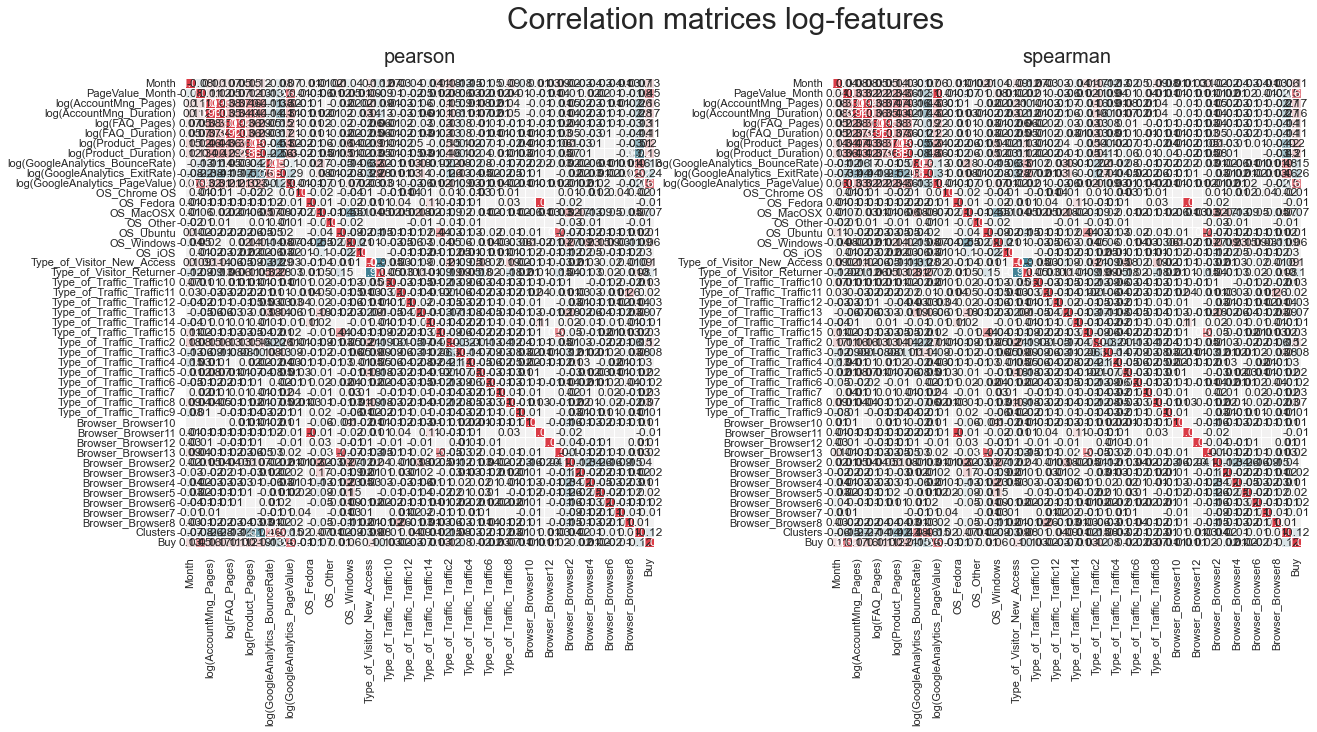

In [61]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each heatmap will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

methods=['pearson','spearman']
# Plot data
# Iterate across axes objects and associate each histogram
for ax, met in zip(axes.flatten(), methods):
    corr_log_matrix = train_preprocessed.corr(method=met)
    corr_rounded = np.round(corr_log_matrix, decimals=2)
    # Build annotation matrix (values above |limit| will appear annotated in the plot)
    limit=0.001
    mask_annot = np.absolute(corr_rounded.values) >= limit
    annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,''))
    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5,ax=ax, cbar=False)
    ax.set_title(met, fontsize=20, y=1.02)
    
# Layout
# set the spacing between subplots
plt.subplots_adjust(wspace = 0.38)
# Add a centered title to the figure:
title = "Correlation matrices log-features"
fig.subplots_adjust(top=0.95)
plt.suptitle(title, fontsize=30, y=0.75)

plt.show();

In [62]:
'''
sns.set()

# Setting pairplot
sns.pairplot(train_preprocessed[feat_corr], diag_kind = "hist")

# Layout
plt.subplots_adjust(top = 0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize = 20)

plt.show();
'''

'\nsns.set()\n\n# Setting pairplot\nsns.pairplot(train_preprocessed[feat_corr], diag_kind = "hist")\n\n# Layout\nplt.subplots_adjust(top = 0.95)\nplt.suptitle("Pairwise Relationship of Numerical Variables", fontsize = 20)\n\nplt.show();\n'

### PCA

In [63]:
df_pca = train_data.copy()

In [64]:
#move me above
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca)
pca_feat 

array([[-2.29169723e+00,  4.21386839e-01,  2.87263237e-01, ...,
         2.38404585e-04, -1.99789273e-03,  1.12044443e-16],
       [-1.33094136e+00, -1.61859441e-01, -1.40543908e-01, ...,
         5.53552295e-04,  1.69140157e-05, -1.54567676e-17],
       [-1.92150084e+00, -4.30891761e-01, -2.31135830e-01, ...,
        -4.92071178e-04, -2.59986407e-04,  1.90048484e-16],
       ...,
       [-1.40278277e+00, -1.43533218e-01, -3.85204840e-02, ...,
         1.66023857e-03, -3.68249385e-04, -4.14016749e-18],
       [-1.03079655e+00, -9.46032184e-02, -2.92476875e-01, ...,
         1.32482005e-03,  2.89312202e-04,  2.08411208e-18],
       [-3.36012395e-01,  4.82283747e-01,  3.96687739e-01, ...,
         4.21017911e-04, -4.87719932e-04, -1.74664645e-19]])

In [65]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference    Proportion  Cumulative
1   4.071208e+00    0.000000  3.196754e-01    0.319675
2   1.729412e+00   -2.341796  1.357952e-01    0.455471
3   1.329480e+00   -0.399932  1.043921e-01    0.559863
4   1.090111e+00   -0.239369  8.559663e-02    0.645459
5   1.051441e+00   -0.038670  8.256023e-02    0.728020
6   9.517032e-01   -0.099738  7.472871e-02    0.802748
7   3.593124e-01   -0.592391  2.821357e-02    0.830962
8   3.032531e-01   -0.056059  2.381174e-02    0.854774
9   2.932219e-01   -0.010031  2.302408e-02    0.877798
10  2.758282e-01   -0.017394  2.165831e-02    0.899456
11  2.147977e-01   -0.061031  1.686613e-02    0.916322
12  1.731199e-01   -0.041678  1.359355e-02    0.929916
13  1.265731e-01   -0.046547  9.938649e-03    0.939854
14  1.122817e-01   -0.014291  8.816474e-03    0.948671
15  7.535502e-02   -0.036927  5.916953e-03    0.954588
16  7.354208e-02   -0.001813  5.774600e-03    0.960362
17  6.888741e-02   -0.004655  5.409110e-03    0.965771
18  6.094130e-02   -0.007946  4.785173e-03    0.970557
19  4.830156e-02   -0.012640  3.792688e-03    0.974349
20  4.345039e-02   -0.004851  3.411769e-03    0.977761
21  3.503482e-02   -0.008416  2.750970e-03    0.980512
22  3.184126e-02   -0.003194  2.500208e-03    0.983012
23  2.974482e-02   -0.002096  2.335593e-03    0.985348
24  2.534070e-02   -0.004404  1.989778e-03    0.987338
25  2.288826e-02   -0.002452  1.797210e-03    0.989135
26  2.144160e-02   -0.001447  1.683616e-03    0.990818
27  2.041871e-02   -0.001023  1.603298e-03    0.992422
28  1.939413e-02   -0.001025  1.522847e-03    0.993945
29  1.330884e-02   -0.006085  1.045024e-03    0.994990
30  1.213932e-02   -0.001170  9.531916e-04    0.995943
31  9.291485e-03   -0.002848  7.295769e-04    0.996672
32  8.843827e-03   -0.000448  6.944263e-04    0.997367
33  6.416436e-03   -0.002427  5.038251e-04    0.997871
34  5.101112e-03   -0.001315  4.005445e-04    0.998271
35  4.256651e-03   -0.000844  3.342366e-04    0.998605
36  3.280631e-03   -0.000976  2.575985e-04    0.998863
37  3.021899e-03   -0.000259  2.372826e-04    0.999100
38  2.972145e-03   -0.000050  2.333759e-04    0.999334
39  2.639562e-03   -0.000333  2.072611e-04    0.999541
40  1.598868e-03   -0.001041  1.255448e-04    0.999666
41  1.389099e-03   -0.000210  1.090735e-04    0.999776
42  1.004597e-03   -0.000385  7.888196e-05    0.999854
43  7.690083e-04   -0.000236  6.038332e-05    0.999915
44  5.868511e-04   -0.000182  4.608015e-05    0.999961
45  4.977768e-04   -0.000089  3.908594e-05    1.000000
46  2.871941e-32   -0.000498  2.255077e-33    1.000000

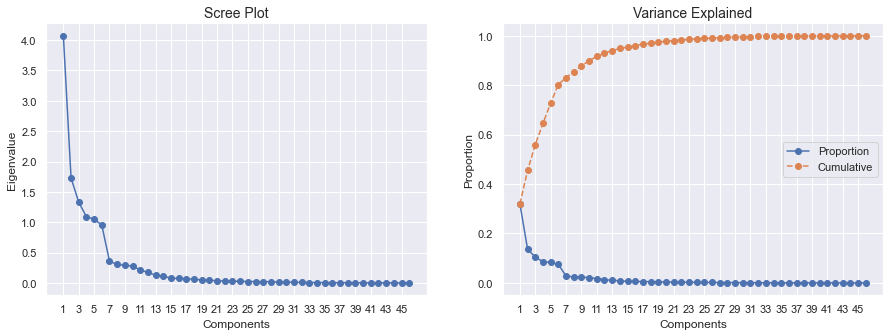

In [66]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [67]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=20)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.291697  0.421387  0.287263 -0.080550  1.493181 -0.353275 -0.070575   
1    -1.330941 -0.161859 -0.140544 -1.083292 -0.440486 -1.234237 -0.253848   
2    -1.921501 -0.430892 -0.231136 -0.487054 -1.168853  0.848692 -0.200934   
3    -0.066939  1.749245  1.363213 -1.031823 -0.808444  1.689473 -1.055406   
4     2.124358 -0.803475  0.924777 -2.654797  0.892580  1.821146 -0.652235   
...        ...       ...       ...       ...       ...       ...       ...   
9994  2.235936 -1.255926 -0.471057  0.074365  2.043456 -0.100742  0.516491   
9995 -0.062163  0.931571 -0.556858  2.472678  1.391176  0.613198  0.063151   
9996 -1.402783 -0.143533 -0.038520 -0.994318 -0.062522 -1.667548  0.477202   
9997 -1.030797 -0.094603 -0.292477 -1.314501 -0.603900 -1.469077 -0.156501   
9998 -0.336012  0.482284  0.396688 -1.332666 -1.699210  0.333307 -0.690217   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.547816  0.805682 -0.984010 -0.174021 -0.084223 -0.110458 -0.039943   
1     0.432345 -0.293124 -0.122513  0.026836  0.165816 -0.227060  0.104721   
2     0.194492 -0.217286  0.861290  0.301282 -0.039930 -0.367284  0.225034   
3    -0.538272 -0.305853 -0.537960 -0.463794 -0.344744  0.165777  0.364913   
4    -0.827963 -0.596158 -0.406420  0.908168  0.237852  0.713042  0.140995   
...        ...       ...       ...       ...       ...       ...       ...   
9994 -0.202161  0.666128 -0.767532  0.315330 -0.153595 -0.132283 -0.010983   
9995  0.252440 -0.458786  0.639234  0.246602  0.710863 -0.351746  0.067667   
9996 -0.342281  0.488269 -0.602044  0.048651  0.310555  0.742836 -0.180059   
9997  0.375896 -0.326750  0.050911  0.387614  0.288687  0.720777 -0.216483   
9998 -0.510559 -0.647507 -0.378169  0.101247  0.246175 -0.170240  0.418039   

          PC15      PC16      PC17      PC18      PC19      PC20  
0    -0.104669  0.182976  0.005268 -0.104717 -0.158031  0.036135  
1    -0.002339  0.034549 -0.263210 -0.065254 -0.457536 -0.010797  
2    -0.291045  0.558579  0.365443 -0.126913 -0.056486 -0.438147  
3     0.074587 -0.070244  0.038772 -0.057433  0.047266  0.016678  
4    -0.446107 -0.346931  0.084044  0.061747  0.074475  0.029610  
...        ...       ...       ...       ...       ...       ...  
9994 -0.141843  0.238198 -0.018456  0.233529 -0.162221  0.037025  
9995 -0.083551  0.218517 -0.121543 -0.256639 -0.004558  0.237603  
9996 -0.054062  0.065730  0.235063  0.007368 -0.088259  0.036000  
9997  0.059520 -0.115092  0.062543  0.093443 -0.043475 -0.006471  
9998  0.056999 -0.054372 -0.121624 -0.061066 -0.100054 -0.020501  

[9999 rows x 20 columns]

In [68]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

Month  PageValue_Month  log(AccountMng_Pages)  log(AccountMng_Duration)  \
0 -1.366575        -0.287776              -0.947128                 -1.001158   
1 -0.777671        -0.287776              -0.947128                 -1.001158   
2  1.283493        -0.287776              -0.947128                 -1.001158   
3  1.283493         0.844754              -0.947128                 -1.001158   
4  0.989041         0.076362              -0.947128                 -1.001158   

   log(FAQ_Pages)  log(FAQ_Duration)  log(Product_Pages)  \
0       -0.484469          -0.477609           -1.323508   
1       -0.484469          -0.477609            0.288509   
2       -0.484469          -0.477609           -0.547266   
3       -0.484469          -0.477609           -0.454051   
4        1.805288           2.688832            0.643082   

   log(Product_Duration)  log(GoogleAnalytics_BounceRate)  \
0              -0.779322                        -1.055689   
1               0.279314                         0.934702   
2              -0.602871                         0.980372   
3               0.226922                        -1.055689   
4               0.661376                        -1.055689   

   log(GoogleAnalytics_ExitRate)  ...      PC11      PC12      PC13      PC14  \
0                       0.874936  ... -0.174021 -0.084223 -0.110458 -0.039943   
1                       0.512437  ...  0.026836  0.165816 -0.227060  0.104721   
2                       0.751648  ...  0.301282 -0.039930 -0.367284  0.225034   
3                      -0.023901  ... -0.463794 -0.344744  0.165777  0.364913   
4                      -0.929637  ...  0.908168  0.237852  0.713042  0.140995   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.104669  0.182976  0.005268 -0.104717 -0.158031  0.036135  
1 -0.002339  0.034549 -0.263210 -0.065254 -0.457536 -0.010797  
2 -0.291045  0.558579  0.365443 -0.126913 -0.056486 -0.438147  
3  0.074587 -0.070244  0.038772 -0.057433  0.047266  0.016678  
4 -0.446107 -0.346931  0.084044  0.061747  0.074475  0.029610  

[5 rows x 66 columns]

In [69]:
df_pca.columns[:45]

Index(['Month', 'PageValue_Month', 'log(AccountMng_Pages)',
       'log(AccountMng_Duration)', 'log(FAQ_Pages)', 'log(FAQ_Duration)',
       'log(Product_Pages)', 'log(Product_Duration)',
       'log(GoogleAnalytics_BounceRate)', 'log(GoogleAnalytics_ExitRate)',
       'log(GoogleAnalytics_PageValue)', 'OS_Chrome OS', 'OS_Fedora',
       'OS_MacOSX', 'OS_Other', 'OS_Ubuntu', 'OS_Windows', 'OS_iOS',
       'Type_of_Visitor_New_Access', 'Type_of_Visitor_Returner',
       'Type_of_Traffic_Traffic10', 'Type_of_Traffic_Traffic11',
       'Type_of_Traffic_Traffic12', 'Type_of_Traffic_Traffic13',
       'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15',
       'Type_of_Traffic_Traffic2', 'Type_of_Traffic_Traffic3',
       'Type_of_Traffic_Traffic4', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic7',
       'Type_of_Traffic_Traffic8', 'Type_of_Traffic_Traffic9',
       'Browser_Browser10', 'Browser_Browser11', 'Browser_Browser12',
       'Browser_

In [70]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[df_pca.columns[:45].tolist() + pca_feat_names].corr().loc[df_pca.columns[:45].tolist(), pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [71]:
train_PCA= pd.concat([pca_df, train_target], axis=1)

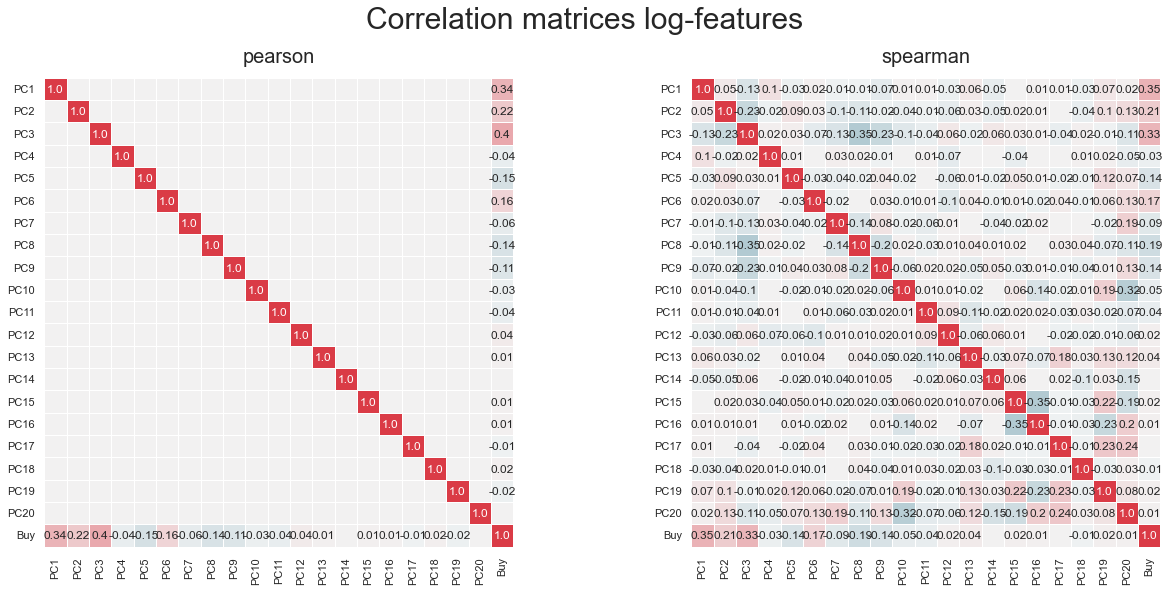

In [72]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each heatmap will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

methods=['pearson','spearman']
# Plot data
# Iterate across axes objects and associate each histogram
for ax, met in zip(axes.flatten(), methods):
    corr_log_matrix = train_PCA.corr(method=met)
    corr_rounded = np.round(corr_log_matrix, decimals=2)
    # Build annotation matrix (values above |limit| will appear annotated in the plot)
    limit=0.001
    mask_annot = np.absolute(corr_rounded.values) >= limit
    annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,''))
    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5,ax=ax, cbar=False)
    ax.set_title(met, fontsize=20, y=1.02)
    
# Layout
# set the spacing between subplots
plt.subplots_adjust(wspace = 0.38)
# Add a centered title to the figure:
title = "Correlation matrices log-features"
fig.subplots_adjust(top=0.95)
plt.suptitle(title, fontsize=30, y=0.75)

plt.show();

Using PCA doesn't really make sense, since we even if we have most of the variance in the first principal components we don't consider the correlation with the target variable

In [73]:
train_data.describe().T

count      mean       std       min  \
Month                            9999.0  0.001409  1.000652 -1.661028   
PageValue_Month                  9999.0 -0.005587  0.966285 -0.287776   
log(AccountMng_Pages)            9999.0 -0.007150  0.998581 -0.947128   
log(AccountMng_Duration)         9999.0 -0.009224  0.998554 -1.001158   
log(FAQ_Pages)                   9999.0 -0.005291  0.996380 -0.484469   
log(FAQ_Duration)                9999.0 -0.002366  0.999819 -0.477609   
log(Product_Pages)               9999.0 -0.007336  1.003673 -2.984379   
log(Product_Duration)            9999.0 -0.006232  1.004455 -3.083891   
log(GoogleAnalytics_BounceRate)  9999.0 -0.005193  0.999980 -1.055689   
log(GoogleAnalytics_ExitRate)    9999.0  0.000886  0.998639 -4.888560   
log(GoogleAnalytics_PageValue)   9999.0 -0.000253  0.997874 -0.524600   
OS_Chrome OS                     9999.0  0.001500  0.038705  0.000000   
OS_Fedora                        9999.0  0.000300  0.017320  0.000000   
OS_MacOSX                        9999.0  0.206521  0.404829  0.000000   
OS_Other                         9999.0  0.000500  0.022357  0.000000   
OS_Ubuntu                        9999.0  0.006801  0.082189  0.000000   
OS_Windows                       9999.0  0.536154  0.498716  0.000000   
OS_iOS                           9999.0  0.037804  0.190731  0.000000   
Type_of_Visitor_New_Access       9999.0  0.139114  0.346083  0.000000   
Type_of_Visitor_Returner         9999.0  0.853485  0.353639  0.000000   
Type_of_Traffic_Traffic10        9999.0  0.035504  0.185058  0.000000   
Type_of_Traffic_Traffic11        9999.0  0.020502  0.141717  0.000000   
Type_of_Traffic_Traffic12        9999.0  0.004400  0.066193  0.000000   
Type_of_Traffic_Traffic13        9999.0  0.059506  0.236581  0.000000   
Type_of_Traffic_Traffic14        9999.0  0.002700  0.051897  0.000000   
Type_of_Traffic_Traffic15        9999.0  0.015602  0.123934  0.000000   
Type_of_Traffic_Traffic2         9999.0  0.315032  0.464552  0.000000   
Type_of_Traffic_Traffic3         9999.0  0.167617  0.373544  0.000000   
Type_of_Traffic_Traffic4         9999.0  0.087009  0.281862  0.000000   
Type_of_Traffic_Traffic5         9999.0  0.021002  0.143398  0.000000   
Type_of_Traffic_Traffic6         9999.0  0.035404  0.184807  0.000000   
Type_of_Traffic_Traffic7         9999.0  0.003100  0.055597  0.000000   
Type_of_Traffic_Traffic8         9999.0  0.028403  0.166129  0.000000   
Type_of_Traffic_Traffic9         9999.0  0.003400  0.058216  0.000000   
Browser_Browser10                9999.0  0.013001  0.113285  0.000000   
Browser_Browser11                9999.0  0.000300  0.017320  0.000000   
Browser_Browser12                9999.0  0.000800  0.028276  0.000000   
Browser_Browser13                9999.0  0.005201  0.071930  0.000000   
Browser_Browser2                 9999.0  0.648465  0.477474  0.000000   
Browser_Browser3                 9999.0  0.008101  0.089644  0.000000   
Browser_Browser4                 9999.0  0.059706  0.236953  0.000000   
Browser_Browser5                 9999.0  0.036204  0.186806  0.000000   
Browser_Browser6                 9999.0  0.013801  0.116672  0.000000   
Browser_Browser7                 9999.0  0.004100  0.063906  0.000000   
Browser_Browser8                 9999.0  0.011301  0.105710  0.000000   
Clusters                         9999.0  0.076008  0.265024  0.000000   

                                      25%       50%       75%        max  
Month                           -0.777671 -0.188767  0.989041   1.283493  
PageValue_Month                 -0.287776 -0.287776 -0.287776  27.635766  
log(AccountMng_Pages)           -0.947128 -0.134867  0.991166   2.542212  
log(AccountMng_Duration)        -1.001158  0.062316  0.947391   2.219760  
log(FAQ_Pages)                  -0.484469 -0.484469 -0.484469   5.165795  
log(FAQ_Duration)               -0.477609 -0.477609 -0.477609   3.548183  
log(Product_Pages)              -0.652944  0.094516  0.685872   2.997285  
lo

# Feature Selection

## Filter methods of feature importance

### XGBoost

C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.06459961 0.11197065 0.02814849 0.01976714 0.01678709 0.01681246
 0.02000026 0.02122941 0.03284522 0.02132082 0.16194652 0.01935474
 0.         0.01297171 0.         0.00797989 0.01403245 0.01591573
 0.01433663 0.06111081 0.02079371 0.01446513 0.         0.02615731
 0.         0.00798199 0.02018741 0.01510815 0.02439563 0.0315298
 0.03214077 0.00661495 0.02893263 0.         0.01249894 0.
 0.         0.         0.01480042 0.00370112 0.02092746 0.01366385
 0.01871717 0.00955244 0.00900699 0.00769457]


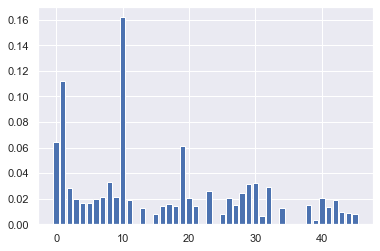

In [128]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data, train_target)

# Check feature importance
print(model.feature_importances_)

# Inspect result with a plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [23]:
#we store the feature importance of XGBoost and the corresponding name in the columns
dfimportance = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(train_data.columns)

In [129]:
feature_importance_XGB = pd.concat([dfcolumns, dfimportance], axis=1)

In [130]:
feature_importance_XGB.columns = ['Features' , 'Score']
feature_importance_XGB.sort_values('Score', ascending=False, inplace=True)

In [131]:
# create function to plot the importance of the features
def important_feature_selector(df_feature_score, number_features):
    return df_feature_score.sort_values(by=df_feature_score.columns[1], ascending=False).head(number_features)[df_feature_score.columns[0]].values

[11:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


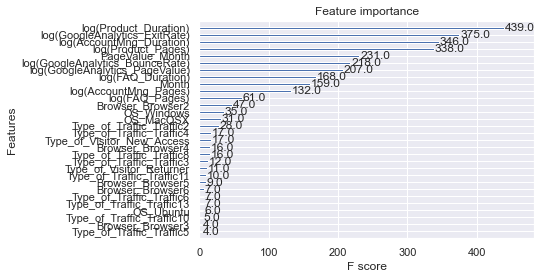

In [132]:
# featureImportance = pd.DataFrame(model.feature_importances_, index = train_data.columns, columns=['Importance'])
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data, train_target)

# Inspect result with a plot

plot_importance(model, max_num_features = 30)
plt.show()

### Random forest Classifier

Feature: 0 Month, Score: 0.04079
Feature: 1 PageValue_Month, Score: 0.17734
Feature: 2 log(AccountMng_Pages), Score: 0.04451
Feature: 3 log(AccountMng_Duration), Score: 0.05642
Feature: 4 log(FAQ_Pages), Score: 0.01792
Feature: 5 log(FAQ_Duration), Score: 0.02693
Feature: 6 log(Product_Pages), Score: 0.07259
Feature: 7 log(Product_Duration), Score: 0.08372
Feature: 8 log(GoogleAnalytics_BounceRate), Score: 0.05473
Feature: 9 log(GoogleAnalytics_ExitRate), Score: 0.08044
Feature: 10 log(GoogleAnalytics_PageValue), Score: 0.23973
Feature: 11 OS_Chrome OS, Score: 0.00048
Feature: 12 OS_Fedora, Score: 0.00001
Feature: 13 OS_MacOSX, Score: 0.00754
Feature: 14 OS_Other, Score: 0.00024
Feature: 15 OS_Ubuntu, Score: 0.00083
Feature: 16 OS_Windows, Score: 0.00955
Feature: 17 OS_iOS, Score: 0.00324
Feature: 18 Type_of_Visitor_New_Access, Score: 0.00700
Feature: 19 Type_of_Visitor_Returner, Score: 0.00679
Feature: 20 Type_of_Traffic_Traffic10, Score: 0.00402
Feature: 21 Type_of_Traffic_Traffic11,

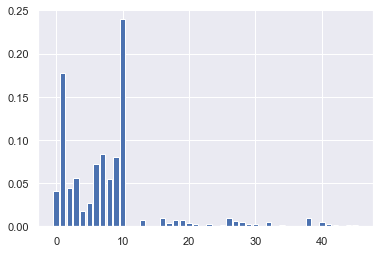

In [138]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train_data, train_target)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d %s, Score: %.5f' % (i,train_data.columns.to_list()[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Wrapper methods

### Sequential Features Selection

In [28]:
len(train_data.columns)

46

In [96]:
!pip install mlxtend

In [29]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

***Best features logistic regression***

In [34]:
lreg = LogisticRegression()    #LinearRegression()
sfs_LR = sfs(estimator=lreg, k_features=30, forward=True, verbose=2, scoring='f1') #'neg_mean_squared_error'

In [395]:
sfs_LR = sfs_LR.fit(train_data, train_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    2.6s finished

[2021-12-22 23:14:39] Features: 1/30 -- score: 0.6426346188864652[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.5s finished

[2021-12-22 23:14:43] Features: 2/30 -- score: 0.6471776241346948[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    5.8s finished

[2021-12-22 23:14:49] Features: 3/30 -- score: 0.6503709391623835[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.3s finished

[2021-12-22 23:18:15] Features: 27/30 -- score: 0.6468994999569896[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [156]:
#pd.DataFrame.from_dict(sfs_LR.get_metric_dict()).T

In [396]:
feat_names_lreg = list(sfs_LR.k_feature_names_)
print(feat_names_lreg)

['log(AccountMng_Pages)', 'log(AccountMng_Duration)', 'log(FAQ_Pages)', 'log(Product_Pages)', 'log(Product_Duration)', 'log(GoogleAnalytics_PageValue)', 'OS_Chrome OS', 'OS_Fedora', 'OS_Other', 'OS_Ubuntu', 'OS_iOS', 'Type_of_Traffic_Traffic11', 'Type_of_Traffic_Traffic12', 'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15', 'Type_of_Traffic_Traffic5', 'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic7', 'Type_of_Traffic_Traffic9', 'Browser_Browser10', 'Browser_Browser11', 'Browser_Browser12', 'Browser_Browser13', 'Browser_Browser2', 'Browser_Browser3', 'Browser_Browser4', 'Browser_Browser5', 'Browser_Browser6', 'Browser_Browser7', 'Browser_Browser8']


***Best features Random Forest***

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
sfs_RF = sfs(rfc, k_features=25, forward=True, verbose=2, scoring='f1') #f1_micro

In [112]:
sfs_RF = sfs_RF.fit(train_data, train_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished

[2021-12-22 15:22:07] Features: 1/25 -- score: 0.5468779155292014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  1.9min finished

[2021-12-22 15:24:00] Features: 2/25 -- score: 0.583485179499128[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  2.7min finished

[2021-12-22 15:26:42] Features: 3/25 -- score: 0.5940592998911927[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [113]:
feat_names_rfc = list(sfs_RF.k_feature_names_)
print(feat_names_rfc)

['Month', 'log(Product_Pages)', 'log(Product_Duration)', 'log(GoogleAnalytics_ExitRate)', 'log(GoogleAnalytics_PageValue)', 'OS_Chrome OS', 'OS_Fedora', 'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic14', 'Type_of_Traffic_Traffic15', 'Browser_Browser12', 'Browser_Browser2', 'Browser_Browser4', 'Browser_Browser8', 'Clusters']


### Recusive Feature Elimination

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [31]:
from sklearn.feature_selection import RFE

In [139]:
'''
#For this specific method we split the data into train and val in order to evaluate the best number of features. 
def recursive_feature_elimination(train_data, train_target, model):
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    #no of features
    nof_list=np.arange(1,len(train_data.columns)+1)
    print(nof_list)
    high_score=0
    #Variable to store the optimum features
    nof=0           
    score_list =[]
    
    for n in nof_list:
        print(n)
        rfe = RFE(model,n_features_to_select=n,verbose=2)
        score_nth_iteration_list=[]
        for train_index,test_index in kf.split(train_data,train_target):
            #print('{} of KFold {}'.format(i,kf.n_splits))
            x_train,x_val = train_data.loc[train_index],train_data.loc[test_index]
            y_train,y_val = train_target.loc[train_index],train_target.loc[test_index]
            
            X_train_rfe = rfe.fit_transform(x_train, y_train)
            X_val_rfe = rfe.transform(x_val)
            model.fit(X_train_rfe,y_train)

            score = model.score(X_val_rfe, y_val)
            score_nth_iteration_list.append(score)
        avg_score=statistics.mean(score_nth_iteration_list)
    
        score_nth_iteration_list.append(avg_score)     
        if(score>high_score):
            high_score = score
            nof = nof_list[n]
    print('Optimum number of features: %d' %nof)
    print('Score with %d features: %f' % (nof, high_score))
'''

"\n#For this specific method we split the data into train and val in order to evaluate the best number of features. \ndef recursive_feature_elimination(train_data, train_target, model):\n    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)\n    #no of features\n    nof_list=np.arange(1,len(train_data.columns)+1)\n    print(nof_list)\n    high_score=0\n    #Variable to store the optimum features\n    nof=0           \n    score_list =[]\n    \n    for n in nof_list:\n        print(n)\n        rfe = RFE(model,n_features_to_select=n,verbose=2)\n        score_nth_iteration_list=[]\n        for train_index,test_index in kf.split(train_data,train_target):\n            #print('{} of KFold {}'.format(i,kf.n_splits))\n            x_train,x_val = train_data.loc[train_index],train_data.loc[test_index]\n            y_train,y_val = train_target.loc[train_index],train_target.loc[test_index]\n            \n            X_train_rfe = rfe.fit_transform(x_train, y_train)\n            X_val_rf

In [140]:
#recursive_feature_elimination(train_data,train_target,lreg)

***RFE with LogisticRegression***

Fitting estimator with 46 features.
Fitting estimator with 45 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 44 features.
Fitting estimator with 43 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 42 features.
Fitting estimator with 41 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 40 features.
Fitting estimator with 39 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 38 features.
Fitting estimator with 37 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 36 features.
Fitting estimator with 35 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 34 features.
Fitting estimator with 33 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 32 features.
Fitting estimator with 31 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 30 features.
Fitting estimator with 29 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 28 features.
Fitting estimator with 27 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 46 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 45 features.
Fitting estimator with 44 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 43 features.
Fitting estimator with 42 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 41 features.
Fitting estimator with 40 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 39 features.
Fitting estimator with 38 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 37 features.
Fitting estimator with 36 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 35 features.
Fitting estimator with 34 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 33 features.
Fitting estimator with 32 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 31 features.
Fitting estimator with 30 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 29 features.
Fitting estimator with 28 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 44 features.
Fitting estimator with 43 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 42 features.
Fitting estimator with 41 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 40 features.
Fitting estimator with 39 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 38 features.
Fitting estimator with 37 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 36 features.
Fitting estimator with 35 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 34 features.
Fitting estimator with 33 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 32 features.
Fitting estimator with 31 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 30 features.
Fitting estimator with 29 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 28 features.
Fitting estimator with 27 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 46 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 45 features.
Fitting estimator with 44 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 43 features.
Fitting estimator with 42 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 41 features.
Fitting estimator with 40 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 39 features.
Fitting estimator with 38 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 37 features.
Fitting estimator with 36 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 30 features.
Fitting estimator with 29 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 46 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 45 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 44 features.
Fitting estimator with 43 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 42 features.
Fitting estimator with 41 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 37 features.
Fitting estimator with 36 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 35 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 34 features.
Fitting estimator with 33 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 32 features.
Fitting estimator with 31 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 44 features.
Fitting estimator with 43 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 42 features.
Fitting estimator with 41 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 40 features.
Fitting estimator with 39 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 38 features.
Fitting estimator with 37 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 36 features.
Fitting estimator with 35 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 34 features.
Fitting estimator with 33 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 32 features.
Fitting estimator with 31 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 30 features.
Fitting estimator with 29 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Optimal number of features : 2


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


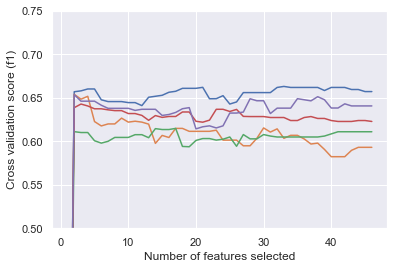

In [74]:
lreg = LogisticRegression()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=lreg,
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1",
    min_features_to_select=min_features_to_select,
    verbose=2
)
rfecv.fit(train_data, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
ax = plt.gca()
ax.set_ylim([0.5, 0.75])
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

In [75]:
pd.Series(rfecv.support_, index = train_data.columns)

Month                              False
PageValue_Month                    False
log(AccountMng_Pages)              False
log(AccountMng_Duration)           False
log(FAQ_Pages)                     False
log(FAQ_Duration)                  False
log(Product_Pages)                 False
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)    False
log(GoogleAnalytics_ExitRate)      False
log(GoogleAnalytics_PageValue)      True
OS_Chrome OS                       False
OS_Fedora                          False
OS_MacOSX                          False
OS_Other                           False
OS_Ubuntu                          False
OS_Windows                         False
OS_iOS                             False
Type_of_Visitor_New_Access         False
Type_of_Visitor_Returner           False
Type_of_Traffic_Traffic10          False
Type_of_Traffic_Traffic11          False
Type_of_Traffic_Traffic12          False
Type_of_Traffic_Traffic13          False
Type_of_Traffic_

***RFE with RandomForest Classifier***

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Optimal number of features : 15


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


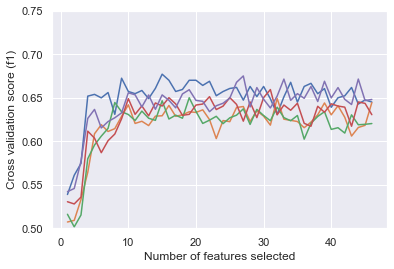

In [45]:
rfc = RandomForestClassifier()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1",
    min_features_to_select=min_features_to_select,
    verbose=2
)
rfecv.fit(train_data, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
ax = plt.gca()
ax.set_ylim([0.5, 0.75])
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

In [49]:
pd.Series(rfecv.support_, index = train_data.columns)

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)            True
log(FAQ_Pages)                      True
log(FAQ_Duration)                   True
log(Product_Pages)                  True
log(Product_Duration)               True
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)       True
log(GoogleAnalytics_PageValue)      True
OS_Chrome OS                       False
OS_Fedora                          False
OS_MacOSX                          False
OS_Other                           False
OS_Ubuntu                          False
OS_Windows                          True
OS_iOS                             False
Type_of_Visitor_New_Access         False
Type_of_Visitor_Returner            True
Type_of_Traffic_Traffic10          False
Type_of_Traffic_Traffic11          False
Type_of_Traffic_Traffic12          False
Type_of_Traffic_Traffic13          False
Type_of_Traffic_

***RFE with SupportVectorClassification***

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 fe

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Optimal number of features : 11


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


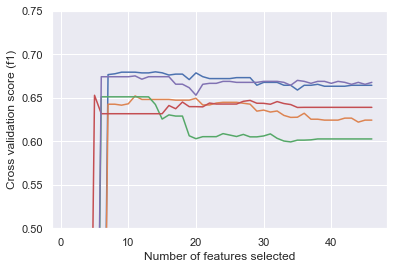

In [120]:
svc = SVC(kernel="linear")

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1",
    min_features_to_select=min_features_to_select,
    verbose=2
)
rfecv.fit(train_data, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
ax = plt.gca()
ax.set_ylim([0.5, 0.75])
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

In [121]:
pd.Series(rfecv.support_, index = train_data.columns)

Month                              False
PageValue_Month                    False
log(AccountMng_Pages)              False
log(AccountMng_Duration)           False
log(FAQ_Pages)                     False
log(FAQ_Duration)                  False
log(Product_Pages)                 False
log(Product_Duration)              False
log(GoogleAnalytics_BounceRate)    False
log(GoogleAnalytics_ExitRate)      False
log(GoogleAnalytics_PageValue)      True
OS_Chrome OS                        True
OS_Fedora                          False
OS_MacOSX                          False
OS_Other                           False
OS_Ubuntu                          False
OS_Windows                         False
OS_iOS                             False
Type_of_Visitor_New_Access         False
Type_of_Visitor_Returner           False
Type_of_Traffic_Traffic10          False
Type_of_Traffic_Traffic11           True
Type_of_Traffic_Traffic12           True
Type_of_Traffic_Traffic13           True
Type_of_Traffic_

Fitting estimator with 46 features.
[13:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 45 features.
[13:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 29 features.
[13:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 28 features.
[13:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 27 features.
[13:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 26 features.
[13:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 25 features.
[13:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 24 features.
[13:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 23 features.
[13:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 22 features.
[13:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 21 features.
[13:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 20 features.
[13:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 19 features.
[13:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 18 features.
[13:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 17 features.
[13:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 16 features.
[13:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 15 features.
[13:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 14 features.
[13:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 13 features.
[13:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 12 features.
[13:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 11 features.
[13:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 10 features.
[13:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 9 features.
[13:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 8 features.
[13:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 7 features.
[13:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 6 features.
[13:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 5 features.
[13:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 4 features.
[13:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 3 features.
[13:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 2 features.
[13:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 46 features.
[13:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 45 features.
[13:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 29 features.
[13:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 28 features.
[13:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 27 features.
[13:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 26 features.
[13:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 25 features.
[13:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 24 features.
[13:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 23 features.
[13:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 22 features.
[13:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 21 features.
[13:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 20 features.
[13:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 19 features.
[13:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 18 features.
[13:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 17 features.
[13:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 16 features.
[13:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 15 features.
[13:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 14 features.
[13:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 13 features.
[13:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 12 features.
[13:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 11 features.
[13:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 10 features.
[13:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 9 features.
[13:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 8 features.
[13:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 7 features.
[13:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 6 features.
[13:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 5 features.
[13:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 4 features.
[13:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 3 features.
[13:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 2 features.
[13:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 46 features.
[13:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 45 features.
[13:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 29 features.
[13:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 28 features.
[13:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 27 features.
[13:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 26 features.
[13:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 25 features.
[13:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 24 features.
[13:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 23 features.
[13:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 22 features.
[13:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 21 features.
[13:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 20 features.
[13:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 19 features.
[13:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 18 features.
[13:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 17 features.
[13:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 16 features.
[13:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 15 features.
[13:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 14 features.
[13:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 13 features.
[13:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 12 features.
[13:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 11 features.
[13:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 10 features.
[13:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 9 features.
[13:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 8 features.
[13:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 7 features.
[13:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 6 features.
[13:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 5 features.
[13:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 4 features.
[13:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 3 features.
[13:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 2 features.
[13:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 46 features.
[13:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 45 features.
[13:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 29 features.
[13:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 28 features.
[13:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 27 features.
[13:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 26 features.
[13:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 25 features.
[13:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 24 features.
[13:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 23 features.
[13:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 22 features.
[13:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 21 features.
[13:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 20 features.
[13:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 19 features.
[13:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 18 features.
[13:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 17 features.
[13:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 16 features.
[13:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 15 features.
[13:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 14 features.
[13:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 13 features.
[13:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 12 features.
[13:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 11 features.
[13:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 10 features.
[13:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 9 features.
[13:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 8 features.
[13:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 7 features.
[13:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 6 features.
[13:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 5 features.
[13:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 4 features.
[13:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 3 features.
[13:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 2 features.
[13:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 46 features.
[13:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 45 features.
[13:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 29 features.
[13:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 28 features.
[13:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 27 features.
[13:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 26 features.
[13:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 25 features.
[13:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 24 features.
[13:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 23 features.
[13:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 22 features.
[13:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 21 features.
[13:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 20 features.
[13:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 19 features.
[13:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 18 features.
[13:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 17 features.
[13:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 16 features.
[13:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 15 features.
[13:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 14 features.
[13:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 13 features.
[13:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 12 features.
[13:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 11 features.
[13:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 10 features.
[13:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 9 features.
[13:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 8 features.
[13:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 7 features.
[13:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 6 features.
[13:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 5 features.
[13:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 4 features.
[13:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 3 features.
[13:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 2 features.
[13:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[13:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 46 features.
[13:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 45 features.
[13:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 44 features.
[13:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 43 features.
[13:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 42 features.
[13:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 41 features.
[13:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 40 features.
[13:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 39 features.
[13:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 38 features.
[13:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 37 features.
[13:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 36 features.
[13:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 35 features.
[13:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 34 features.
[13:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 33 features.
[13:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 32 features.
[13:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 31 features.
[13:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting estimator with 30 features.
[13:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Optimal number of features : 29


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


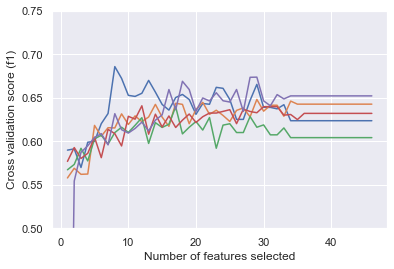

In [168]:
xgb = XGBClassifier()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=xgb,
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1",
    min_features_to_select=min_features_to_select,
    verbose=2
)
rfecv.fit(train_data, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
ax = plt.gca()
ax.set_ylim([0.5, 0.75])
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

In [261]:
pd.Series(rfecv.support_, index = train_data.columns)

Month                               True
PageValue_Month                     True
log(AccountMng_Pages)               True
log(AccountMng_Duration)            True
log(FAQ_Pages)                      True
log(FAQ_Duration)                   True
log(Product_Pages)                  True
log(Product_Duration)               True
log(GoogleAnalytics_BounceRate)     True
log(GoogleAnalytics_ExitRate)       True
log(GoogleAnalytics_PageValue)      True
OS_Chrome OS                        True
OS_Fedora                          False
OS_MacOSX                           True
OS_Other                           False
OS_Ubuntu                          False
OS_Windows                          True
OS_iOS                             False
Type_of_Visitor_New_Access          True
Type_of_Visitor_Returner            True
Type_of_Traffic_Traffic10           True
Type_of_Traffic_Traffic11           True
Type_of_Traffic_Traffic12          False
Type_of_Traffic_Traffic13           True
Type_of_Traffic_

### Check Selected Features Performance using :  RandomForest & Logistic Regression

In [397]:
from sklearn.model_selection import cross_val_score ,StratifiedKFold

In [79]:
def score_calculator(train_data, train_target, model, list_of_features, max_number_features):
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    all_cv_valid_score=[]
    number_of_features=[]
    for j in range(1,max_number_features+1):
        #i=1
        print()
        train_data_tmp = train_data[list_of_features[:j]] #pick all the features up to j
        print("Top", len(train_data_tmp.columns)," Features from ",model,"\n", train_data_tmp.columns)
        print()
        cv_Train_score=[]
        cv_Valid_score=[]
        for train_index,test_index in kf.split(train_data_tmp,train_target):
            x_train,x_val = train_data_tmp.loc[train_index],train_data_tmp.loc[test_index]
            y_train,y_val = train_target.loc[train_index],train_target.loc[test_index]
            model.fit(x_train,y_train)
            Train_score = f1_score(y_train,model.predict(x_train),average="binary") 
            Valid_score = f1_score(y_val,model.predict(x_val),average="binary") 
            cv_Train_score.append(Train_score)
            cv_Valid_score.append(Valid_score)
            avg_score_train=statistics.mean(cv_Train_score)
            avg_score_valid=statistics.mean(cv_Valid_score)
            #i+=1
        print("")
        print("Mean folds scores of the model on train with ", len(train_data_tmp.columns)," Features" , avg_score_train)
        print("Mean folds scores of the model on validation with ", len(train_data_tmp.columns)," Features" , avg_score_valid)
        print("#"*25);print();
        all_cv_valid_score.append(avg_score_valid)
        number_of_features.append(j)
    #final summary
    print('features combinations with the largest score: \n')
    result = pd.DataFrame({ 'n_feat': number_of_features, 'valid_f1_score': all_cv_valid_score }).nlargest(10, 'valid_f1_score').set_index('n_feat')
    return result

In [81]:
#let's calculate the score for the lreg classifier
score_calculator(train_data,train_target,lreg, feature_importance_XGB['Features'], 25) #features from xgboost are: featureScore['Features']


Top 1  Features from  LogisticRegression() 
 Index(['log(GoogleAnalytics_PageValue)'], dtype='object')


Mean folds scores of the model on train with  1  Features 0.6428218572455675
Mean folds scores of the model on validation with  1  Features 0.6429781901231911
#########################


Top 2  Features from  LogisticRegression() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month'], dtype='object')


Mean folds scores of the model on train with  2  Features 0.6336622328767286
Mean folds scores of the model on validation with  2  Features 0.6318023897702527
#########################


Top 3  Features from  LogisticRegression() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month'], dtype='object')


Mean folds scores of the model on train with  3  Features 0.6200040881795795
Mean folds scores of the model on validation with  3  Features 0.6173721345426701
#########################


Top 4  Features from  LogisticRegression() 
 Index(['log(GoogleAnalytics_Pag


Mean folds scores of the model on train with  17  Features 0.6311118286642621
Mean folds scores of the model on validation with  17  Features 0.6283343122015682
#########################


Top 18  Features from  LogisticRegression() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)'],
      dtype='object')


Mean folds scores of the model on train with  18  Features 0.63226433495101
Mean folds scores of the model on validation with  18  Features 0.6262424026227493
#########################


Top 19  Featu

valid_f1_score
n_feat                
1             0.642978
2             0.631802
20            0.629511
17            0.628334
21            0.628161
25            0.627431
12            0.626999
24            0.626788
19            0.626683
23            0.626327

In [82]:
#let's calculate the score for the rf classifier
score_calculator(train_data,train_target,rfc,feature_importance_XGB['Features'],25)


Top 1  Features from  RandomForestClassifier() 
 Index(['log(GoogleAnalytics_PageValue)'], dtype='object')


Mean folds scores of the model on train with  1  Features 0.889397376747507
Mean folds scores of the model on validation with  1  Features 0.5441451067130153
#########################


Top 2  Features from  RandomForestClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month'], dtype='object')


Mean folds scores of the model on train with  2  Features 0.8916573705047762
Mean folds scores of the model on validation with  2  Features 0.5609702130385165
#########################


Top 3  Features from  RandomForestClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month'], dtype='object')


Mean folds scores of the model on train with  3  Features 0.8917562856249104
Mean folds scores of the model on validation with  3  Features 0.5496142791259109
#########################


Top 4  Features from  RandomForestClassifier() 
 Index(['log(Goog


Mean folds scores of the model on train with  17  Features 0.9995970666085464
Mean folds scores of the model on validation with  17  Features 0.6489786856250954
#########################


Top 18  Features from  RandomForestClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)'],
      dtype='object')


Mean folds scores of the model on train with  18  Features 0.9996776792385724
Mean folds scores of the model on validation with  18  Features 0.6408486732894101
#########################


Top 19 

valid_f1_score
n_feat                
13            0.653057
14            0.651581
15            0.650681
17            0.648979
24            0.645310
20            0.644722
23            0.644518
19            0.644118
21            0.642943
25            0.642310

In [127]:
#let's calculate the score for the svc classifier
svc = SVC(kernel="linear")
score_calculator(train_data,train_target,svc,feature_importance_XGB['Features'],25)


Top 1  Features from  SVC(kernel='linear') 
 Index(['log(GoogleAnalytics_PageValue)'], dtype='object')


Mean folds scores of the model on train with  1  Features 0.6629702718843326
Mean folds scores of the model on validation with  1  Features 0.663078941167051
#########################


Top 2  Features from  SVC(kernel='linear') 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month'], dtype='object')


Mean folds scores of the model on train with  2  Features 0.6630041744346508
Mean folds scores of the model on validation with  2  Features 0.6616394305900419
#########################


Top 3  Features from  SVC(kernel='linear') 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month'], dtype='object')


Mean folds scores of the model on train with  3  Features 0.6463548063874398
Mean folds scores of the model on validation with  3  Features 0.6391808813283084
#########################


Top 4  Features from  SVC(kernel='linear') 
 Index(['log(GoogleAnalytics_Page


Mean folds scores of the model on train with  17  Features 0.6491142545319527
Mean folds scores of the model on validation with  17  Features 0.6416309631019358
#########################


Top 18  Features from  SVC(kernel='linear') 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)'],
      dtype='object')


Mean folds scores of the model on train with  18  Features 0.6503682819366915
Mean folds scores of the model on validation with  18  Features 0.6407090365362207
#########################


Top 19  Fea

valid_f1_score
n_feat                
1             0.663079
2             0.661639
21            0.644444
12            0.643810
15            0.642697
14            0.642687
16            0.642310
23            0.642272
11            0.642163
17            0.641631

In [133]:
mlp = MLPClassifier()
score_calculator(train_data,train_target,mlp,feature_importance_XGB['Features'],25)


Top 1  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)'], dtype='object')


Mean folds scores of the model on train with  1  Features 0.6373385360628783
Mean folds scores of the model on validation with  1  Features 0.6340514097347597
#########################


Top 2  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month'], dtype='object')


Mean folds scores of the model on train with  2  Features 0.6188807104751001
Mean folds scores of the model on validation with  2  Features 0.6166681209947703
#########################


Top 3  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month'], dtype='object')


Mean folds scores of the model on train with  3  Features 0.6532092634697549
Mean folds scores of the model on validation with  3  Features 0.6475722573634778
#########################


Top 4  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  5  Features 0.6511899189146682
Mean folds scores of the model on validation with  5  Features 0.6408663074797287
#########################


Top 6  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  6  Features 0.6540535906333282
Mean folds scores of the model on validation with  6  Features 0.6366604065729233
#########################


Top 7  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  7  Features 0.6617211853775937
Mean folds scores of the model on validation with  7  Features 0.650160916028089
#########################


Top 8  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  8  Features 0.6576278948595403
Mean folds scores of the model on validation with  8  Features 0.63768295433668
#########################


Top 9  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  9  Features 0.6693666768591525
Mean folds scores of the model on validation with  9  Features 0.6436417962576142
#########################


Top 10  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  10  Features 0.6739778956044934
Mean folds scores of the model on validation with  10  Features 0.638066154082382
#########################


Top 11  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  11  Features 0.6814184511833808
Mean folds scores of the model on validation with  11  Features 0.6467975179273328
#########################


Top 12  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  12  Features 0.6751080419774353
Mean folds scores of the model on validation with  12  Features 0.6340467110060336
#########################


Top 13  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  13  Features 0.6947557692922334
Mean folds scores of the model on validation with  13  Features 0.64705416254119
#########################


Top 14  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  14  Features 0.7002108248755613
Mean folds scores of the model on validation with  14  Features 0.6388331934480205
#########################


Top 15  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  15  Features 0.7070772834683423
Mean folds scores of the model on validation with  15  Features 0.6513886389396163
#########################


Top 16  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  16  Features 0.7188838356318629
Mean folds scores of the model on validation with  16  Features 0.6525153964509637
#########################


Top 17  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  17  Features 0.7160367876588738
Mean folds scores of the model on validation with  17  Features 0.6541035716685205
#########################


Top 18  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  18  Features 0.7254437791411755
Mean folds scores of the model on validation with  18  Features 0.651778293946424
#########################


Top 19  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  19  Features 0.7250311082174505
Mean folds scores of the model on validation with  19  Features 0.6490923013923666
#########################


Top 20  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  20  Features 0.7244718533587952
Mean folds scores of the model on validation with  20  Features 0.6520615059949159
#########################


Top 21  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6',
       'log(FAQ_Duration)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  21  Features 0.726854262567757
Mean folds scores of the model on validation with  21  Features 0.6411479388747133
#########################


Top 22  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6',
       'log(FAQ_Duration)', 'log(FAQ_Pages)'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  22  Features 0.738437277778026
Mean folds scores of the model on validation with  22  Features 0.6302134320340307
#########################


Top 23  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6',
       'log(FAQ_Duration)', 'log(FAQ_Pages)', 'OS_iOS'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  23  Features 0.7392226515827638
Mean folds scores of the model on validation with  23  Features 0.6302846344551627
#########################


Top 24  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6',
       'log(FAQ_Duration)', 'log(FAQ_Pages)', 'OS_iOS',
       'Type_of_Traffic_Traffic3'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi


Mean folds scores of the model on train with  24  Features 0.7457060368665641
Mean folds scores of the model on validation with  24  Features 0.6308215235549615
#########################


Top 25  Features from  MLPClassifier() 
 Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)',
       'log(AccountMng_Duration)', 'OS_Chrome OS', 'Browser_Browser6',
       'log(FAQ_Duration)', 'log(FAQ_Pages)', 'OS_iOS',
       'Type_of_Traffic_Traffic3', 'Browser_Browser2'],
      dtype='object')



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean folds scores of the model on train with  25  Features 0.7553328387714274
Mean folds scores of the model on validation with  25  Features 0.6268445806347909
#########################

features combinations with the largest score: 



C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


valid_f1_score
n_feat                
17            0.654104
16            0.652515
20            0.652062
18            0.651778
15            0.651389
7             0.650161
19            0.649092
3             0.647572
13            0.647054
11            0.646798

**After checking perfomance of models, we filter the dfs with the selected features**.

In [169]:
train_data_selected = train_data[feature_importance_XGB['Features'][:17]]

In [170]:
train_data_selected.columns

Index(['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month',
       'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)',
       'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5',
       'Type_of_Traffic_Traffic8', 'log(AccountMng_Pages)',
       'Type_of_Traffic_Traffic13', 'Type_of_Traffic_Traffic4',
       'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)',
       'Browser_Browser4', 'Type_of_Traffic_Traffic10',
       'Type_of_Traffic_Traffic2', 'log(Product_Pages)'],
      dtype='object')

In [171]:
train_data_selected.head(3)

log(GoogleAnalytics_PageValue)  PageValue_Month     Month  \
0                         -0.5246        -0.287776 -1.366575   
1                         -0.5246        -0.287776 -0.777671   
2                         -0.5246        -0.287776  1.283493   

   Type_of_Visitor_Returner  log(GoogleAnalytics_BounceRate)  \
0                       1.0                        -1.055689   
1                       1.0                         0.934702   
2                       1.0                         0.980372   

   Type_of_Traffic_Traffic6  Type_of_Traffic_Traffic5  \
0                       0.0                       0.0   
1                       1.0                       0.0   
2                       0.0                       0.0   

   Type_of_Traffic_Traffic8  log(AccountMng_Pages)  Type_of_Traffic_Traffic13  \
0                       0.0              -0.947128                        0.0   
1                       0.0              -0.947128                        0.0   
2                       0.0              -0.947128                        0.0   

   Type_of_Traffic_Traffic4  log(GoogleAnalytics_ExitRate)  \
0                       0.0                       0.874936   
1                       0.0                       0.512437   
2                       0.0                       0.751648   

   log(Product_Duration)  Browser_Browser4  Type_of_Traffic_Traffic10  \
0              -0.779322               0.0                        0.0   
1               0.279314               0.0                        0.0   
2              -0.602871               1.0                        0.0   

   Type_of_Traffic_Traffic2  log(Product_Pages)  
0                       0.0           -1.323508  
1                       0.0            0.288509  
2                       0.0           -0.547266

In [172]:
test_data_selected = test_preprocessed[feature_importance_XGB['Features'][:17]]

## Embedded Methods

### LASSO regression

In [307]:
# create function to plot the importance of the features
def plot_importance_(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind = "barh")
    plt.title('Feature importance using ' + name + ' Model')
    plt.show()

In [308]:
# create Lasso Regression Instance
lasso = LassoCV().fit(train_data, train_target)
# fit the data and convert it to a Series
coef = pd.Series(lasso.coef_, index = train_data.columns)
# check how many variables were picked and eliminated
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated ' +  str(sum(coef == 0)) + ' variables')
      

Lasso picked 19 variables and eliminated 27 variables


In [309]:
# sort the results
coef.sort_values()

log(AccountMng_Pages)             -0.021601
log(GoogleAnalytics_ExitRate)     -0.015248
Type_of_Traffic_Traffic13         -0.013291
log(GoogleAnalytics_BounceRate)   -0.009620
OS_MacOSX                         -0.007698
log(FAQ_Duration)                 -0.007103
OS_iOS                            -0.004596
Type_of_Traffic_Traffic4          -0.001485
log(Product_Duration)             -0.000981
Type_of_Traffic_Traffic12         -0.000000
Type_of_Traffic_Traffic3          -0.000000
Type_of_Traffic_Traffic5           0.000000
Type_of_Traffic_Traffic6          -0.000000
Type_of_Traffic_Traffic7           0.000000
Type_of_Traffic_Traffic9           0.000000
Browser_Browser12                  0.000000
Browser_Browser11                 -0.000000
Browser_Browser13                  0.000000
Browser_Browser2                  -0.000000
Browser_Browser3                  -0.000000
Browser_Browser4                   0.000000
Browser_Browser6                  -0.000000
Browser_Browser7                

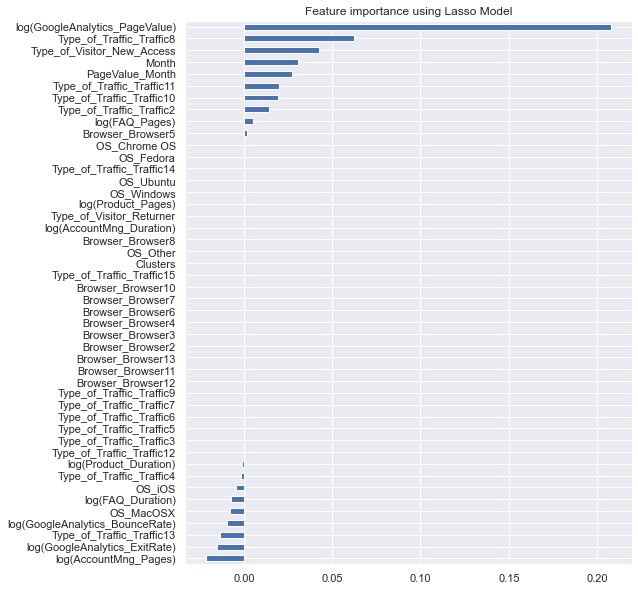

In [310]:
# Inspect result with a plot
plot_importance_(coef,'Lasso')

In [327]:
#which to keep and discard
features_Lasso=pd.DataFrame(coef)
feat_sel_lasso= features_Lasso[abs(feature_selected_Lasso)>0.01].dropna()

## Model selection

We will try different models, and for each model we will also apply different parameters. In the end we will check which model gives us better insights within each models best parameter choice collection.

In [178]:
# Create avg_score_intern to check for each model
def avg_score_intern(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        
        y_pred = model.predict(X_train)
        value_train = f1_score(y_train, y_pred, average="binary")
        

        # check the mean accuracy for the test

        # value_test = model.score(X_test,y_test)
        
        y_pred = model.predict(X_test)
        value_test = f1_score(y_test, y_pred, average="binary")


        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

In [179]:
# Create show_results_intern for each model 
def show_results_intern(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test, avg_iter = avg_score_intern(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test, avg_iter
        count+=1
    return df

### LOGISTIC REGRESSION

In [330]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'

X = train_data[feat_sel_lasso.index.to_list()] ##IMPORTANT!!!!!!!!!!!!!!!!!
y = train_target

In [331]:
from sklearn.neural_network import MLPClassifier
# Create an MLPClassifier
model = LogisticRegression()
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Raw'])
show_results_intern(df, model)

# model.predict(test_feature_selected)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
Raw  0.045+/-0.01  0.626+/-0.0  0.624+/-0.03  nan+/-nan

### MULTILAYER  PERCEPTRON (MLP)

In [177]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'

X = train_data[feature_importance_XGB['Features'][:17]] ##IMPORTANT!!!!!!!!!!!!!!!!!
y = train_target


In [176]:
from sklearn.neural_network import MLPClassifier
# Create an MLPClassifier
model = MLPClassifier()
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Raw'])
show_results_intern(df, model)

# model.predict(test_feature_selected)

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Time         Train          Test   Iterations
Raw  10.427+/-1.16  0.717+/-0.01  0.638+/-0.04  200.0+/-0.0

#### HIDDEN LAYER SIZE

Based on some rules of thumb:
- The number of hidden neurons should be between the size of the input layer and the size of the output layer
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
- The number of hidden neurons should be less than twice the size of the input layer

We have 9 input features.

We will try the following combinations:

1. hidden_layers_size = (9)
2. hidden_layers_size = (6)
3. hidden_layers_size = (3, 3)


In [59]:
# Create the corresponding models as described above
model_1 = MLPClassifier(hidden_layer_sizes=(14),
                       random_state = 42)

model_2 = MLPClassifier(hidden_layer_sizes=(10),
                       random_state = 42)

model_2_1 = MLPClassifier(hidden_layer_sizes=(6),
                       random_state = 42)

model_3 = MLPClassifier(hidden_layer_sizes=(3, 3),
                       random_state = 42)

In [141]:
# Check the result in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['1','2','3','4'])
show_results_intern(df, model_1, model_2, model_2_1, model_3)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['1','2','3','4'])\nshow_results_intern(df, model_1, model_2, model_2_1, model_3)\n"

Our best option seems to be with 2 hidden layers and 7 neurons for now.

#### ACTIVATION FUNCTION

We will try our model with several activation functions for the best hidden layer choice we got before.

The functions we will use are:
- tanh
- logistic
- reLU (is the default one)

In [143]:
# # Create the corresponding models as described above
model_tanh = MLPClassifier(hidden_layer_sizes=(14),
                          activation = 'tanh',
                          random_state = 42)

model_relu = MLPClassifier(hidden_layer_sizes=(14),
                          activation = 'relu',
                          random_state = 42)

model_logistic = MLPClassifier(hidden_layer_sizes=(14),
                          activation = 'logistic',
                          random_state = 42)

In [144]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['tanh','relu','logistic'])
show_results_intern(df, model_tanh, model_relu, model_logistic)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['tanh','relu','logistic'])\nshow_results_intern(df, model_tanh, model_relu, model_logistic)\n"

We sould for now keep the tanh activation function since it's the one that gives us a good balance between accuracy and time.

#### SOLVER

We will try 3 solvers:

- L-BFGS
- ADAM
- SGD 


In [145]:
# Create the corresponding models as described above
model_lbfgs = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'lbfgs',
                          random_state = 42)

model_adam = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          random_state = 42)

model_sgd = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'sgd',
                          random_state = 42)

In [146]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['lbfgs','adam','sgd'])
show_results_intern(df, model_lbfgs, model_adam, model_sgd)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['lbfgs','adam','sgd'])\nshow_results_intern(df, model_lbfgs, model_adam, model_sgd)\n"

As expected, the time that lbfgs took was much smaller than the other ones (by around 8.5 times in average). Not only the time was slower but also it got a better accuracy both in training and in testing. That being said we will opt for using lbfgs solver.

#### LEARNING RATE

We will try 3 different values for the learning rate init:
- 0.001
- 0.01
- 0.1

In [147]:
# Create the corresponding models as described above
model_lr001 = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.001, 
                          random_state = 42)

model_lr01 = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.01, 
                          random_state = 42)

model_lr1 = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.1, 
                          random_state = 42)

In [148]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = 0.001','LR = 0.01','LR = 0.1'])
show_results_intern(df, model_lr001, model_lr01, model_lr1)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = 0.001','LR = 0.01','LR = 0.1'])\nshow_results_intern(df, model_lr001, model_lr01, model_lr1)\n"

#### LEARNING RATE TYPE

We will try both types:
- adaptive
- constant

In [149]:
# Create the corresponding models as described above
model_lrconstant = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.01,
                          learning_rate = 'constant',
                          random_state = 42)

model_lradaptive = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.01,
                          learning_rate = 'adaptive',
                          random_state = 42)

In [150]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['constant','adaptive'])
show_results_intern(df, model_lrconstant, model_lradaptive)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['constant','adaptive'])\nshow_results_intern(df, model_lrconstant, model_lradaptive)\n"

#### MAXIMUM ITERATIONS

As we see in the results above our models reached the default value of maximum iterations (200). That specific value works properly for small datasets, although this is not the case.

We will try our model with the following values:
- 300
- 600
- 1000

After the results, we check if our model reached convergence. If needed we will provide new values for this parameter.

In [151]:
# Create the corresponding models as described above
model_300_iter = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.01,
                          max_iter = 300,
                          random_state = 42)

model_600_iter = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu',
                          solver = 'adam',
                          learning_rate_init = 0.01, 
                          max_iter = 600,
                          random_state = 42)

model_900_iter = MLPClassifier(hidden_layer_sizes=(10),
                          activation = 'relu',
                          solver = 'adam',
                          learning_rate_init = 0.01, 
                          max_iter = 900,
                          random_state = 42)

In [152]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['300 iter','600 iter','900 iter'])
show_results_intern(df, model_300_iter, model_600_iter, model_900_iter)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['300 iter','600 iter','900 iter'])\nshow_results_intern(df, model_300_iter, model_600_iter, model_900_iter)\n"

#### --------------------------------------------------------

### GridSearch for MLP

We will now run a GridSearchCV to find which is a possible set of parameters

In [180]:
parameter_space_mlp = {
    'hidden_layer_sizes': [15, 11, 8, 5],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
    'alpha': [0.0001, 0.01]
}

parameter_space_mlp

{'hidden_layer_sizes': [(15,), 11, 8, 5],
 'activation': ['tanh', 'relu', 'logistic'],
 'solver': ['sgd', 'adam', 'lbfgs'],
 'learning_rate_init': [0.001, 0.01, 0.1],
 'learning_rate': ['constant', 'adaptive'],
 'alpha': [0.0001, 0.01]}

In [187]:
if False:
    # Initialize the model
    model = MLPClassifier(max_iter = 300)

    # Create a GridSearch instance
    gs_mlp = GridSearchCV(model, 
                          parameter_space_mlp, 
                          n_jobs = -1,
                          cv = 3,
                          verbose = 4)

    # Fit it to our model
    gs_mlp.fit(X, y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(15,), 11, 8, 5],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=4)

In [188]:
if False:
    # Find the best parameters
    gs_mlp.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': 8,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'solver': 'lbfgs'}

In [58]:
if False:
best_mlp_manual = MLPClassifier(hidden_layer_sizes=(8),
                          activation = 'relu', 
                          solver = 'lbfgs',
                          learning_rate_init = 0.001,
                          max_iter = 300,
                          random_state = 42)
    # All results
    means = gs_mlp.cv_results_['mean_test_score']
    stds = gs_mlp.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs_mlp.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

Best parameters found from GridSearchCV: <br>
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (6,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}

#### --------------------------------------------------------

After using the gridsearch to find the possible best parameters, let us test that option against the one we found to be the best manually.

In [191]:
# Copy both models with their respective parameters

#best_mlp_manual = 

best_mlp_grid = MLPClassifier(hidden_layer_sizes=8,
                          activation = 'relu', 
                          solver = 'lbfgs',
                          learning_rate_init = 0.001,
                          learning_rate = 'constant',
                          alpha = 0.01,
                          random_state = 42)

In [192]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['GridSearch'])
show_results_intern(df, best_mlp_grid)

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Time         Train          Test   Iterations
GridSearch  0.677+/-0.06  0.657+/-0.03  0.622+/-0.04  200.0+/-0.0

From what we see, the results using the GridSearch seemed to extract better result and reached convergence. We will use those as the optimal parameters for now.

### GRADIENT BOOSTING CLASSIFIER

In [193]:
X = train_data[feature_importance_XGB['Features'][:29]] ###IMPORTANT
y = train_target


In [352]:
# Create avg_score_intern to check for each model
def avg_score_intern(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train

        y_pred = model.predict(X_train)
        value_train = f1_score(y_train, y_pred, average="binary")
        # value_train = model.score(X_train, y_train)

        # check the mean accuracy for the test

        y_pred = model.predict(X_test)
        value_test = f1_score(y_test, y_pred, average="binary")
        # value_test = model.score(X_test,y_test)


        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        #n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

#### LEARNING RATE

In [234]:
# Set different learning rates to the models and check the results

model_lr1 = GradientBoostingClassifier(learning_rate = .1, 
                                      random_state = 42)

model_lr3 = GradientBoostingClassifier(learning_rate = .3, 
                                      random_state = 42)

model_lr5 = GradientBoostingClassifier(learning_rate = .5, 
                                      random_state = 42)

In [153]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = .1','LR = .3', 'LR = .5'])
show_results_intern(df, model_lr1, model_lr3, model_lr5)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = .1','LR = .3', 'LR = .5'])\nshow_results_intern(df, model_lr1, model_lr3, model_lr5)\n"

#### NUMBER OF ESTIMATORS

In [154]:
# Set different numbers of estimators to the models and check the results

model_nesti_50 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 50,
                                        random_state = 42)

model_nesti_100 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        random_state = 42)

model_nesti_150 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 150,
                                        random_state = 42)

model_nesti_300 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 300,
                                        random_state = 42)

In [155]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['50 esti' ,'100 esti', '150 esti','300 esti'])
show_results_intern(df, model_nesti_50, model_nesti_100, model_nesti_150,  model_nesti_300)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['50 esti' ,'100 esti', '150 esti','300 esti'])\nshow_results_intern(df, model_nesti_50, model_nesti_100, model_nesti_150,  model_nesti_300)\n"

#### MINIMUM SAMPLES SPLIT

In [156]:
# Set different minimum number of samples to split to the models and check the results

model_minsample10 = GradientBoostingClassifier(learning_rate = .5,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        random_state = 42)

model_minsample20 = GradientBoostingClassifier(learning_rate = .5,
                                        n_estimators = 100,
                                        min_samples_split = 20,
                                        random_state = 42)

model_minsample40 = GradientBoostingClassifier(learning_rate = .5,
                                        n_estimators = 100,
                                        min_samples_split = 40,
                                        random_state = 42)

In [157]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Sample = 10', 'Min Sample = 20', 'Min Sample = 40'])
show_results_intern(df, model_minsample10 ,model_minsample20, model_minsample40)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Sample = 10', 'Min Sample = 20', 'Min Sample = 40'])\nshow_results_intern(df, model_minsample10 ,model_minsample20, model_minsample40)\n"

#### MINIMUM SAMPLES LEAF

In [158]:
# Set different minimum number of leaves to split to the models and check the results

model_minleaf1 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 1,
                                        random_state = 42)

model_minleaf2 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        random_state = 42)

model_minleaf5 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        random_state = 42)

In [159]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Leaf = 1', 'Min Leaf = 2', 'Min Leaf = 5'])
show_results_intern(df, model_minleaf1 ,model_minleaf2, model_minleaf5)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Leaf = 1', 'Min Leaf = 2', 'Min Leaf = 5'])\nshow_results_intern(df, model_minleaf1 ,model_minleaf2, model_minleaf5)\n"

#### MAXIMUM DEPTH

In [160]:
# Set different maximum depths to the models and check the results

model_maxd3 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        random_state = 42)

model_maxd4 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 4,
                                        random_state = 42)

model_maxd5 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 5,
                                        random_state = 42)

In [162]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Max Depth = 3', 'Max Depth = 4', 'Max Depth = 5'])
show_results_intern(df, model_maxd3, model_maxd4 , model_maxd5)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Max Depth = 3', 'Max Depth = 4', 'Max Depth = 5'])\nshow_results_intern(df, model_maxd3, model_maxd4 , model_maxd5)\n"

#### SUBSAMPLE

In [163]:
# Set different subsamples to the models and check the results

model_subsample1 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = 1.0,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        random_state = 42)

model_subsample8 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = .8,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        random_state = 42)

model_subsample6 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = .6,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        random_state = 42)

In [164]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['sample = 1', 'sample = 0.8', 'sample = 0.6'])
show_results_intern(df, model_subsample1, model_subsample8 , model_subsample6)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['sample = 1', 'sample = 0.8', 'sample = 0.6'])\nshow_results_intern(df, model_subsample1, model_subsample8 , model_subsample6)\n"

#### MAXIMUM NUMBER OF FEATURES

In [165]:
# Set different subsamples to the models and check the results

model_maxfeat3 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = 1,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        max_features = 3,
                                        random_state = 42)

model_maxfeat7 = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = 1,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        max_features = 7,
                                        random_state = 42)

model_nomaxfeat = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 100,
                                        subsample = 1,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        max_features = None,
                                        random_state = 42)

In [166]:
# Check the results in a dataframe
'''
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['max feat = 3', 'max feat = 7', 'max feat = None'])
show_results_intern(df, model_maxfeat3, model_maxfeat7 , model_nomaxfeat)
'''

"\ndf = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['max feat = 3', 'max feat = 7', 'max feat = None'])\nshow_results_intern(df, model_maxfeat3, model_maxfeat7 , model_nomaxfeat)\n"

In [198]:
# Initialise the model to be used
model_gbc = GradientBoostingClassifier()

# Create the parameter space
parameter_space_gbc = {'n_estimators' : [50, 100, 150, 300],
                       'learning_rate' : [0.1, 0.3],
                       'min_samples_split' : [10,20,40],
                       'min_samples_leaf': [1,2,5],
                       'max_depth' : [3,4,5],
                       'random_state' : [42]}

# Check the parameters
parameter_space_gbc

{'n_estimators': [50, 100, 150, 300, 400],
 'learning_rate': [0.1, 0.3, 0.5, 0.7],
 'min_samples_split': [10, 20, 40],
 'min_samples_leaf': [1, 2, 5],
 'max_depth': [3, 4, 5],
 'random_state': [42]}

In [199]:
# Create the GridSearch instance with our parameters
if False:    
    grid_gbc = GridSearchCV(model_gbc, 
                            parameter_space_gbc, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 5
                           )
    
    # Fit the grid_svc to our data
    grid_gbc.fit(X,y) 

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [10, 20, 40],
                         'n_estimators': [50, 100, 150, 300, 400],
                         'random_state': [42]},
             verbose=5)

In [200]:
# Find the best parameter set
grid_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [205]:
# Test the model with those parameters
if False:
    model_gbc = GradientBoostingClassifier(learning_rate = 0.1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)
  
    # Check the results in a dataframe
    df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['GradientBoostingC'])
    show_results_intern(df, model_gbc)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
GradientBoostingC  1.781+/-0.06  0.725+/-0.0  0.664+/-0.02  nan+/-nan

### ADABOOST CLASSIFIER

In [217]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [50, 100, 150, 300],
                       'learning_rate' : [0.2, 0.5, 0.7],
                       'algorithm' : ['SAMME.R', 'SAMME'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [50, 100, 150, 300],
 'learning_rate': [0.2, 0.5, 0.7],
 'algorithm': ['SAMME.R', 'SAMME'],
 'random_state': [42]}

In [218]:
# Create the GridSearch instance with our parameters
if False:
grid_abc = GridSearchCV(model_abc, 
                            parameter_space_abc, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 5
                           )
    
    # Fit the grid_svc to our data
grid_abc.fit(X,y)  

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.2, 0.5, 0.7],
                         'n_estimators': [50, 100, 150, 300],
                         'random_state': [42]},
             verbose=5)

In [219]:
# Find the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 150,
 'random_state': 42}

"Adaboost Best parameters by Grid Search CV:<br> {'algorithm': 'SAMME.R',
 'learning_rate': 0.3,
 'n_estimators': 100,
 'random_state': 42} "

In [221]:
# Test the model with those parameters
if False:
    model_abc = AdaBoostClassifier(n_estimators = 150,
                                 algorithm ='SAMME.R', 
                                 learning_rate = 0.5,
                                 random_state = 42)
  
    # Check the results in a dataframe
    df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['AdaBoost'])
    show_results_intern(df, model_abc)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
AdaBoost  1.631+/-0.05  0.661+/-0.0  0.639+/-0.02  nan+/-nan

### RANDOM FOREST

We will try to find the best parameters by directly running a GridSearchCV in this case

In [226]:
#best combo of features for RF:
X=train_preprocessed[['Month','PageValue_Month','log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)','log(FAQ_Duration)','log(Product_Pages)','log(Product_Duration)','log(GoogleAnalytics_BounceRate)','log(GoogleAnalytics_ExitRate)','log(GoogleAnalytics_PageValue)','OS_Windows','Type_of_Visitor_Returner','Type_of_Traffic_Traffic2','Browser_Browser2']]
y=train_target

In [227]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = [3, 7, "None"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 10, 14]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameter_space_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameter_space_rf

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
 'max_features': [3, 7, 'None'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'min_samples_split': [10, 20, 30],
 'min_samples_leaf': [6, 10, 14],
 'bootstrap': [True, False]}

In [228]:
if False:
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    model_rf = RandomForestClassifier()

    # Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
    rs_rf = RandomizedSearchCV(estimator = model_rf, 
                               param_distributions = parameter_space_rf, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

    # Fit the random search model
    rs_rf.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\Nico9\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Nico9\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': [3, 7, 'None'],
                                        'min_samples_leaf': [6, 10, 14],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [229]:

    # Find the best parameters
    print(rs_rf.best_params_)

{'n_estimators': 450, 'min_samples_split': 30, 'min_samples_leaf': 6, 'max_features': 7, 'max_depth': 50, 'bootstrap': False}


Random Forest Grid Search CV Parameters : <br>
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': False}

In [230]:
# Try a random forest classifier with those parameters
model_rf = RandomForestClassifier(n_estimators = 450, 
                                  min_samples_split = 30, 
                                  min_samples_leaf = 6,
                                  max_features = 7, 
                                  max_depth = 50, 
                                  bootstrap = False, 
                                  random_state = 42
                                 )

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['random forest'])
show_results_intern(df, model_rf)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
random forest  9.903+/-0.83  0.818+/-0.0  0.658+/-0.03  nan+/-nan

### SVC (Support Vector Machine Classifier)

Finding the best parameters for SVC using a grid search

In [362]:
X=train_preprocessed[['log(GoogleAnalytics_PageValue)','PageValue_Month']]
y=train_target

In [103]:
if False:
    # Definig the classifier to use
    model_svc = SVC()

    # Creating the parameter space
    parameter_space_svc = {'C':[1, 5, 10], 
                           'gamma':['auto', 'scale', 0.1, 5], 
                           'kernel':['rbf', 'linear', 'sigmoid']
                          }

    # Checking the parameter space
    parameter_space_svc

{'C': [1, 5, 10], 'gamma': ['auto', 'scale', 0.1, 5], 'kernel': ['linear']}

In [104]:
if False:
    # Create the GridSearch instance with our parameters
    grid_svc = GridSearchCV(model_svc, 
                            parameter_space_svc, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 5
                           )

    # Fit the grid_svc to our data
    grid_svc.fit(X,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': ['auto', 'scale', 0.1, 5],
                         'kernel': ['linear']},
             verbose=5)

In [105]:
if False:
    # Get the best parameters
    print(grid_svc.best_params_)

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}


SVC best perameters by Grid Search CV :<br>
{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}

In [363]:
# Initialize the model
model_svc = SVC(
            C = 1,
           gamma = 'auto',
           kernel = 'linear',
           random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['svc'])
show_results_intern(df, model_svc)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
svc  0.889+/-0.04  0.663+/-0.0  0.662+/-0.03  nan+/-nan

### K Neighbors

In [339]:
X = train_data[feature_importance_XGB['Features'][:29]] ###IMPORTANT
y = train_target


In [337]:
if False:
    # Definig the classifier to use
    model_knn = KNeighborsClassifier(n_neighbors = 7, 
                             n_jobs = -1)

    # Creating the parameter space
    parameter_space_knn = {'n_neighbors':[3,5,7,9,11,13,15,17]}

    # Checking the parameter space
    parameter_space_knn

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}

In [340]:
if False:
    # Create the GridSearch instance with our parameters
    grid_knn= GridSearchCV(model_knn, 
                            parameter_space_knn, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 5
                           )

    # Fit the grid_svc to our data
    grid_knn.fit(X,y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=7),
             n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             verbose=5)

In [341]:
if False:
    # Get the best parameters
    print(grid_knn.best_params_)

{'n_neighbors': 13}


In [344]:
# Initialize the model
model_knn = KNeighborsClassifier(
            n_neighbors=13)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['knn'])
show_results_intern(df, model_knn)

C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Nico9\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time        Train          Test Iterations
knn  0.003+/-0.0  0.667+/-0.0  0.619+/-0.03  nan+/-nan

### Use stratified k-fold cross validation to find a good model
**For this, define a function that applies stratified k-fold cross validation on a given model and data set and computes the average accuracy.**

**Then, initialise different models and use the function on them.**

In [374]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'
def avg_score(model, data, target, model_name):
    """Function to apply a model and compute the average accuracy by using k-fold cross validation"""
    
    # Create an instance of 'StratifiedKFold' with 10 splits
    kf_stratified = StratifiedKFold(n_splits=10)

    # Create lists to store the results from the different splits 
    score_train = []
    score_validation = []
    
    timer = []
    #n_iter = []
    
    for train_index, validation_index in kf_stratified.split(data, target):
        
        # get the indexes of the observations assigned for each partition
        X_train, X_validation = data.iloc[train_index], data.iloc[validation_index]
        y_train, y_validation = target.iloc[train_index], target.iloc[validation_index]
        
        # Start counting time
        begin = time.perf_counter()
        
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Finish counting time
        end = time.perf_counter()
        
        # Get the mean accuracy for the training set
        # value_train = model.score(X_train, y_train)
        y_pred = model.predict(X_train)
        value_train = f1_score(y_train, y_pred, average="binary")
        
        # Get the mean accuracy for the validation set
        # value_validation = model.score(X_validation, y_validation)
        y_pred = model.predict(X_validation)
        value_validation = f1_score(y_validation, y_pred, average="binary")
        
        # Append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_validation.append(value_validation)
        
        timer.append(end-begin)
        
        # n_iter.append(model.n_iter_)
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),2)
    avg_train = round(np.mean(score_train),4)
    avg_validation = round(np.mean(score_validation),4)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),6)
    std_validation = round(np.std(score_validation),6)
    # avg_iter = round(np.mean(n_iter),1)
    # std_iter = round(np.std(n_iter),1)
    
    return pd.DataFrame({'Avg. train score':[avg_train], 'Std. dev. train score':[std_train],
                         'Avg. validation score':[avg_validation], 'Std. dev. validation score':[std_validation],
                        'Avg. time':[avg_time], 'Std. dev. time':[std_time]},
                        index=[model_name]), score_train, score_validation, timer

# Create a dataframe for results
models_results = pd.DataFrame(columns=['Avg. train score','Std. dev. train score','Avg. validation score','Std. dev. validation score',
                      'Avg. time','Std. dev. time'])

### Logistic Regression

In [375]:
X = train_data[feat_sel_lasso.index.to_list()] ##IMPORTANT!!!!!!!!!!!!!!!!!
y = train_target

In [376]:
# Initialise an MLP Classifier
model = LogisticRegression()

# Use 'avg_score' to apply k-fold cross validation
df_lreg=train_data[feat_sel_lasso.index.to_list()] 
LR_result, LR_score_train, LR_score_validation, LR_timer = avg_score(model, df_lreg, train_target, 'Logistic Regression')

In [377]:
# Append result to 'models_results'
models_results = models_results.append(LR_result)

### MLP classifier

In [378]:
X = train_data[feature_importance_XGB['Features'][:17]] ##IMPORTANT!!!!!!!!!!!!!!!!!
y = train_target

In [379]:
# Initialise an MLP Classifier
model = MLPClassifier(hidden_layer_sizes=8,
                          activation = 'relu', 
                          solver = 'lbfgs',
                          learning_rate_init = 0.001,
                          learning_rate = 'constant',
                          alpha = 0.01,
                          random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
df_mlp=train_data[feature_importance_XGB['Features'][:17]] 
MLP_result, MLP_score_train, MLP_score_validation, MLP_timer = avg_score(model, df_mlp, train_target, 'Multilayer perceptron')

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [380]:
# Append result to 'models_results'
models_results = models_results.append(MLP_result)

### Gradient Boosting Classifier

In [381]:
X = train_data[feature_importance_XGB['Features'][:29]] ###IMPORTANT
y = train_target

In [382]:
# Initialise a Gradient Boosting classifier
model = GradientBoostingClassifier(learning_rate = 0.1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
df_gbc=train_data[feature_importance_XGB['Features'][:29]] 
GBC_result, GBC_score_train, GBC_score_validation, GBC_timer = avg_score(model, df_gbc, train_target, 'Gradient Boosting Classifier')

In [383]:
# Append result to 'models_results'
models_results = models_results.append(GBC_result)

### Ada Boost classifier

In [384]:
# Initialise an Ada Boost classifier
model = AdaBoostClassifier(n_estimators = 100,
                          algorithm = 'SAMME.R',
                          learning_rate = 0.3, 
                          random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
df_abc=train_data[feature_importance_XGB['Features'][:29]] 
ABC_result, ABC_score_train, ABC_score_validation, ABC_timer = avg_score(model, df_abc, train_target, 'Ada Boost Classifier')

In [385]:
# Append result to 'models_results'
models_results = models_results.append(ABC_result)

## Decision tree

### Random Forest classifier

In [386]:
#best combo of features for RF:
X=train_preprocessed[['Month','PageValue_Month','log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)','log(FAQ_Duration)','log(Product_Pages)','log(Product_Duration)','log(GoogleAnalytics_BounceRate)','log(GoogleAnalytics_ExitRate)','log(GoogleAnalytics_PageValue)','OS_Windows','Type_of_Visitor_Returner','Type_of_Traffic_Traffic2','Browser_Browser2']]
y=train_target

In [387]:
# Initialise a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators = 450, 
                                  min_samples_split = 30, 
                                  min_samples_leaf = 6,
                                  max_features = 7, 
                                  max_depth = 50, 
                                  bootstrap = False, 
                                  random_state = 42
                                 )

# Use 'avg_score' to apply k-fold cross validation
df_rf = train_preprocessed[['Month','PageValue_Month','log(AccountMng_Pages)','log(AccountMng_Duration)','log(FAQ_Pages)','log(FAQ_Duration)','log(Product_Pages)','log(Product_Duration)','log(GoogleAnalytics_BounceRate)','log(GoogleAnalytics_ExitRate)','log(GoogleAnalytics_PageValue)','OS_Windows','Type_of_Visitor_Returner','Type_of_Traffic_Traffic2','Browser_Browser2']]
RFC_result, RFC_score_train, RFC_score_validation, RFC_timer = avg_score(model, df_rf, train_target, 'Random Forest Classifier')

In [388]:
# Append result to 'models_results'
models_results = models_results.append(RFC_result)

### Extra Trees classifier

In [389]:
# Initialise an Extra Trees classifier
'''
model = ExtraTreesClassifier(n_estimators = 150,
                            n_jobs = -1,
                            random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
ETC_result, ETC_score_train, ETC_score_validation, ETC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Extra Trees Classifier')
'''

"\nmodel = ExtraTreesClassifier(n_estimators = 150,\n                            n_jobs = -1,\n                            random_state = 42)\n\n# Use 'avg_score' to apply k-fold cross validation\nETC_result, ETC_score_train, ETC_score_validation, ETC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Extra Trees Classifier')\n"

In [390]:
# Append result to 'models_results'
'''
models_results = models_results.append(ETC_result)
'''

'\nmodels_results = models_results.append(ETC_result)\n'

### Support Vector Classification

In [391]:
X=train_preprocessed[['log(GoogleAnalytics_PageValue)','PageValue_Month']]
y=train_target

In [392]:
# Initialise an SVC
model = SVC(C = 1,
           gamma = 'auto',
           kernel = 'linear',
           random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
df_svc=train_preprocessed[['log(GoogleAnalytics_PageValue)','Month']]
SVC_result, SVC_score_train, SVC_score_validation, SVC_timer = avg_score(model, df_svc, train_target, 'SVC')

In [393]:
# Append result to 'models_results'
models_results = models_results.append(SVC_result)

### K Neighbors

In [394]:
# Initialise a KNeighbors Classifier 
model = KNeighborsClassifier(n_neighbors = 13, 
                             n_jobs = -1)

# Use 'avg_score' to apply k-fold cross validation
KNN_result, KNN_score_train, KNN_score_validation, KNN_timer = avg_score(model, train_data, train_target, 'K Neighbors')

In [395]:
# Append result to 'models_results'
models_results = models_results.append(KNN_result)

## Alternative approach: Random KNN Trees

In [421]:
import random
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold

In [409]:
class RKNN:
    def __init__(self):
        self.models = list()
        self.features = list()
        self.trainIndices = list()
        self.valIndices = list()

    def get_params(self, deep):
        return (self.models, self.features)
    
    def fit(self, X_train, y_train, numberOfModels, minK, maxK = None):
        print('Fitting the RKNN model to the training data...')
        if maxK == None:
            maxK = minK
        
        for i in range(numberOfModels):
            if i % 50 == 0:
                print(i)
            #print('X:', X_train.shape)
            #print('y:', y_train.shape)
            
            # generate features to use for training the curent model
            numberOfFeatures = random.randint(int(X_train.shape[1]/2), X_train.shape[1])
            featuresList = random.sample(list(X_train.columns), numberOfFeatures)
            
            # oversample the minority class, keep the same number of labels of the majority class 
            oversample = SMOTE(sampling_strategy = {0: Counter(y_train)[0], 1: 3*Counter(y_train)[1]}, 
                               k_neighbors = 8, random_state = minK, n_jobs=-1)
            X_over, y_over = oversample.fit_resample(X_train, y_train)
            #print('X_over:', X_over.shape)
            #print('y_over:', y_over.shape)
            
            # undersampling the majority class, keeping the number of samples of the minority class 
            # in a way that there will be the same number of 0 and 1 at the end 
            undersample = RandomUnderSampler(sampling_strategy = 
                                                {0: Counter(y_over)[1], 1: Counter(y_over)[1]})
            X_over_under, y_over_under = undersample.fit_resample(X_over, y_over)
            #print('X_over_under: ', X_over_under.shape)
            #print('y_over_under: ', y_over_under.shape)
            
            # generate number of samples to use for the training the current model
            numberOfSamples = X_over_under.shape[0]
            currentNumberOfSamples = random.randrange(int(numberOfSamples/5*2), int(numberOfSamples/5*4))
            indices = random.sample(list(X_over_under.index), currentNumberOfSamples)
        
            # select the generated samples and features for X and y
            currentX = X_over_under.iloc[indices]
            currentX = currentX.loc[:, featuresList]
            currentY = y_over_under.iloc[indices]
            #print('currentX: ', currentX.shape)
            #print('currentY: ', currentY.shape)
            
            # generate number of neighbors to use for current model
            k = random.choice(range(minK, maxK+1))
            
            # build model
            model = KNeighborsClassifier(n_neighbors = k, weights='distance')
            model.fit(currentX, currentY)
            
            self.features.append(featuresList)
            self.models.append(model)
            
    
    def predict(self, X):
        print('Performing prediction...')
        dfPreds = pd.DataFrame()
        
        for i, model in enumerate(self.models): 
            if i % 50 == 0:
                print(i)
            featuresList = self.features[i]
            pred = model.predict(X.loc[:, featuresList])
            #pred = model.predict(X.reindex(featuresList))
            dfPreds[i] = pred
        
        dfPreds['predictionScore'] = dfPreds.sum(axis=1).values
        
        # labeling the highest 15percent as buyers (using the a priori information regarding the distribution of labels)
        numberOfBuyers = int(X.shape[0] * 0.15)
        indices = dfPreds.nlargest(numberOfBuyers, 'predictionScore').index
        dfPreds['predictionLabel'] = [0 for i in range(dfPreds.shape[0])]
        #indices = dfPreds[dfPreds['predictionScore'] > (int(len(self.models)/2))].index
        dfPreds['predictionLabel'].iloc[indices] = 1
        #print(dfPreds['predictionLabel'].value_counts())
        return dfPreds['predictionLabel']
    
    def score(self, X_val, y_val):
        preds = self.predict(X_val)
        return f1_score(preds, y_val, average="binary")    

In [410]:
def cross_val_score(X, y, parameterSpace, n_splits=5, n_repeats=3):
    rskf = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats, random_state = 10)
    scores = list()

    runCounter = 1
    for train_index, val_index in rskf.split(X, y):
        rknn = RKNN()
        rknn.fit(X_train = X.iloc[train_index], y_train = y.iloc[train_index], **parameterSpace)
        score = rknn.score(X.iloc[val_index], y.iloc[val_index])
        scores.append(score)
        print('run{} score: {}'.format(runCounter, score))
        runCounter += 1

    return np.array(scores).mean(), np.array(scores).std()

In [411]:
rknn = RKNN()
rknn.fit(X, y, numberOfModels=800, minK=2, maxK=5)
dfTest = pd.read_csv('test_log_preprocessed.csv')
if 'Access_ID' in dfTest.columns:
    dfTest.drop(['Access_ID'], axis=1, inplace=True)
submission = pd.DataFrame({'Access_ID': test_id, 'Buy': rknn.predict(dfTest)})
Counter(submission['Buy'])

Fitting the RKNN model to the training data...
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
Performing prediction...
0
50
100


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

150


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

200


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

250


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

300


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

350


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

400


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

450


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

500


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

550


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

600


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

650


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

700


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

750


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfPreds[i] = pred
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17168/1099381341.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Counter({0: 1955, 1: 345})

In [422]:
parameterSpace = {
'numberOfModels': 100,
'minK': 5,
'maxK': 24
}

avgScore, stdDev = cross_val_score(X, y, parameterSpace)
parameterSpace['avgScore'] = avgScore
parameterSpace['stdDev'] = stdDev

parameterSpace

Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run1 score: 0.6295081967213115
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run2 score: 0.6295081967213115
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run3 score: 0.6317512274959084
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run4 score: 0.6121112929623568
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run5 score: 0.6305418719211823
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run6 score: 0.6262295081967212
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run7 score: 0.6229508196721313
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run8 score: 0.6317512274959084
Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50
run9 score: 0.

{'numberOfModels': 100,
 'minK': 5,
 'maxK': 24,
 'avgScore': 0.62448761851189,
 'stdDev': 0.015523569507097797}

In [439]:
RKNN_score_val,RKNN_std_score=list(parameterSpace.values())[3], list(parameterSpace.values())[4]

In [471]:
RKNN_score = {
  'Avg. train score': [np.nan],
  'Std. dev. train score':[np.nan],
  'Avg. validation score':[RKNN_score_val],
  'Std. dev. validation score': [RKNN_std_score],
  'Avg. time':[np.nan],
  'Std. dev. time':[np.nan]
}

In [475]:
RKNN_result= pd.DataFrame(data=RKNN_score)
#RKNN_score= pd.Series([np.nan, np.nan, RKNN_score_val, RKNN_std_score, np.nan, np.nan])
#RKNN_result.append(RKNN_score,ignore_index=True)
RKNN_result.rename(index={0: 'RKNN'}, inplace=True)
RKNN_result

Avg. train score  Std. dev. train score  Avg. validation score  \
RKNN               NaN                    NaN               0.624488   

      Std. dev. validation score  Avg. time  Std. dev. time  
RKNN                    0.015524        NaN             NaN

In [476]:
# Append result to 'models_results'
models_results = models_results.append(RKNN_result)

In [ ]:
#submission.to_csv(f'submission_RKNN_K2-5_models800_1.csv', index=False)

In [412]:
featList = ['log(GoogleAnalytics_PageValue)', 'PageValue_Month', 'Month', 'Type_of_Visitor_Returner', 'log(GoogleAnalytics_BounceRate)', 'log(AccountMng_Pages)', 'log(GoogleAnalytics_ExitRate)', 'log(Product_Duration)','log(Product_Pages)', 'log(AccountMng_Duration)','log(FAQ_Duration)','log(FAQ_Pages)',
 'OS_Chrome OS', 'OS_iOS', 'OS_Windows', 'Type_of_Traffic_Traffic3', 'Type_of_Traffic_Traffic11', 'Type_of_Visitor_New_Access',
 'Browser_Browser2', 'Browser_Browser4', 'Browser_Browser5','Browser_Browser6', 'Type_of_Traffic_Traffic6', 'Type_of_Traffic_Traffic5', 'Type_of_Traffic_Traffic8','Type_of_Traffic_Traffic13','Type_of_Traffic_Traffic10', 'Type_of_Traffic_Traffic2','Type_of_Traffic_Traffic4']

In [413]:
train_preprocessed = pd.read_csv('train_log_preprocessed.csv')
X=train_preprocessed.drop('Buy', axis=1)
y=train_preprocessed['Buy']
metric_features = featList[:12]
OHE_features = featList[12:]

In [414]:
numberOfBins = 7

In [415]:
X_OHE = X[OHE_features]
print('original metric features: ', len(metric_features))
print('original OHE features:', X_OHE.shape)

X_copy = X.copy()

for feat in metric_features: 
    X_copy[feat] = pd.cut(X_copy[feat],
        bins = numberOfBins,
        labels = [feat+'_'+str(i) for i in range(0, numberOfBins)])
    
OHE = OneHotEncoder()

for feat in metric_features: 
    featEncoded = pd.DataFrame(OHE.fit_transform(X_copy[[feat]]).toarray(), columns=OHE.get_feature_names([feat]), index=X_copy.index)
    #print(featEncoded.shape[1])
    X_OHE = pd.concat([X_OHE, featEncoded], axis = 1)
    
print('result OHE features: ', X_OHE.shape)

original metric features:  12
original OHE features: (9999, 17)
result OHE features:  (9999, 94)


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

In [417]:
dfTest = pd.read_csv('test_log_preprocessed.csv')
if 'Access_ID' in dfTest.columns:
    dfTest.drop(['Access_ID'], axis=1, inplace=True)
    
dfTest_OHE = dfTest[OHE_features]
print('original metric features: ', len(metric_features))
print('original OHE features:', dfTest_OHE.shape)

OHE = OneHotEncoder()

dfTest_copy = dfTest.copy()
for feat in metric_features: 
    dfTest_copy[feat] = pd.cut(dfTest_copy[feat],
        bins = numberOfBins,
        labels = [feat+'_'+str(i) for i in range(0, numberOfBins)])
    
for feat in metric_features: 
    featEncoded = pd.DataFrame(OHE.fit_transform(dfTest_copy[[feat]]).toarray(), columns=OHE.get_feature_names([feat]), index=dfTest_copy.index)
    #print(featEncoded.shape[1])
    dfTest_OHE = pd.concat([dfTest_OHE, featEncoded], axis = 1)

print('result OHE features: ', dfTest_OHE.shape)

original metric features:  12
original OHE features: (2300, 17)
result OHE features:  (2300, 94)


C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

In [418]:
#for feat in dfTest_OHE.columns:
#    if feat not in X_OHE.columns:
#        print(feat)

for feat in X_OHE.columns:
    if feat not in dfTest_OHE.columns:
        print(feat)
        dfTest_OHE[feat] = [0 for i in range(len(dfTest_OHE))]

log(FAQ_Pages)_log(FAQ_Pages)_1


In [419]:
rknn = RKNN()
rknn.fit(X_OHE, y, numberOfModels=100, minK=10, maxK=20)
submission = pd.DataFrame({'Access_ID': test_id, 'Buy': rknn.predict(dfTest_OHE)})
Counter(submission['Buy'])

Fitting the RKNN model to the training data...
0
50
Performing prediction...
0
50


Counter({0: 1955, 1: 345})

In [ ]:
#submission.to_csv(f'submission_RKNN__OHE_bins7_K10-20_models100.csv', index=False)

### Gaussian Process Classifier

In [118]:
if False:
    # Initialise a Gaussian Process Classifier
    model = GaussianProcessClassifier(n_jobs = -1,
                                     random_state = 42)

    # Use 'avg_score' to apply k-fold cross validation
    GPC_result, GPC_score_train, GPC_score_validation, GPC_timer = avg_score(model, train_data, train_target, 'Gaussian Process')

In [119]:
if False:    
    # Append result to 'models_results'
    models_results = models_results.append(GPC_result)

### Gaussian Naive Bayes

In [120]:
if False:
    # Initialise a Gaussian Naive Bayes
    model = GaussianNB()

if False:
    # Use 'avg_score' to apply k-fold cross validation
    GNB_result, GNB_score_train, GNB_score_validation, GNB_timer = avg_score(model, train_data, train_target, 'Gaussian NB')

In [121]:
if False:
    # Append result to 'models_results'
    models_results = models_results.append(GNB_result)

## STACKING MODELS

### Gradient Boosting Classifer & Support Vector Classifier Stacking

In [485]:
X = train_data[feature_importance_XGB['Features'][:29]]
y = train_target
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

In [486]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(learning_rate = 0.1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)

# Random Forest Classifier
svc_model = SVC(C = 1,
           gamma = 'auto',
           kernel = 'linear',
           random_state = 42)

# Fit the models to our data
gbc_fit = gbc_model.fit(X_train, y_train)
svc_fit = svc_model.fit(X_train, y_train)


# Get the models scores
y_pred_gbc = gbc_fit.predict(X_val)
gbc_score = f1_score(y_val, y_pred_gbc, average="binary")
# gbc_score = gbc.score(X_test, y_test)

y_pred_svc = svc_fit.predict(X_val)
svc_score = f1_score(y_val, y_pred_svc, average="binary")
# rf_score = rf.score(X_test, y_test)
print('F1 score of the GBC model: '+ str(gbc_score))
print('F1 score of the SVC model: '+ str(svc_score))

F1 score of the GBC model: 0.6701030927835052
F1 score of the SVC model: 0.6357388316151203


In [487]:
from sklearn.ensemble import StackingClassifier

# Define the model to be stacked
estimators = [('GBC', gbc_model),('SVC', mlp_model)]

# Create a stacking instance using the models defined above
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit it to our data
sc.fit(X_train, y_train)

# Get the score
# sc_score = sc.score(X_test, y_test)
y_pred_sc = sc.predict(X_val)
sc_score = f1_score(y_val, y_pred_sc, average="binary")

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [496]:
sc_score

0.6714031971580817

In [494]:
SC_result, SC_score_train, SC_score_validation, SC_timer = avg_score(sc, X, train_target, 'Stacking GBC-SVC')

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Nico9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [497]:
models_results = models_results.append(SC_result)

### Checking Which Model Perform Best

In [498]:
# Check the DF with the different models results
models_results.sort_values(by='Avg. validation score', ascending=False, inplace=True)
models_results

Avg. train score  Std. dev. train score  \
SVC                                     0.6632               0.002622   
Gradient Boosting Classifier            0.7219               0.004040   
Stacking GBC-SVC                        0.7131               0.004038   
Random Forest Classifier                0.6480               0.005263   
Ada Boost Classifier                    0.6487               0.004192   
Multilayer perceptron                   0.6584               0.020715   
Logistic Regression                     0.6261               0.004341   
RKNN                                       NaN                    NaN   
K Neighbors                             0.6684               0.005284   

                              Avg. validation score  \
SVC                                        0.663200   
Gradient Boosting Classifier               0.661200   
Stacking GBC-SVC                           0.649000   
Random Forest Classifier                   0.636400   
Ada Boost Classifier                       0.635600   
Multilayer perceptron                      0.626700   
Logistic Regression                        0.625100   
RKNN                                       0.624488   
K Neighbors                                0.623900   

                              Std. dev. validation score  Avg. time  \
SVC                                             0.023862       1.28   
Gradient Boosting Classifier                    0.027272       1.72   
Stacking GBC-SVC                                0.030773      13.43   
Random Forest Classifier                        0.026161       0.86   
Ada Boost Classifier                            0.024126       1.01   
Multilayer perceptron                           0.041748       0.67   
Logistic Regression                             0.034621       0.04   
RKNN                                            0.015524        NaN   
K Neighbors                                     0.030785       0.00   

                              Std. dev. time  
SVC                                     0.08  
Gradient Boosting Classifier            0.05  
Stacking GBC-SVC                        0.90  
Random Forest Classifier                0.05  
Ada Boost Classifier                    0.08  
Multilayer perceptron                   0.04  
Logistic Regression                     0.01  
RKNN                                     NaN  
K Neighbors                             0.00

(0.4, 0.8)

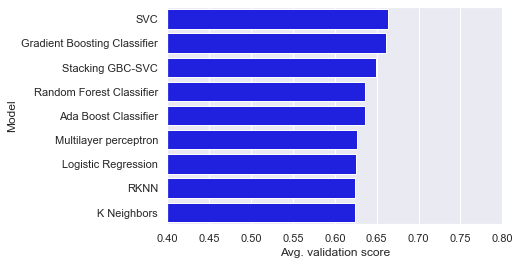

In [499]:
models_results.index.set_names(['Model'], inplace=True)
models_results.reset_index()
sns.barplot(y=models_results.index, x=models_results['Avg. validation score'], color='blue')
plt.xlim(0.4, 0.8)

## Inference with Best Performing Model : Random Forest Classifier

In [107]:
test_preprocessed.drop('Browser_Browser9', axis=1, inplace=True)

In [108]:
test_data_selected.columns

Index(['log(GoogleAnalytics_PageValue)'], dtype='object')

In [207]:
# FINAL MODEL
model = GradientBoostingClassifier(learning_rate = 0.1,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)


# X = train_data_selected_scaled
# y = train_target

# WHICH SPECIFIC SUB DATAFRAME DO WE USE TO TRAIN THE FINAL MODEL AND PREDICT THE TARGET ON THE TEST??
train_data_selected=train_data[feature_importance_XGB['Features'][:29]]
test_data_selected=test_preprocessed[feature_importance_XGB['Features'][:29]]
X = train_data_selected
y = train_target
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(test_data_selected)#.drop('Access_ID',axis=1))

In [208]:
test_data_selected.describe().T

count      mean       std       min  \
log(GoogleAnalytics_PageValue)   2300.0 -0.023155  0.980677 -0.524600   
PageValue_Month                  2300.0 -0.016297  0.901534 -0.287776   
Month                            2300.0 -0.003903  0.990399 -1.661028   
Type_of_Visitor_Returner         2300.0  0.864348  0.342493  0.000000   
log(GoogleAnalytics_BounceRate)  2300.0 -0.013905  0.999856 -1.055689   
Type_of_Traffic_Traffic6         2300.0  0.039130  0.193947  0.000000   
Type_of_Traffic_Traffic5         2300.0  0.021739  0.145862  0.000000   
Type_of_Traffic_Traffic8         2300.0  0.025217  0.156819  0.000000   
log(AccountMng_Pages)            2300.0 -0.011320  0.994567 -0.947128   
Type_of_Traffic_Traffic13        2300.0  0.061739  0.240733  0.000000   
Type_of_Traffic_Traffic4         2300.0  0.086522  0.281194  0.000000   
log(GoogleAnalytics_ExitRate)    2300.0 -0.010716  1.010248 -4.888560   
log(Product_Duration)            2300.0  0.007975  0.967528 -3.083891   
Browser_Browser4                 2300.0  0.060000  0.237538  0.000000   
Type_of_Traffic_Traffic10        2300.0  0.040435  0.197020  0.000000   
Type_of_Traffic_Traffic2         2300.0  0.326522  0.469043  0.000000   
log(Product_Pages)               2300.0  0.008661  0.983966 -2.984379   
log(AccountMng_Duration)         2300.0 -0.000363  1.002503 -1.001158   
OS_Chrome OS                     2300.0  0.001739  0.041676  0.000000   
Browser_Browser6                 2300.0  0.015217  0.122443  0.000000   
log(FAQ_Duration)                2300.0 -0.027232  0.978174 -0.477609   
log(FAQ_Pages)                   2300.0 -0.022313  0.977451 -0.484469   
OS_iOS                           2300.0  0.042174  0.201029  0.000000   
Type_of_Traffic_Traffic3         2300.0  0.162609  0.369089  0.000000   
Browser_Browser2                 2300.0  0.633478  0.481959  0.000000   
Type_of_Traffic_Traffic11        2300.0  0.017391  0.130753  0.000000   
Type_of_Visitor_New_Access       2300.0  0.130870  0.337331  0.000000   
OS_Windows                       2300.0  0.532174  0.499072  0.000000   
Browser_Browser5                 2300.0  0.045217  0.207826  0.000000   

                                      25%       50%       75%        max  
log(GoogleAnalytics_PageValue)  -0.524600 -0.524600 -0.524600   2.826011  
PageValue_Month                 -0.287776 -0.287776 -0.287776  11.370664  
Month                           -0.777671 -0.188767  0.989041   1.283493  
Type_of_Visitor_Returner         1.000000  1.000000  1.000000   1.000000  
log(GoogleAnalytics_BounceRate) -1.055689  0.285406  0.851168   1.651231  
Type_of_Traffic_Traffic6         0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic5         0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic8         0.000000  0.000000  0.000000   1.000000  
log(AccountMng_Pages)           -0.947128 -0.134867  0.991166   2.411972  
Type_of_Traffic_Traffic13        0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic4         0.000000  0.000000  0.000000   1.000000  
log(GoogleAnalytics_ExitRate)   -0.537166 -0.016610  0.610979   1.880739  
log(Product_Duration)           -0.300638  0.219478  0.611398   1.752171  
Browser_Browser4                 0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic10        0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic2         0.000000  0.000000  1.000000   1.000000  
log(Product_Pages)              -0.547266  0.094516  0.685872   2.777429  
log(AccountMng_Duration)        -1.001158  0.108046  0.968338   2.141243  
OS_Chrome OS                     0.000000  0.000000  0.000000   1.000000  
Browser_Browser6                 0.000000  0.000000  0.000000   1.000000  
log(FAQ_Duration)               -0.477609 -0.477609 -0.477609   3.491728  
log(FAQ_Pages)                  -0.484469 -0.484469 -0.484469   4.228405  
OS_iOS                           0.000000  0.000000  0.000000   1.000000  
Type_of_Traffic_Traffic3         0.000000  

In [209]:
#test = pd.read_csv('test.csv')
#test.head(2)

In [210]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([2013,  287], dtype=int64))

In [211]:
# submission = pd.DataFrame(data=[test.Access_ID , y_pred], columns=[Access_ID, Buy])
test_id = test_preprocessed['Access_ID']
submission = pd.DataFrame({'Access_ID': test_id, 'Buy': y_pred})

In [212]:
submission.to_csv('submission_rf_23-12.csv', index=False)

In [292]:
pd.Series(y_pred).value_counts()

0    2013
1     287
dtype: int64